In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pdb
import matplotlib.pyplot as plt
import h5py    
import pandas as pd

import sklearn


import seaborn as sns
print(sns.__version__)
import plotly.express as px

0.12.2


In [2]:
data_path = "/Users/marchuertascompany/Documents/data/CEERS/DenseBasis/"
ceers_cat = pd.read_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_1122_4class_ensemble_v02_stellar_params_morphflag_delta_10points_DenseBasis_galfit.csv")
candels_ceers = pd.read_csv(data_path+"CANDELS_CEERS_match_DR05_december_ensemble_galfit.csv")

In [3]:
filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = ceers_cat.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        ceers_cat[m+'_'+f+'_mean']=c.mean(axis=1).values
        ceers_cat[m+'_'+f+'_std']=c.std(axis=1).values


filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = candels_ceers.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        candels_ceers[m+'_'+f+'_mean']=c.mean(axis=1).values
        candels_ceers[m+'_'+f+'_std']=c.std(axis=1).values        
#print(c.mean(axis=1))
#print(c.std(axis=1))
#c=ceers_cat[ceers_cat.name.str.match('sph*f200w')]
#print(c.columns)

In [4]:





morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f356w_mean,ceers_cat.disk_f356w_mean,ceers_cat.irr_f356w_mean,ceers_cat.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
ceers_cat['morph_flag_f356w']=np.array(morph_flag)
ceers_cat['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f200w_mean,ceers_cat.disk_f200w_mean,ceers_cat.irr_f200w_mean,ceers_cat.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f200w']=np.array(morph_flag)
ceers_cat['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f444w_mean,ceers_cat.disk_f444w_mean,ceers_cat.irr_f444w_mean,ceers_cat.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f444w']=np.array(morph_flag)
ceers_cat['delta_f444']=np.array(delta_value)

#ceers_cat.to_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_1122_4class_ensemble_v02_stellar_params_morphflag_delta_10points_DenseBasis_galfit.csv")

In [5]:
print(ceers_cat.DEC)

AttributeError: 'DataFrame' object has no attribute 'DEC'

In [6]:
morph_flag=[]

for fsph,fdk,firr in zip(candels_ceers.F_SPHEROID,candels_ceers.F_DISK,candels_ceers.F_IRR):
    
     if (fsph>=0.66 and fdk<0.66 and firr<0.1):
        morph_flag.append(0)
     elif (fsph<0.66 and fdk>=0.66 and firr<0.1):
        morph_flag.append(1)
     elif (firr>=0.1):
        morph_flag.append(2)   
     elif (fsph>0.66 and fdk>0.66 and firr<0.1):
        morph_flag.append(3)            
     else:
        morph_flag.append(-1)  
    
candels_ceers['morph_CANDELS']=np.array(morph_flag)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f356w_mean,candels_ceers.disk_f356w_mean,candels_ceers.irr_f356w_mean,candels_ceers.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
candels_ceers['morph_flag_f356w']=np.array(morph_flag)
candels_ceers['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f200w_mean,candels_ceers.disk_f200w_mean,candels_ceers.irr_f200w_mean,candels_ceers.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f200w']=np.array(morph_flag)
candels_ceers['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f444w_mean,candels_ceers.disk_f444w_mean,candels_ceers.irr_f444w_mean,candels_ceers.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f444w']=np.array(morph_flag)
candels_ceers['delta_f444']=np.array(delta_value)


candels_ceers.to_csv(data_path+"CANDELS_CEERS_match_DR05_december_ensemble_morphflag_galfit.csv")

In [8]:
print(candels_ceers.zfit_50)

0       1.28353
1       0.28653
2       3.30853
3       3.23553
4       1.34153
         ...   
4320    1.82853
4321    1.40453
4322    1.45353
4323    1.49353
4324    2.11053
Name: zfit_50, Length: 4325, dtype: float64


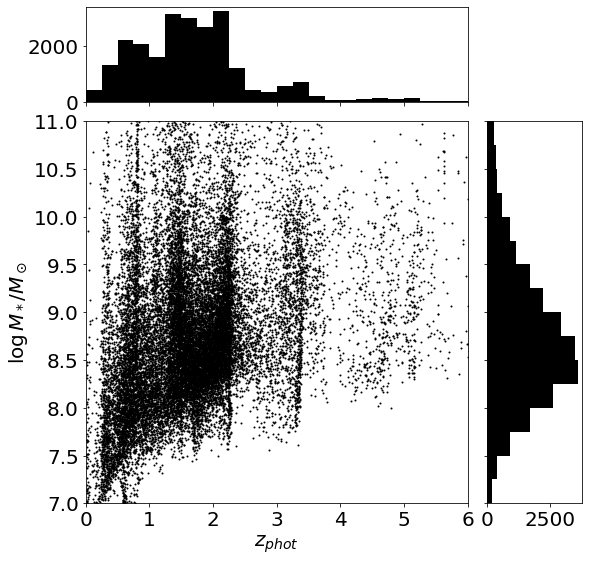

In [9]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(ceers_cat.zfit_50, ceers_cat.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11])



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

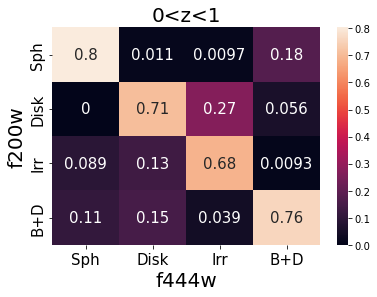

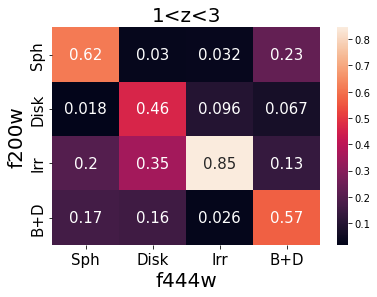

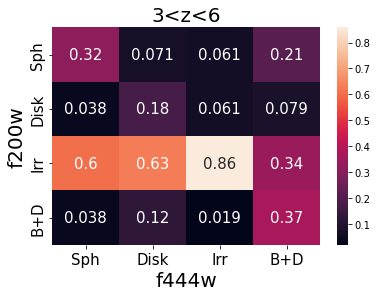

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f444w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444.png")
    plt.show()
   

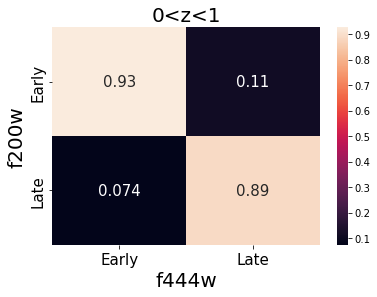

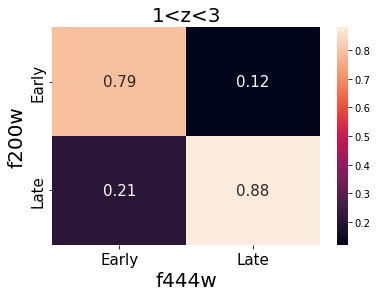

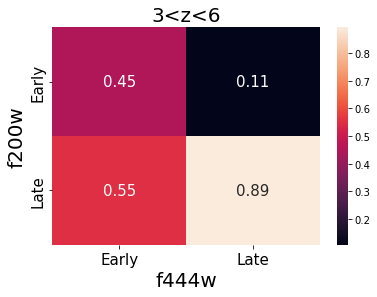

In [37]:



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))
    ceers_morph_f200 = sel.morph_flag_f200w.values
    ceers_morph_f200[ceers_morph_f200==3]=0
    ceers_morph_f200[ceers_morph_f200==2]=1

    ceers_morph_f444 = sel.morph_flag_f444w.values
    ceers_morph_f444[ceers_morph_f444==3]=0
    ceers_morph_f444[ceers_morph_f444==2]=1

    cm = confusion_matrix(ceers_morph_f200, ceers_morph_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444_2class.png")
    plt.show()
    

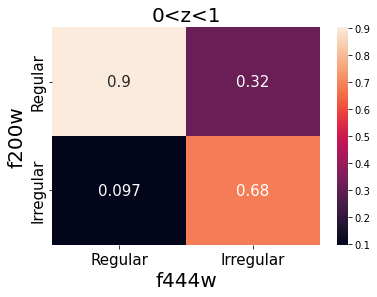

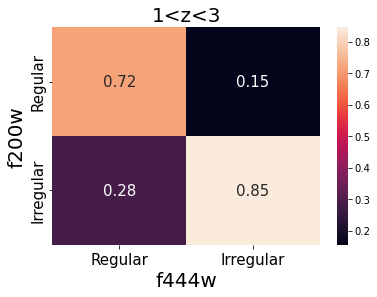

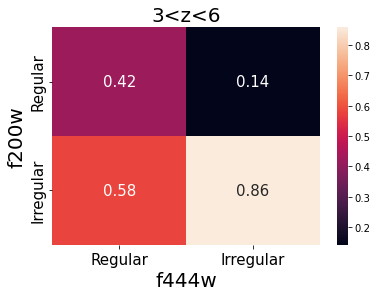

In [47]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))
    ceers_morph_f200 = sel.morph_flag_f200w.values
    ceers_morph_f200[ceers_morph_f200==3]=0
    ceers_morph_f200[ceers_morph_f200==1]=0
    ceers_morph_f200[ceers_morph_f200==2]=1

    ceers_morph_f444 = sel.morph_flag_f444w.values
    ceers_morph_f444[ceers_morph_f444==3]=0
    ceers_morph_f444[ceers_morph_f444==1]=0
    ceers_morph_f444[ceers_morph_f444==2]=1

    cm = confusion_matrix(ceers_morph_f200, ceers_morph_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Regular","Irregular"],fontsize=15); ax.yaxis.set_ticklabels(["Regular","Irregular"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444_2class.png")
    plt.show()

0.05
0.7551813471502591
[ 0.          0.13043478  0.07608696  0.06451613  0.08333333  0.
  0.          0.13875598  0.12738854  0.125       0.17647059  0.
  0.          0.03355705  0.10434783  0.12068966  0.09090909  0.
  0.          0.05681818  0.04938272  0.02631579  0.07142857  0.
 -0.11111111  0.04301075  0.01612903 -0.05555556  0.16666667  0.
  0.2         0.025      -0.14583333 -0.07407407 -0.125       0.
  0.          0.12068966 -0.24444444 -0.11111111 -0.5         0.
 -0.01923077 -0.11111111  0.22222222  0.          0.          0.
  0.0952381  -0.1        -0.25       -0.33333333  0.06896552 -0.125
  0.2         0.          0.          0.08955224  0.09722222  0.10344828
  0.06666667  0.06666667  0.06862745  0.13815789  0.05769231  0.06666667
  0.10526316  0.04938272  0.05714286  0.11290323  0.13333333 -0.14285714
  0.04918033  0.02469136  0.         -0.07692308  0.          0.09433962
  0.04       -0.18181818  0.33333333 -0.66666667  0.06818182 -0.05454545
 -0.24        0.       

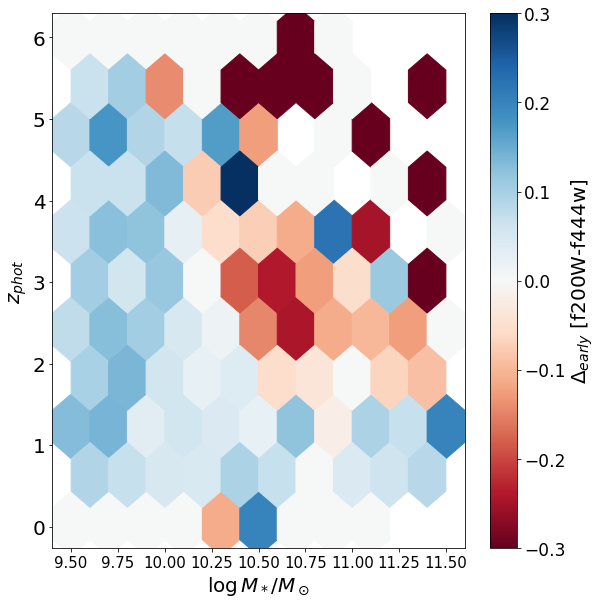

In [60]:
zbins = [20,22,24,27]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

#candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = ceers_cat.query("logM_50>9.5 and logM_50<11.5 and zfit_50>0 and zfit_50<6")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_flag_f444w.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=1-ceers_morph
arr[:,1]=1-candels_morph

mass = sel.logM_50
z = sel.zfit_50

#conc = np.concatenate((ceers_morph,candels_morph),axis=1)




def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)


print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(mass,z,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{early}$ [f200W-f444w]',size=20)
print(all.get_array())
plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
plt.ylabel("$z_{phot}$",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mass_z_f200_f400_early.png")
#plt.legend(fontsize=20,loc='upper left')
#plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

-0.0772020725388601
0.5272020725388601
[ 0.33333333 -0.05217391  0.10869565  0.09677419  0.          0.
  0.1        -0.0430622  -0.07006369  0.078125    0.17647059  0.
  0.         -0.04697987 -0.06956522 -0.05172414  0.04545455  0.
  0.         -0.09090909 -0.25925926 -0.18421053  0.07142857  0.
 -0.11111111 -0.04301075 -0.27419355 -0.22222222  0.          0.
 -0.2        -0.0625     -0.33333333 -0.2962963  -0.25        0.
  0.2        -0.0862069  -0.48888889 -0.16666667 -0.5         0.
 -0.01923077 -0.22222222  0.11111111 -1.          0.          0.
 -0.02380952 -0.3        -0.375      -0.33333333  0.         -0.125
 -0.2         0.          0.          0.02238806  0.01851852  0.14942529
  0.          0.06666667  0.15686275 -0.04605263 -0.09615385  0.13333333
  0.05263158  0.0617284  -0.20714286 -0.19354839  0.06666667 -0.42857143
  0.03278689 -0.11111111 -0.275      -0.15384615 -0.125      -0.01886792
 -0.14       -0.45454545 -0.33333333 -0.66666667  0.02272727 -0.18181818
 -0.4   

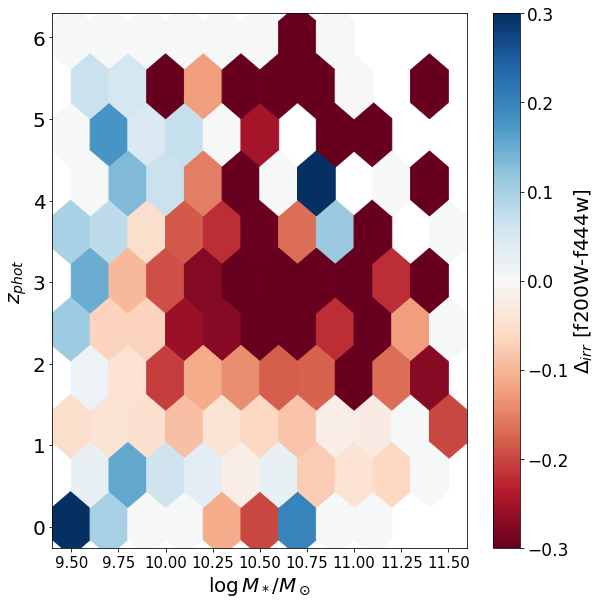

In [59]:
zbins = [20,22,24,27]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

#candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = ceers_cat.query("logM_50>9.5 and logM_50<11.5 and zfit_50>0 and zfit_50<6")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==1]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_flag_f444w.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==1]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=1-ceers_morph
arr[:,1]=1-candels_morph

mass = sel.logM_50
z = sel.zfit_50

#conc = np.concatenate((ceers_morph,candels_morph),axis=1)




def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)


print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(mass,z,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{irr}$ [f200W-f444w]',size=20)
print(all.get_array())
plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
plt.ylabel("$z_{phot}$",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mass_z_f200_f400_irr.png")
#plt.legend(fontsize=20,loc='upper left')
#plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

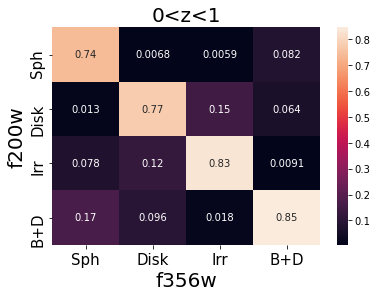

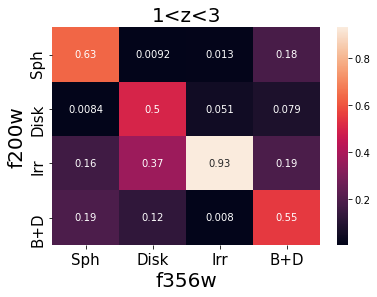

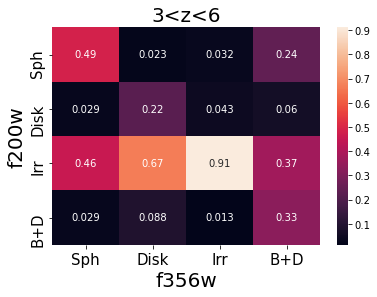

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f356w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f356w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f356.png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

[957 528 309 182 113  39]
[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]
[540 543 426 198  99  27]


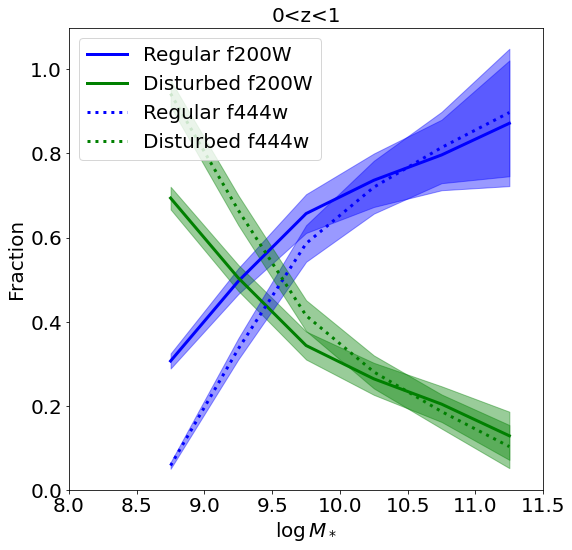

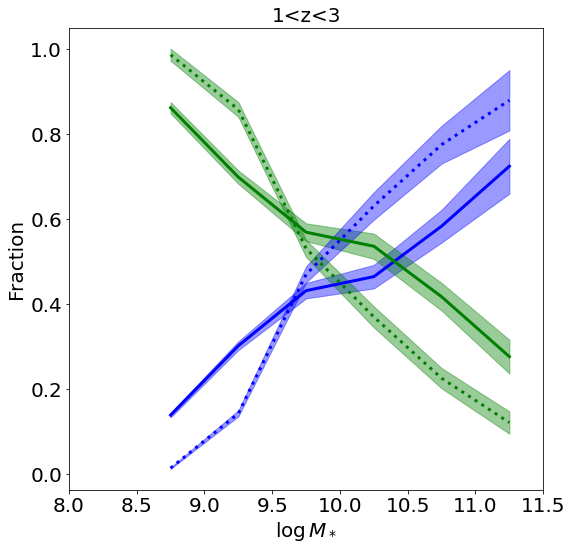

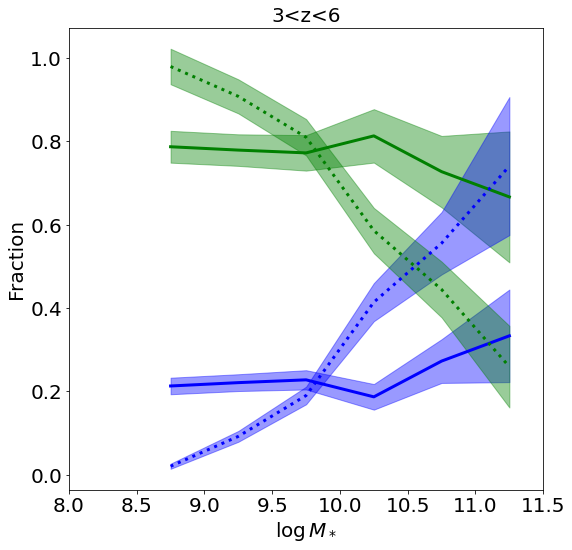

In [52]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular f200W")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed f200W")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)


    morph_flag = sel.morph_flag_f444w

 

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular f444w",linestyle=':')
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed f444w",linestyle=':')
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='upper left')
    #else:
     #    plt.legend(fontsize=20,loc='upper left')    
    plt.title(str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_irr"+str(zlow)+"f200_f444w.png")

[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]


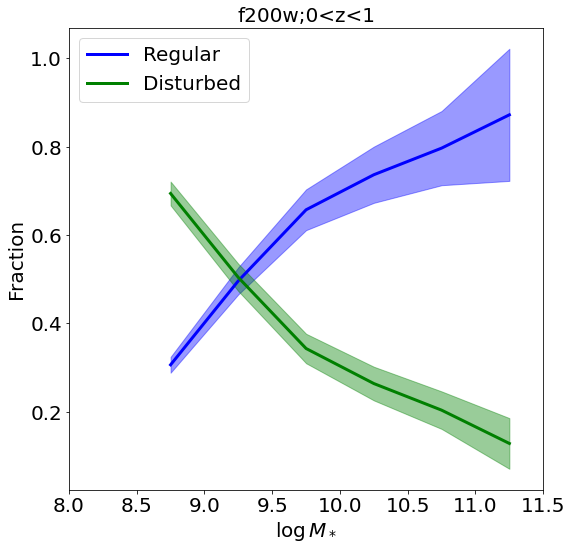

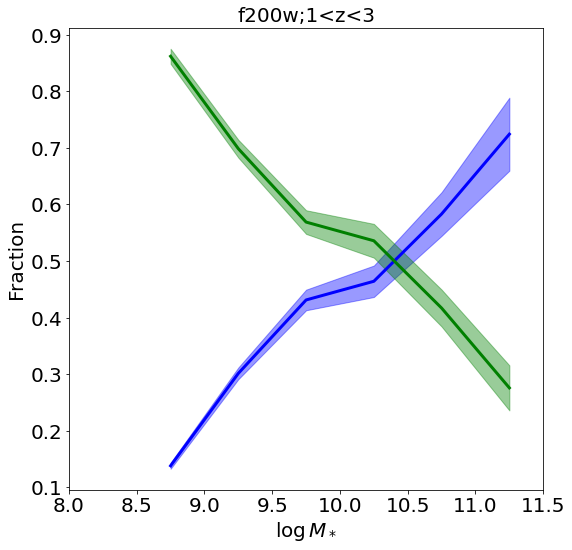

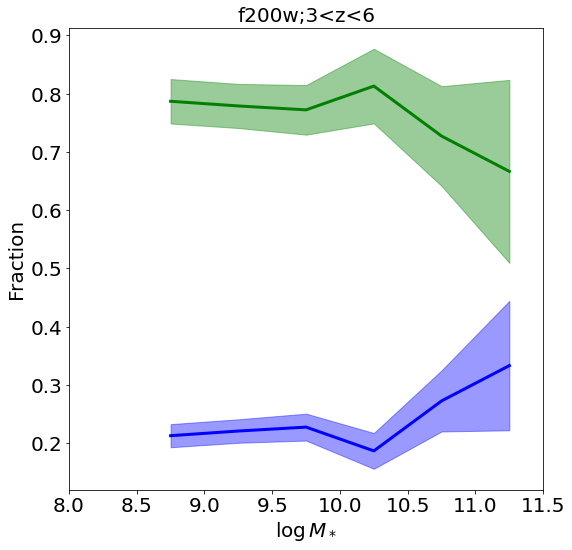

In [85]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)


    



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='upper left')
    #else:
     #    plt.legend(fontsize=20,loc='upper left')    
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_irr"+str(zlow)+"f200.png")

[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]


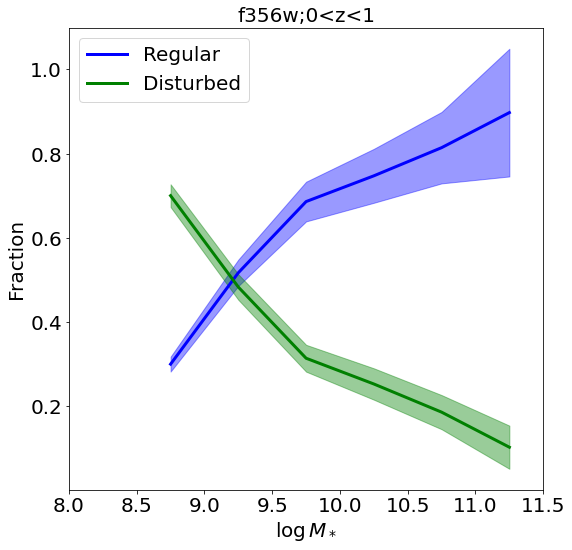

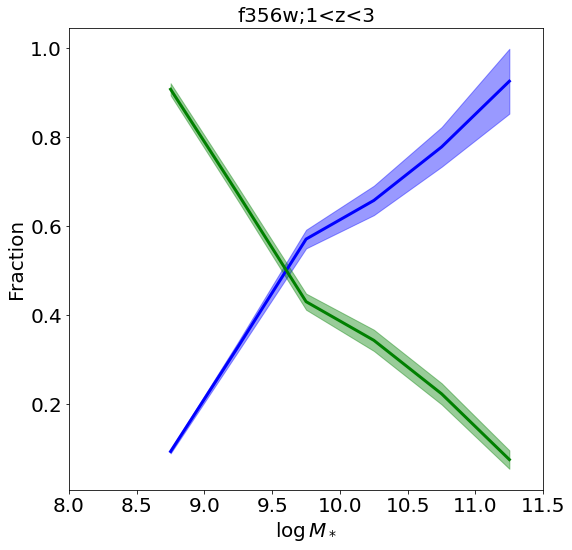

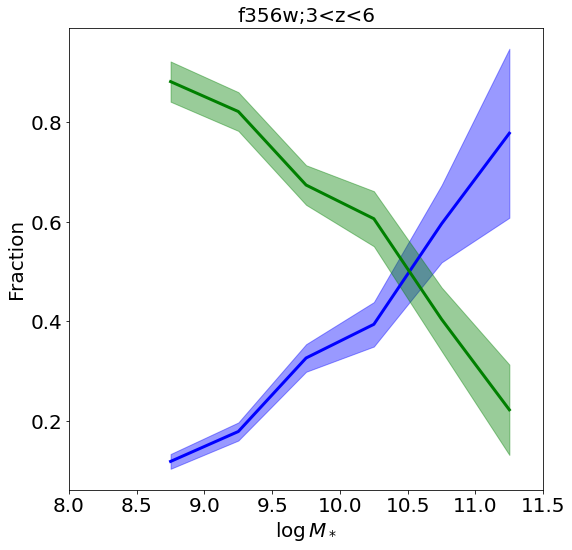

In [87]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f356w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)


    



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='upper left')
    #else:
     #    plt.legend(fontsize=20,loc='upper left')    
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_irr"+str(zlow)+"f356.png")

1.2095336007168105
2.152969809275923
2.6851645935913195
[957 528 309 182 113  39]
0.7252867808662087
1.2910104699418514
1.6101366535229835
[4876 2812 1301  601  391  174]
0.45521483537747215
0.8102824069719005
1.0105769345379882
[540 543 426 198  99  27]


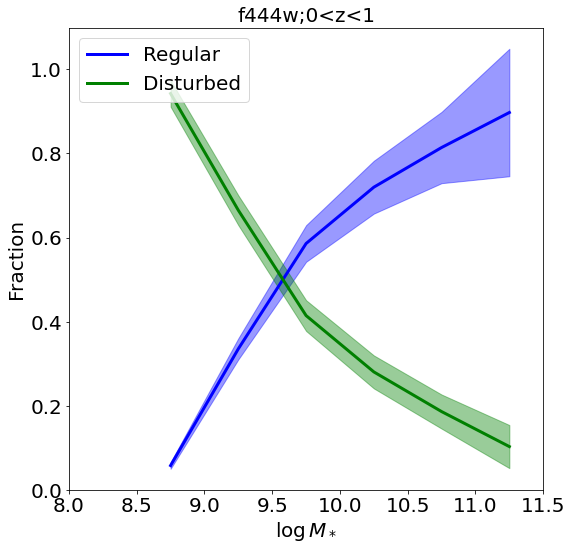

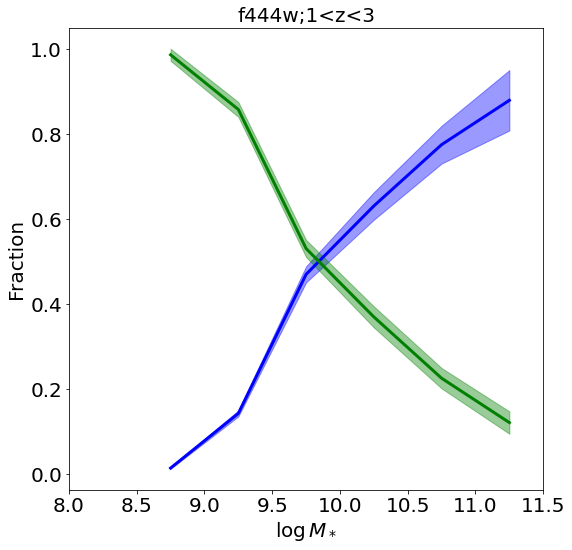

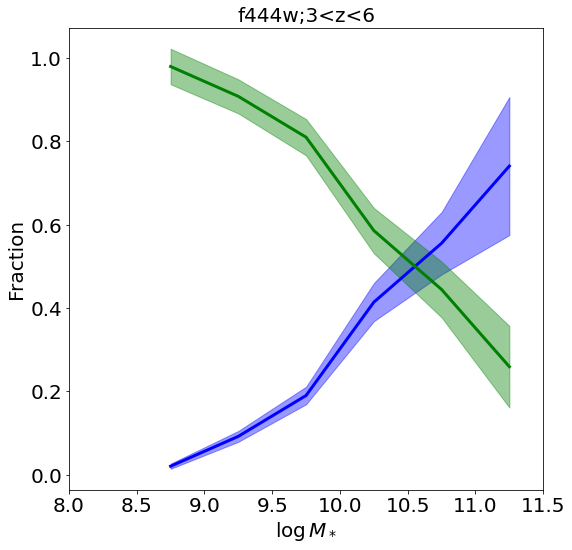

In [91]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    
    print(2.0/(1+np.median(sel.zfit_50)))
    print(3.56/(1+np.median(sel.zfit_50)))
    print(4.44/(1+np.median(sel.zfit_50)))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)


    



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='upper left')
    #else:
     #    plt.legend(fontsize=20,loc='upper left')    
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_irr"+str(zlow)+"f444.png")

[230 423 277 165 100  35]
[106 495 916 520 348 162]
[ 6 15 43 65 45 21]


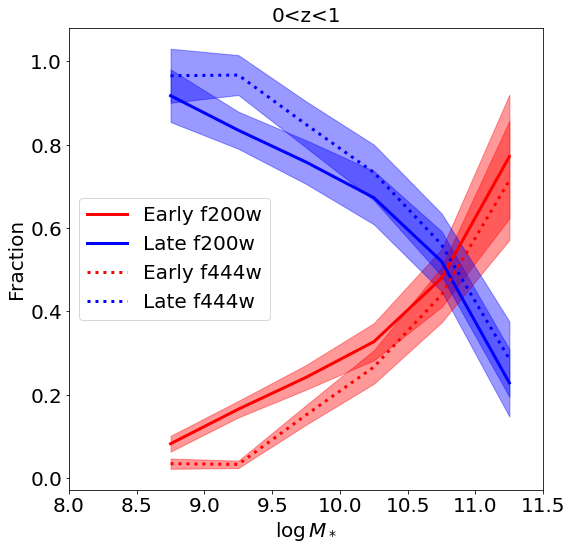

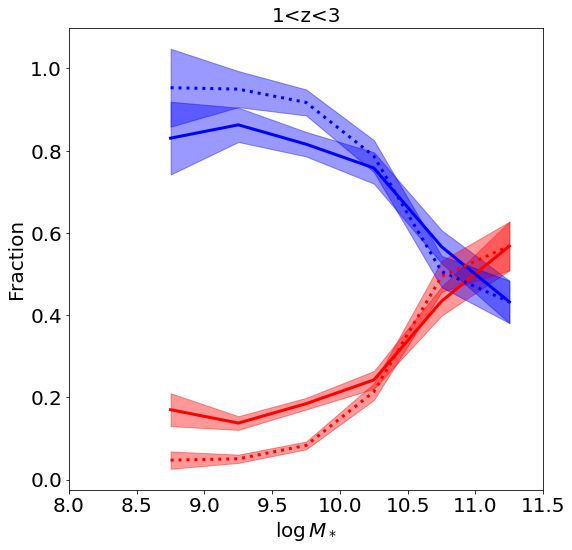

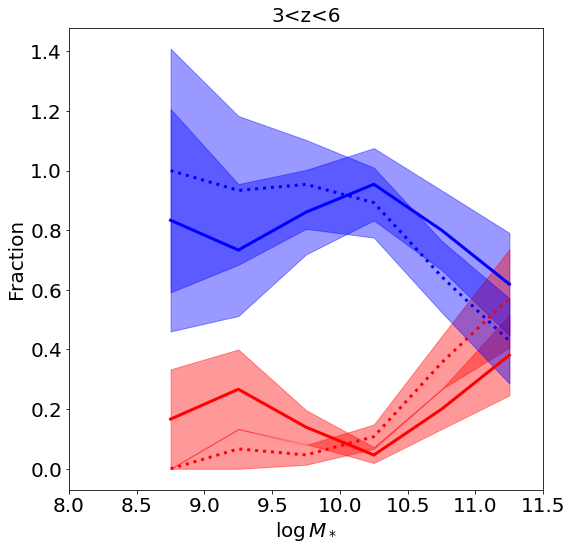

In [53]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
 

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early f200w")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late f200w")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)


    morph_flag = sel.morph_flag_f444w

 

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early f444w",linestyle=':')
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late f444w",linestyle=':')
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='center left')
   # else:
    #     plt.legend(fontsize=20,loc='center left')    
    plt.title(str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_f444_early.png")

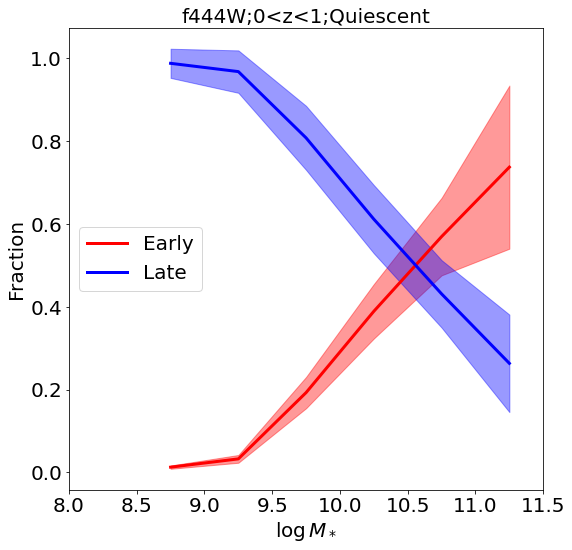

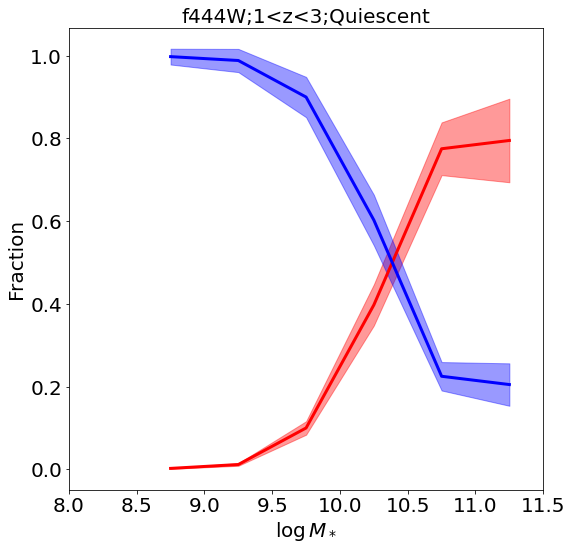

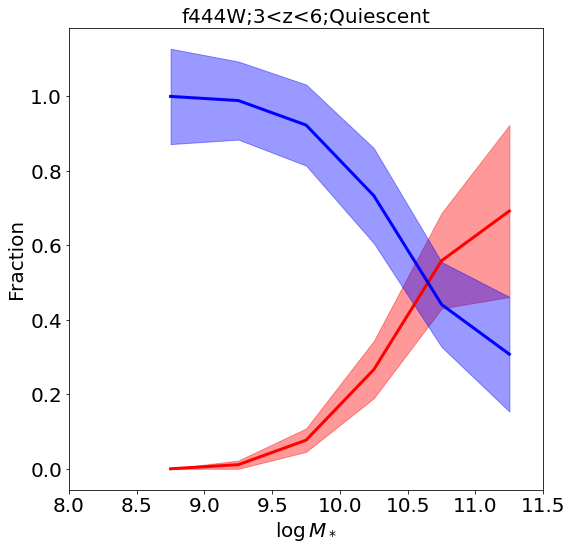

In [75]:
zbins = [0,1,3,6]
SFR_cuts = [-1,-0.5,-0.2]

for sfrc,zlow,zup in zip(SFR_cuts,zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logSFR100_50<"+str(sfrc)+" and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
 

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)


    



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='center left')
   # else:
    #     plt.legend(fontsize=20,loc='center left')    
    plt.title("f444W;"+str(zlow)+"<z<"+str(zup)+";Quiescent",fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_f444_early.png")

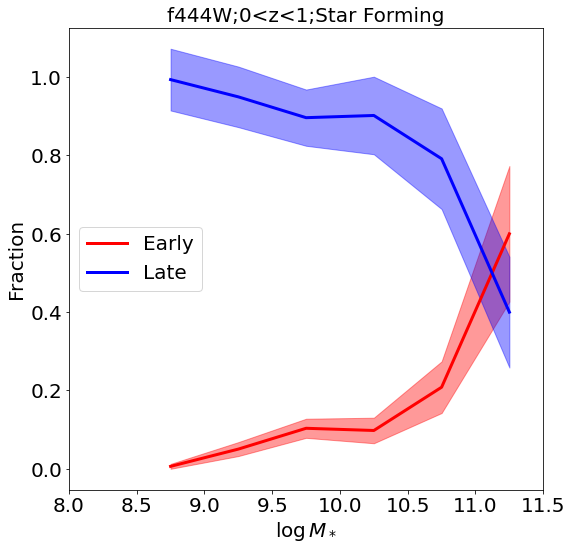

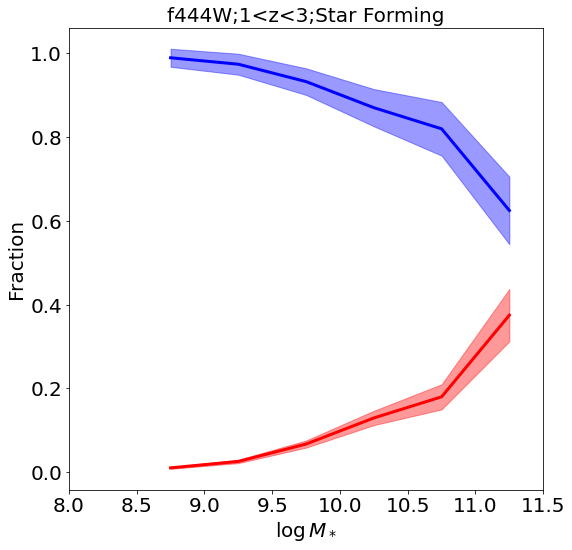

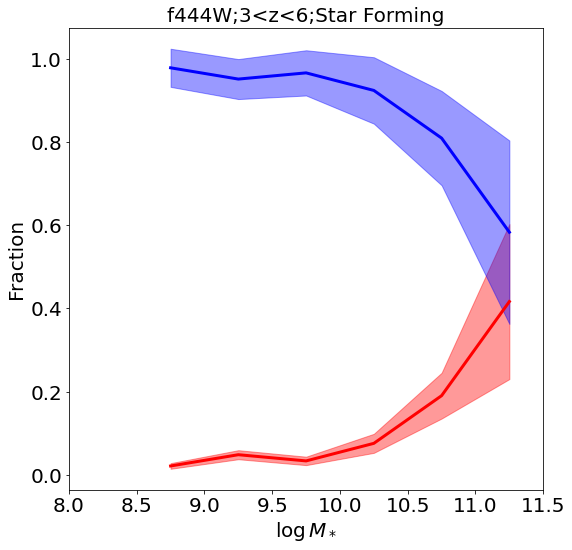

In [72]:
zbins = [0,1,3,6]
SFR_cuts = [-1,-0.5,0]

for sfrc,zlow,zup in zip(SFR_cuts,zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logSFR100_50>"+str(sfrc)+" and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
 

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)


    



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='center left')
   # else:
    #     plt.legend(fontsize=20,loc='center left')    
    plt.title("f444W;"+str(zlow)+"<z<"+str(zup)+";Star Forming",fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_f444_early.png")

[957 528 309 182 113  39]
[0.00714496 0.00824668 0.03600976 0.05636452 0.09846917 0.19700962]
[0.01375369 0.01826847 0.06107762 0.09748163 0.16701755 0.36709294]
[4876 2812 1301  601  391  174]
[0.00391735 0.005522   0.01399244 0.05450084 0.1648491  0.14093549]
[0.00592678 0.00870275 0.02136497 0.07528286 0.20855244 0.2038921 ]
[540 543 426 198  99  27]
[0.00957699 0.02533584 0.0220527  0.04744671 0.13006964 0.25324898]
[0.02005264 0.04096251 0.03898017 0.08386642 0.2133647  0.48749177]


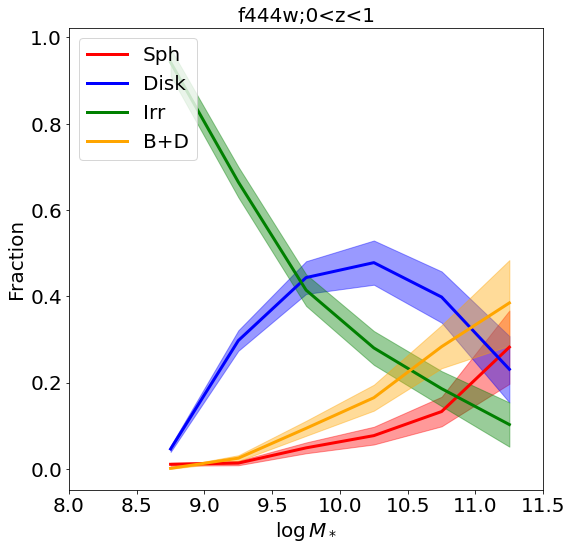

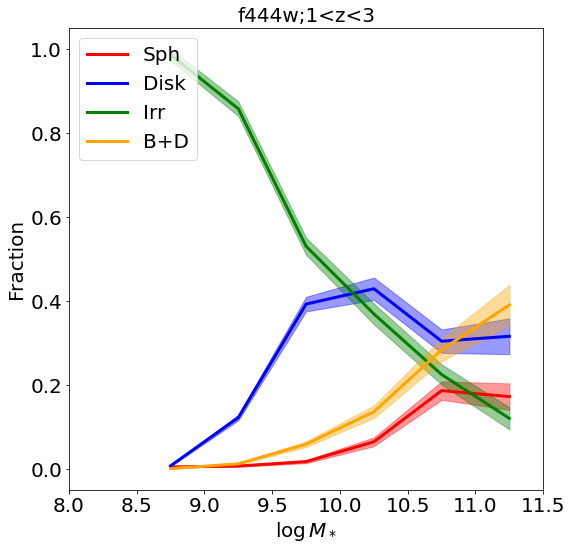

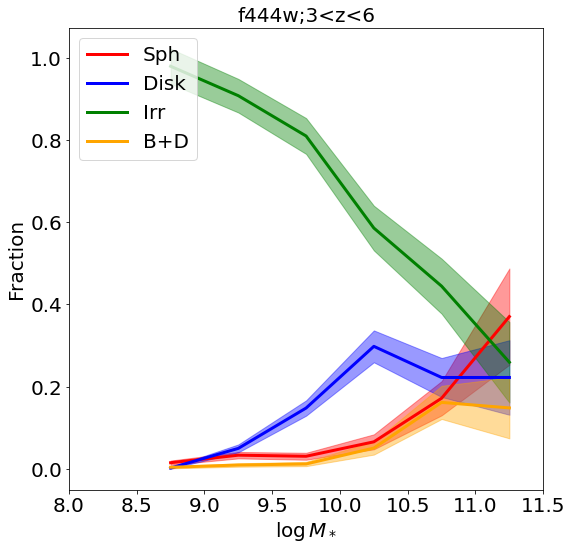

In [55]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f444.png")
    

(array([9221., 2586., 2055., 1579., 1207.,  993.,  762.,  620.,  518.,
         387.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

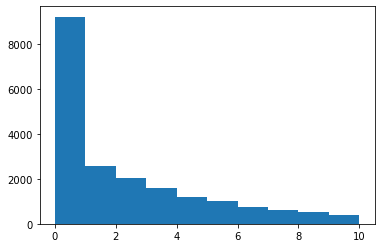

In [8]:
from astropy.cosmology import Planck13 as cosmo
ceers_cat['timescale']=(10**ceers_cat.logSFRinst_50/10**ceers_cat.logM_50)/(cosmo.H(ceers_cat.zfit_50)*3.24078e-20*3.154e+7)
plt.hist(ceers_cat.timescale,range=(0,10))


In [111]:
print(cosmo.H(ceers_cat.zfit_50)*3.24078e-20*3.154e+7)
print((10**ceers_cat.logSFR100_50/10**ceers_cat.logM_50))

0        1.447631e-10
1        8.044322e-11
2        1.541374e-10
3        1.808928e-10
4        1.932479e-10
             ...     
24402    7.994312e-11
24403    2.188795e-10
24404    2.071305e-10
24405    1.377423e-10
24406    1.078054e-10
Name: zfit_50, Length: 24407, dtype: float64
0        6.208690e-13
1        7.362071e-11
2        1.958845e-10
3        2.089296e-09
4        5.571857e-10
             ...     
24402    6.729767e-11
24403    1.099006e-09
24404    1.422329e-10
24405    5.767665e-10
24406    5.345644e-11
Length: 24407, dtype: float64


[310 184  90  88  74  34]
[0.01145326 0.01086957 0.05746192 0.08731108 0.13862625 0.20110948]
[0.02725642 0.0326087  0.12031586 0.16268892 0.23975213 0.38712581]
[102 271 185 135 200 100]
[0.         0.00467878 0.03243243 0.14148904 0.26594875 0.19101021]
[0.01960784 0.01746144 0.06486486 0.21406651 0.34405125 0.28898979]
[ 0 14 38 35 36 18]
[       nan 0.         0.05263158 0.14775923 0.1436548  0.2419027 ]
[       nan 0.14285714 0.15789474 0.30938363 0.30078964 0.53587507]


<ipython-input-116-1f85e67a5d72>:30: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
<ipython-input-116-1f85e67a5d72>:31: RuntimeWarning: invalid value encountered in divide
  print((sph-np.sqrt(sph))/all)
<ipython-input-116-1f85e67a5d72>:32: RuntimeWarning: invalid value encountered in divide
  print((sph+np.sqrt(sph))/all)
<ipython-input-116-1f85e67a5d72>:33: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
<ipython-input-116-1f85e67a5d72>:34: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
<ipython-input-116-1f85e67a5d72>:35: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
<ipython-input-116-1f85e67a5d72>:36: RuntimeWarning: invalid value encountered

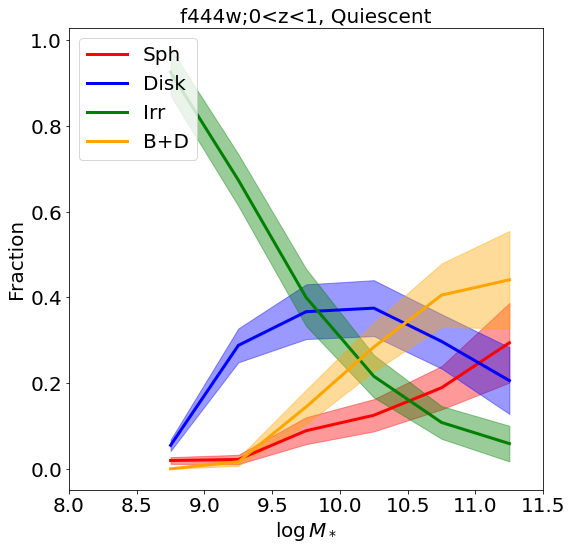

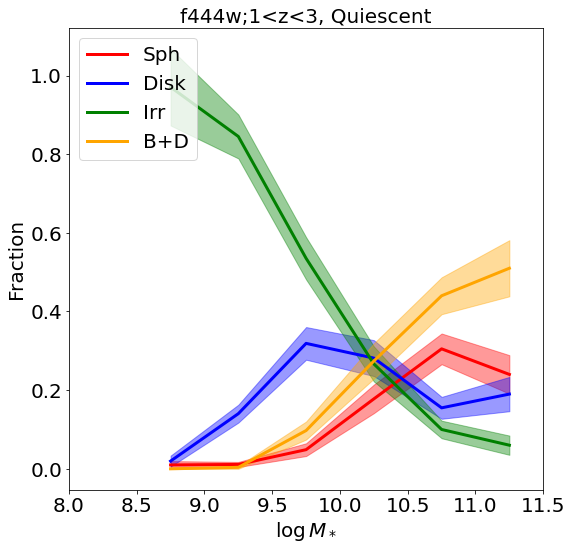

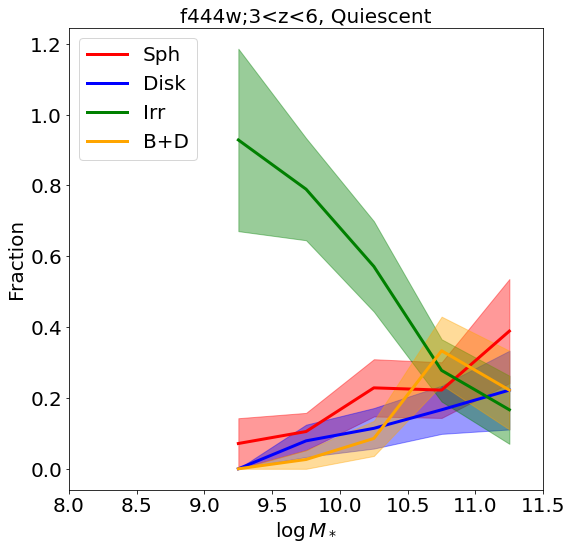

In [116]:
zbins = [0,1,3,6]


for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale<1/20")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup)+", Quiescent",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_Q"+str(zlow)+"f444.png")
    

[307 200 155  72  26   4]
[0.0019081  0.00292893 0.02290652 0.01761041 0.         0.        ]
[0.01112122 0.01707107 0.05451284 0.06572293 0.         0.5       ]
[4072 1957  927  403  147   49]
[0.00425088 0.00524187 0.00920809 0.02761046 0.02962074 0.04081633]
[0.00655462 0.00906574 0.01668188 0.04683122 0.06561736 0.12244898]
[525 486 339 131  54   8]
[0.00985062 0.02649567 0.01769912 0.02109872 0.08063423 0.15849365]
[0.02062558 0.04346318 0.03539823 0.05523716 0.17862502 0.59150635]


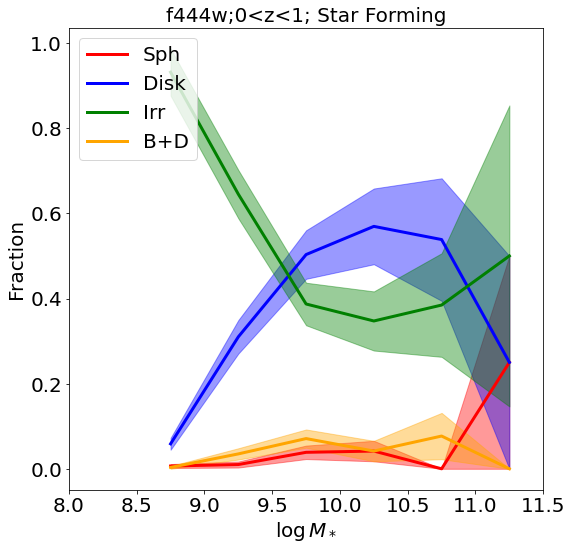

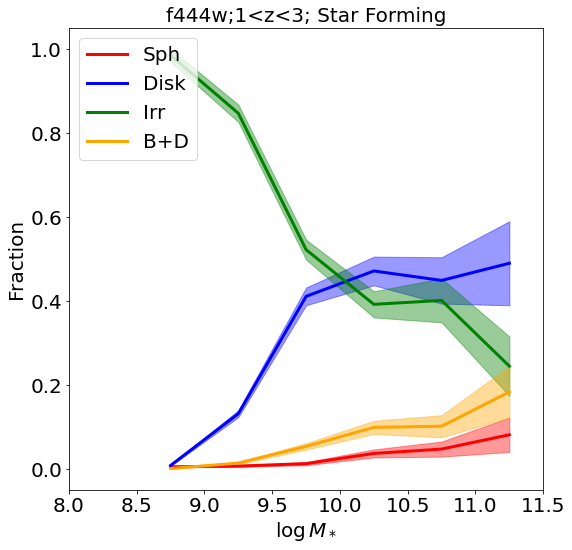

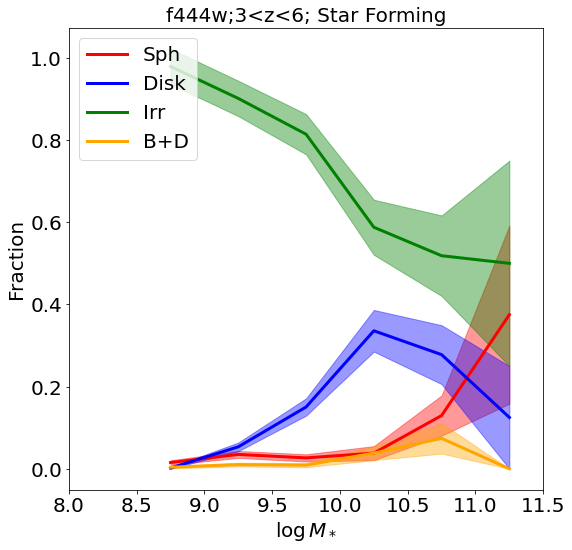

In [117]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale>0.33")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup)+"; Star Forming",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_SF"+str(zlow)+"f444.png")
    

[340 144  64  22  13   1]
[0.0017229 0.        0.        0.        0.        0.       ]
[0.0100418  0.01388889 0.03125    0.         0.15384615 0.        ]
[702 584 189  63  44  25]
[0.         0.00217115 0.0030994  0.         0.06281664 0.02343146]
[0.002849   0.00810283 0.01806462 0.         0.16445609 0.13656854]
[15 43 49 32  9  1]
[0.         0.         0.         0.         0.06508738 0.        ]
[0.         0.         0.         0.         0.37935706 0.        ]


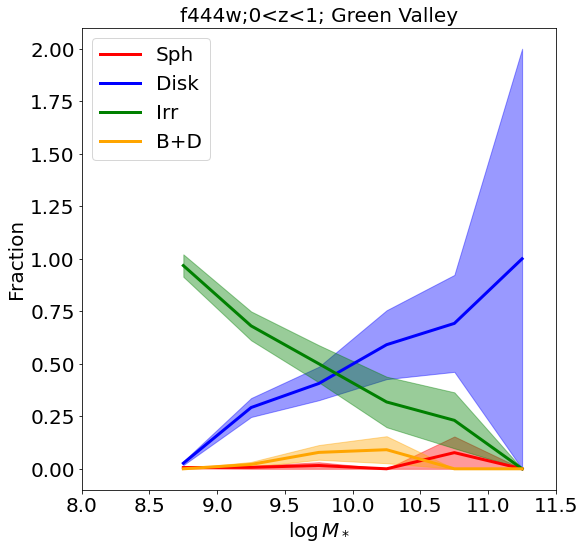

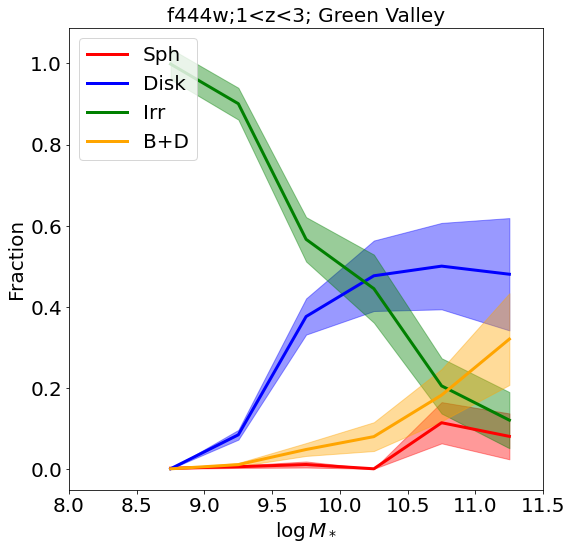

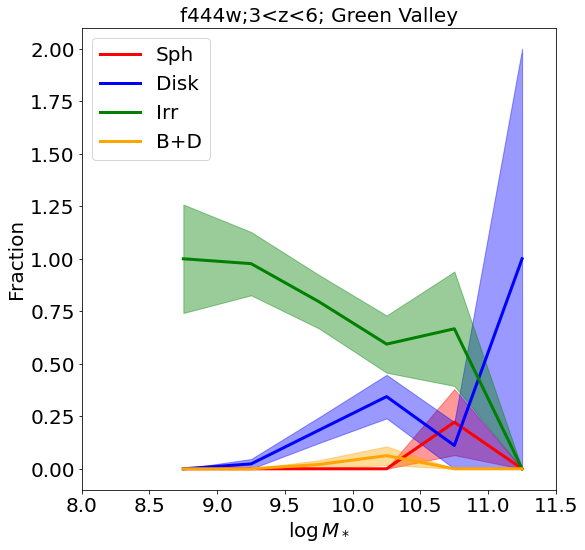

In [119]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale<0.33 and timescale>1/20")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup)+"; Green Valley",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_GV"+str(zlow)+"f444.png")
    

[340 144  64  22  13   1]
[0.04567019 0.01919397 0.00915291 0.         0.         0.        ]
[0.07197687 0.05025047 0.05334709 0.         0.15384615 0.        ]
[702 584 189  63  44  25]
[0.11334191 0.11682369 0.04970608 0.02012618 0.06281664 0.02343146]
[0.14021935 0.14687494 0.08786006 0.07511192 0.16445609 0.13656854]
[15 43 49 32  9  1]
[0.         0.01362294 0.02587651 0.01830583 0.         0.        ]
[0.13333333 0.07940032 0.09657247 0.10669417 0.22222222 0.        ]


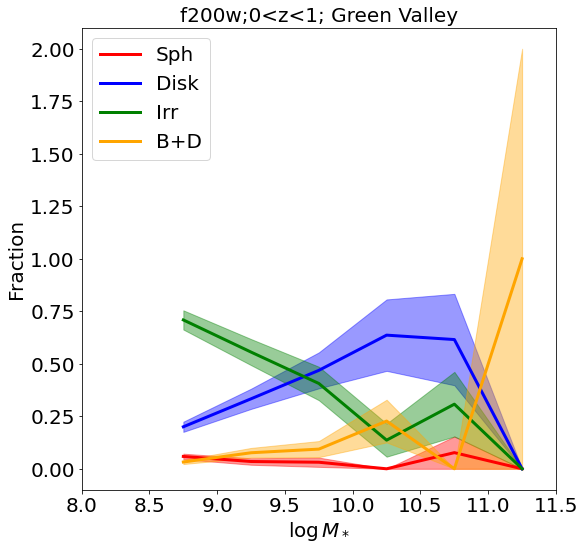

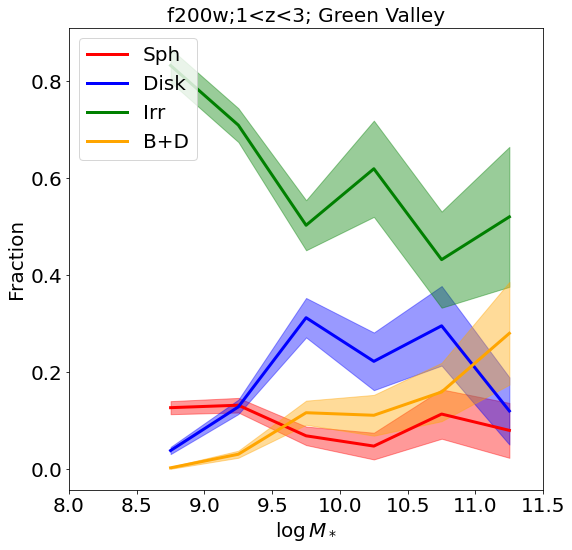

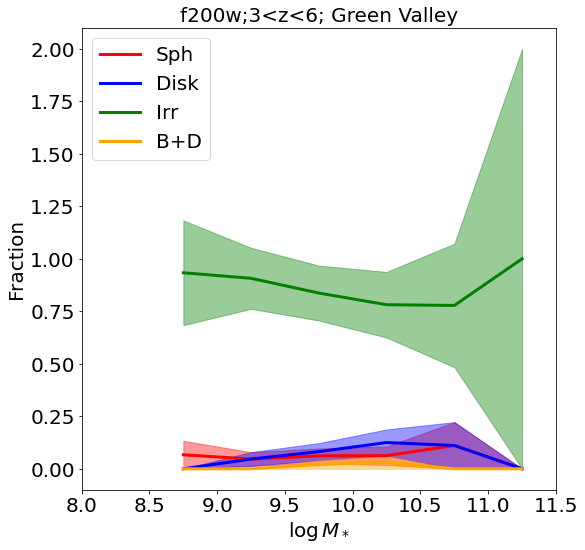

In [121]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale<0.33 and timescale>1/20")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup)+"; Green Valley",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_GV"+str(zlow)+"f200.png")
    

[310 184  90  88  74  34]
[0.07325322 0.06998312 0.08537084 0.11657208 0.13862625 0.20110948]
[0.10739194 0.11479949 0.15907361 0.20160974 0.23975213 0.38712581]
[102 271 185 135 200 100]
[0.21376321 0.20318356 0.13747154 0.21543645 0.27531373 0.16417424]
[0.31564855 0.26176108 0.19766359 0.30308207 0.35468627 0.25582576]
[ 0 14 38 35 36 18]
[       nan 0.14285714 0.17994006 0.05714286 0.16666667 0.07044162]
[       nan 0.42857143 0.34637573 0.17142857 0.33333333 0.26289171]


<ipython-input-122-a415b06ab8ea>:29: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
<ipython-input-122-a415b06ab8ea>:30: RuntimeWarning: invalid value encountered in divide
  print((sph-np.sqrt(sph))/all)
<ipython-input-122-a415b06ab8ea>:31: RuntimeWarning: invalid value encountered in divide
  print((sph+np.sqrt(sph))/all)
<ipython-input-122-a415b06ab8ea>:32: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
<ipython-input-122-a415b06ab8ea>:33: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
<ipython-input-122-a415b06ab8ea>:34: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
<ipython-input-122-a415b06ab8ea>:35: RuntimeWarning: invalid value encountered

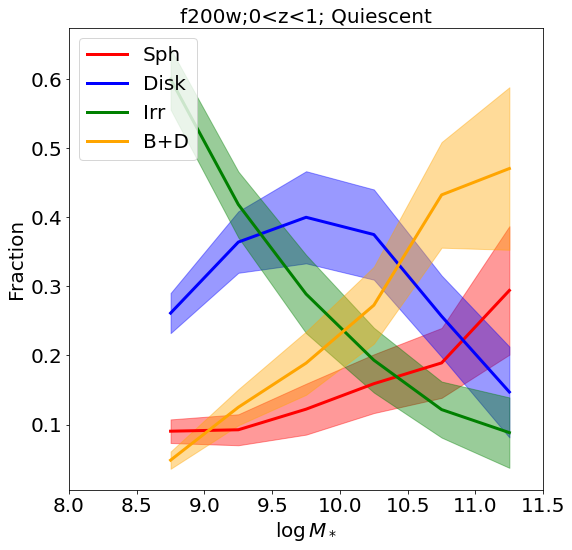

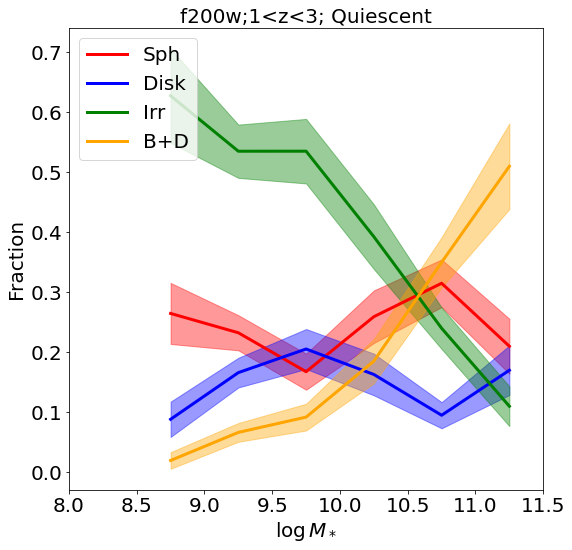

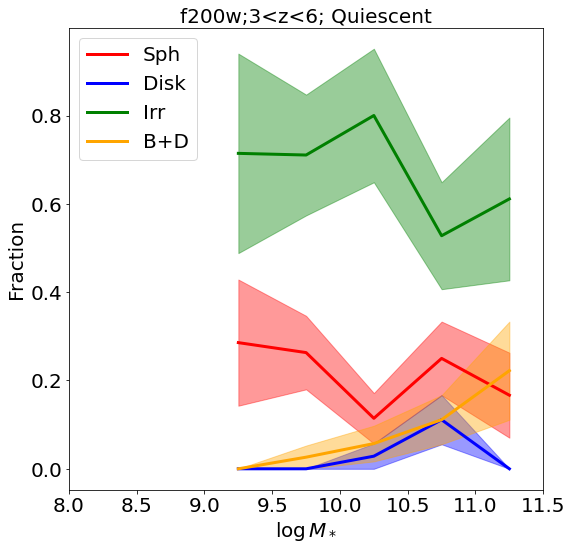

In [122]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale<1/20")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup)+"; Quiescent",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_Q"+str(zlow)+"f200.png")
    

[310 184  90  88  74  34]
[0.03030467 0.0326087  0.12363352 0.1067551  0.19785272 0.22598162]
[0.05356629 0.06521739 0.20969981 0.18869945 0.3156608  0.4210772 ]
[102 271 185 135 200 100]
[0.02709737 0.0540262  0.07914109 0.24944774 0.32698837 0.21803848]
[0.07094184 0.0861952  0.12626432 0.34314485 0.41301163 0.32196152]
[ 0 14 38 35 36 18]
[       nan 0.         0.05263158 0.1953635  0.3090838  0.2873096 ]
[       nan 0.         0.15789474 0.37606508 0.52424954 0.60157928]


<ipython-input-124-958ba6e82c23>:29: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
<ipython-input-124-958ba6e82c23>:30: RuntimeWarning: invalid value encountered in divide
  print((sph-np.sqrt(sph))/all)
<ipython-input-124-958ba6e82c23>:31: RuntimeWarning: invalid value encountered in divide
  print((sph+np.sqrt(sph))/all)
<ipython-input-124-958ba6e82c23>:32: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
<ipython-input-124-958ba6e82c23>:33: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
<ipython-input-124-958ba6e82c23>:34: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
<ipython-input-124-958ba6e82c23>:35: RuntimeWarning: invalid value encountered

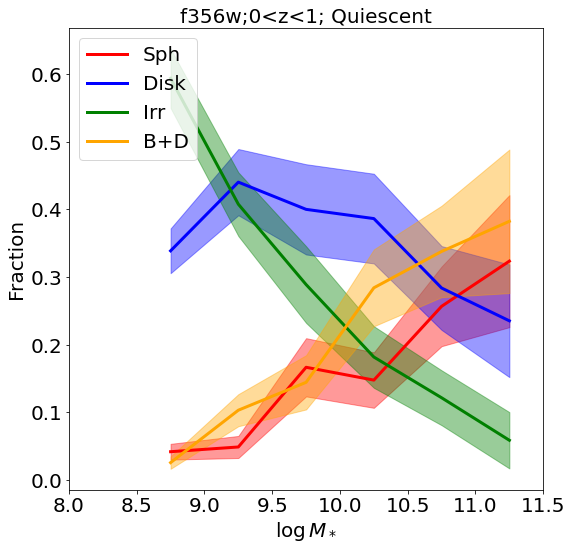

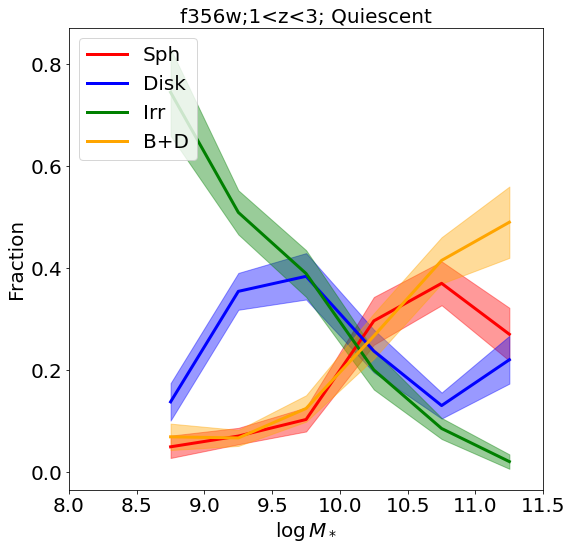

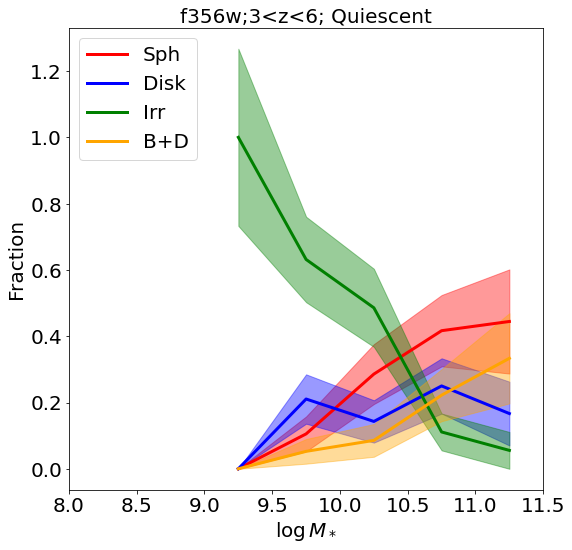

In [124]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and timescale<1/20")

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f356w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup)+"; Quiescent",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_Q"+str(zlow)+"f356.png")
    

[957 528 309 182 113  39]
[0.05557968 0.06203599 0.0618156  0.06593407 0.11395482 0.19700962]
[0.07190204 0.08569128 0.09352421 0.10989011 0.18693014 0.36709294]
[4876 2812 1301  601  391  174]
[0.10036353 0.1081279  0.05752102 0.08538911 0.1648491  0.12530947]
[0.10964467 0.1208906  0.07161042 0.11095033 0.20855244 0.18503536]
[540 543 426 198  99  27]
[0.17899244 0.13433631 0.07905034 0.03453395 0.09489342 0.07407407]
[0.21730385 0.16768948 0.10874309 0.06647615 0.16773284 0.22222222]


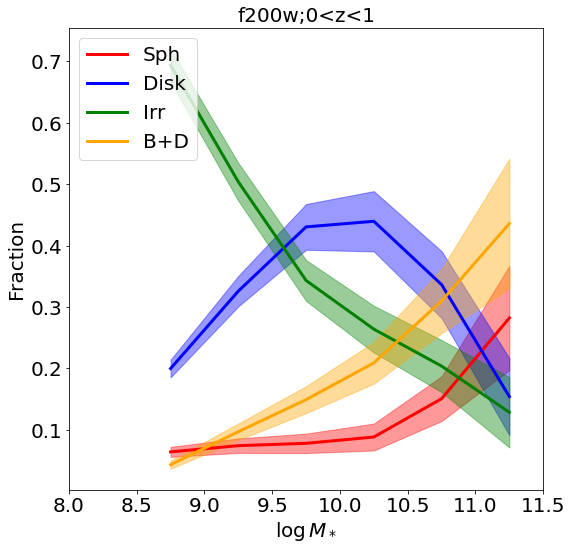

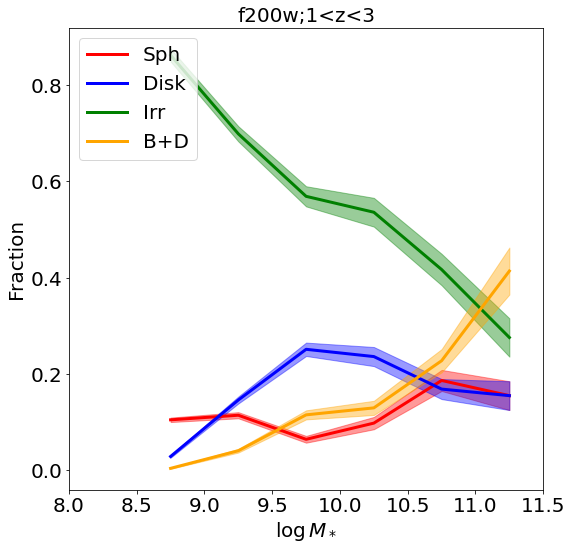

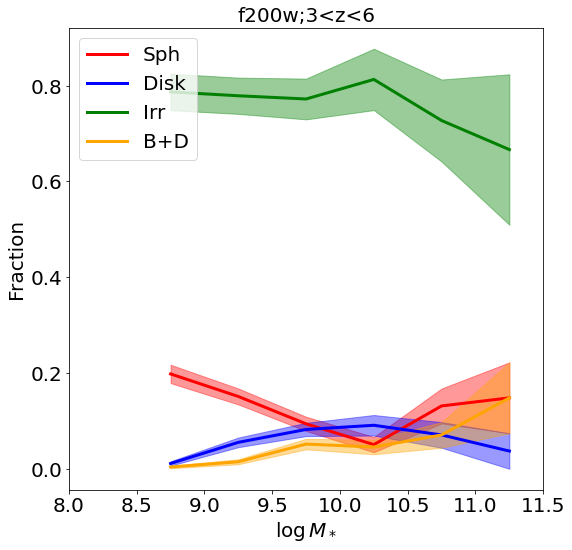

In [78]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

[957 528 309 182 113  39]
[0.02562463 0.04472507 0.07349028 0.06593407 0.13741473 0.21886919]
[0.03707129 0.06512342 0.10773949 0.10989011 0.21656757 0.39651543]
[4876 2812 1301  601  391  174]
[0.02923505 0.02863199 0.02872156 0.08850208 0.21076301 0.17241379]
[0.03434165 0.03537939 0.03891872 0.11449293 0.25982523 0.24137931]
[540 543 426 198  99  27]
[0.07262531 0.04851408 0.03436878 0.05619705 0.18388049 0.25324898]
[0.09774506 0.06934964 0.0548331  0.0953181  0.28076597 0.48749177]


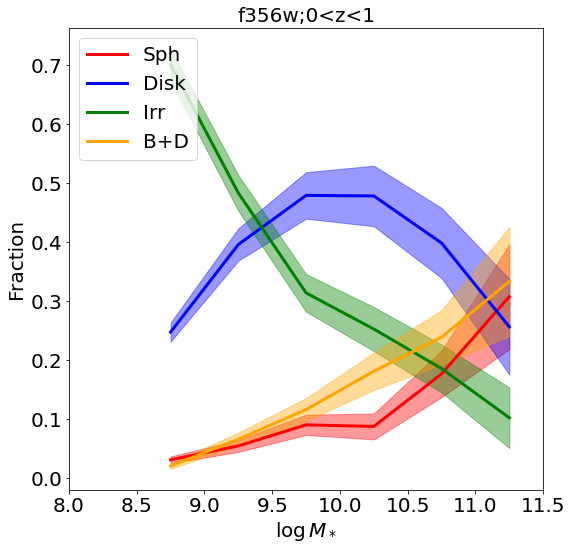

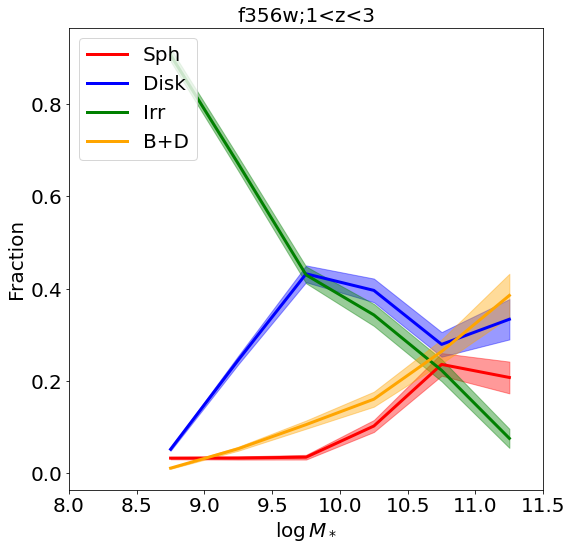

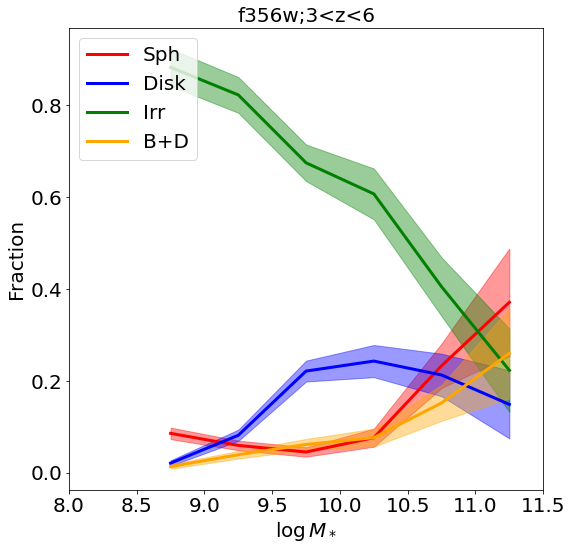

In [77]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f356w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[  308   730  1517  3234  6226 11791]


<ipython-input-48-31eb7042686a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6


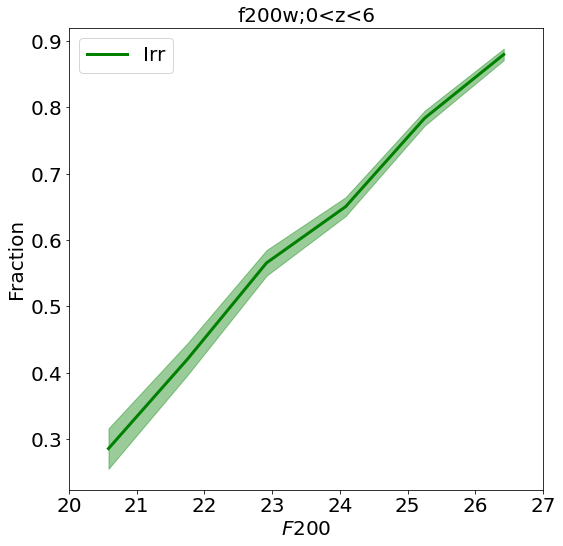

In [48]:
zbins = [0,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    mag = sel['F200_AB']
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(20,27)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mag,range=(20,27),bins=6)
    sph,bins = np.histogram(mag[(morph_flag==0)],range=(20,27),bins=6)
    dk,bins = np.histogram(mag[((morph_flag==1))],range=(20,27),bins=6)
    irr,bins = np.histogram(mag[(morph_flag==2)],range=(20,27),bins=6)
    bd,bins = np.histogram(mag[(morph_flag==3)],range=(20,27),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    #plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    #print((sph-np.sqrt(sph))/all)
    #print((sph+np.sqrt(sph))/all)
    #plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    #plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    #plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$F200$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[ 111  195  293  445  601  945 1004  216]


<ipython-input-53-6afb226c410a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6


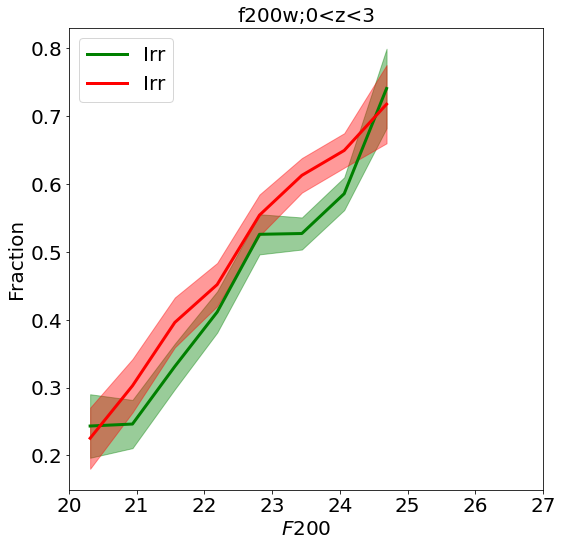

In [53]:
zbins = [0,3]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    mag = sel['F200_AB']
    morph_flag = sel.morph_flag_f200w
    morph_flag_c = sel.morph_CANDELS

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(20,27)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mag,range=(20,25),bins=8)
    sph,bins = np.histogram(mag[(morph_flag==0)],range=(20,25),bins=8)
    dk,bins = np.histogram(mag[((morph_flag==1))],range=(20,25),bins=8)
    irr,bins = np.histogram(mag[(morph_flag==2)],range=(20,25),bins=8)
    bd,bins = np.histogram(mag[(morph_flag==3)],range=(20,25),bins=8)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    #plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    #print((sph-np.sqrt(sph))/all)
    #print((sph+np.sqrt(sph))/all)
    #plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    #plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)


    all,bins = np.histogram(mag,range=(20,25),bins=8)
    sph,bins = np.histogram(mag[(morph_flag_c==0)],range=(20,25),bins=8)
    dk,bins = np.histogram(mag[((morph_flag_c==1))],range=(20,25),bins=8)
    irr,bins = np.histogram(mag[(morph_flag_c==2)],range=(20,25),bins=8)
    bd,bins = np.histogram(mag[(morph_flag_c==3)],range=(20,25),bins=8)

    plt.plot(bcenters,irr/all,color='red',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='red',alpha=0.4)


    #plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    #plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$F200$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")

[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]


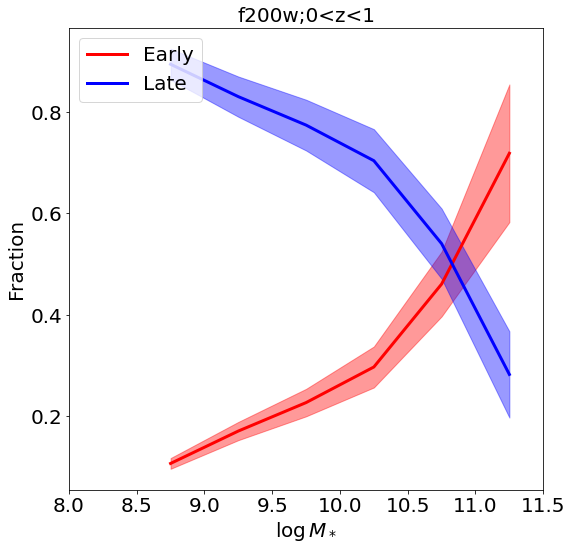

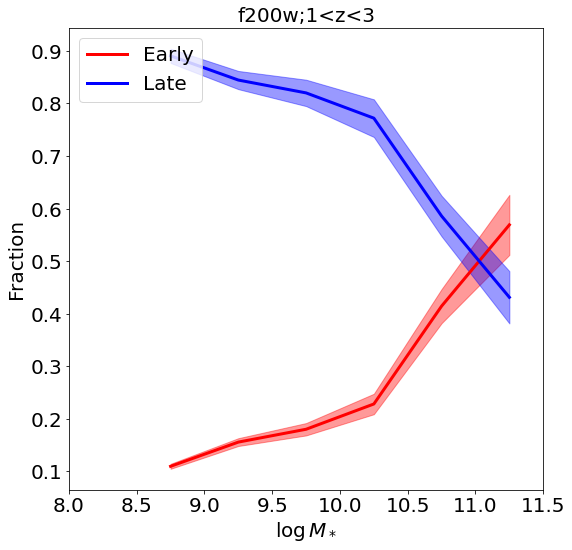

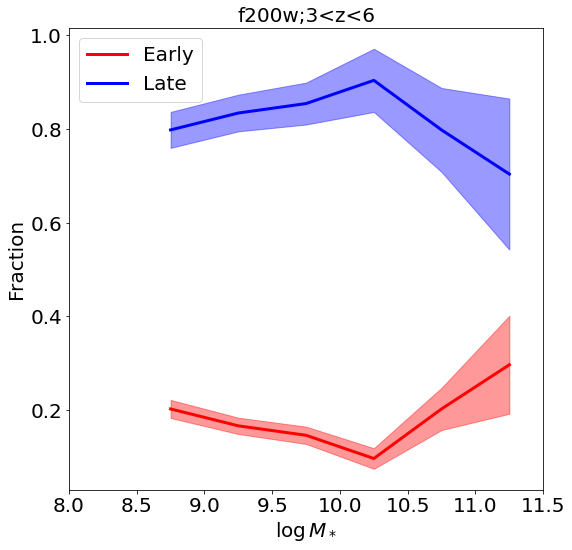

In [79]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_early_late.png")

[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]


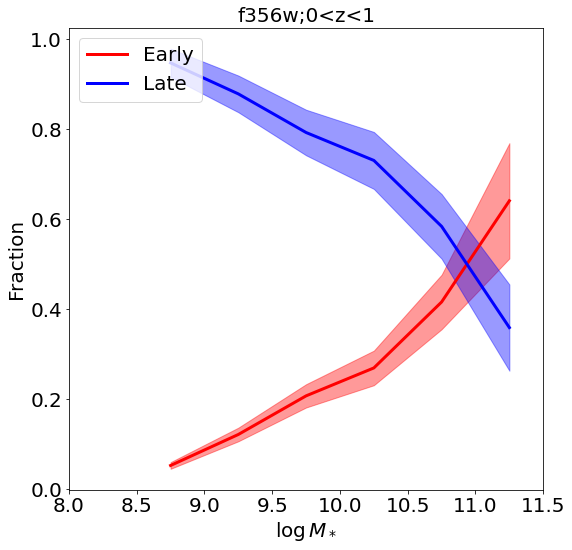

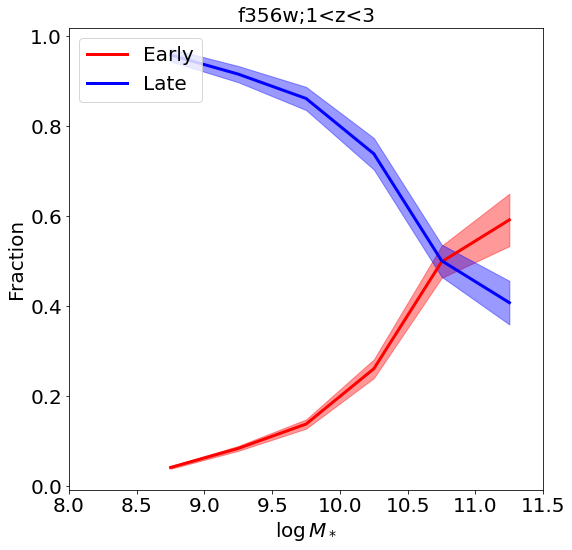

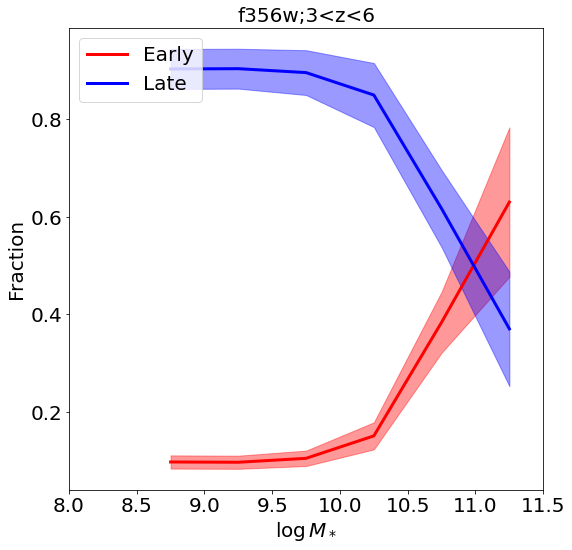

In [81]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f356w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356_early_late.png")

[957 528 309 182 113  39]
[4876 2812 1301  601  391  174]
[540 543 426 198  99  27]


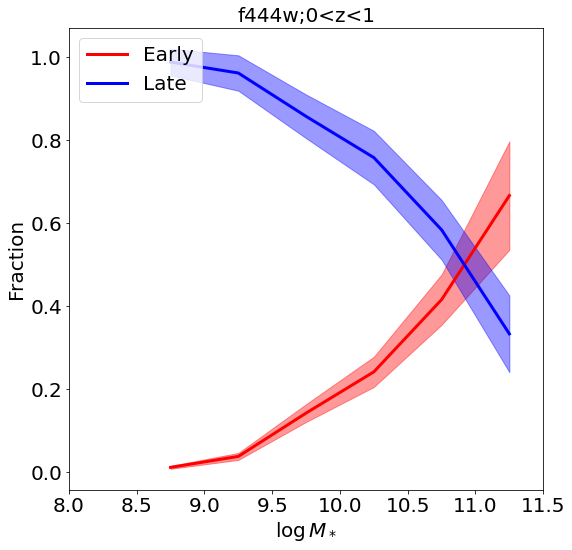

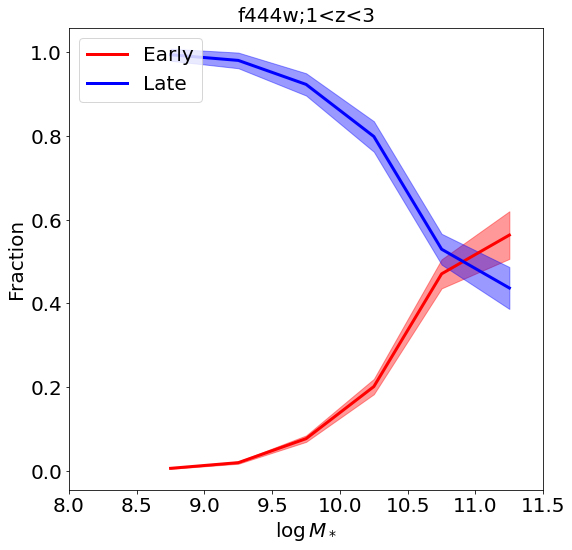

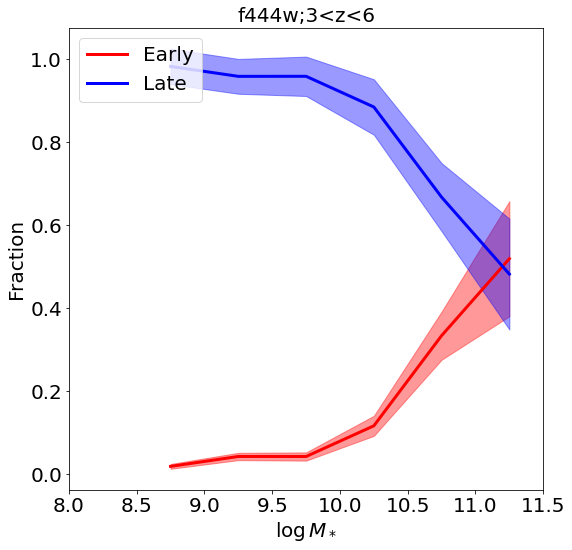

In [82]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f444_early_late.png")

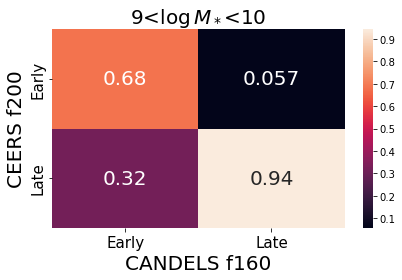

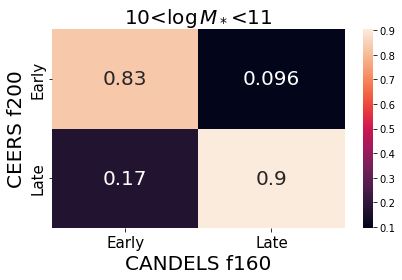

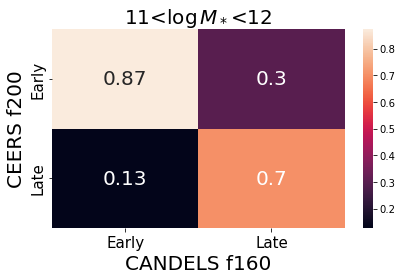

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [9,10,11,12]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and zfit_50<6 and logM_50>"+str(zlow)+"and logM_50<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<$\log M_*$<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_mass_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

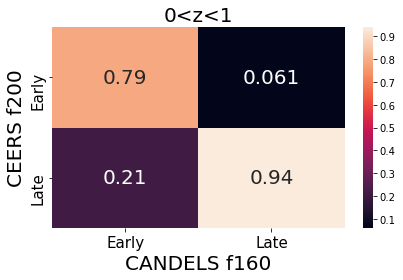

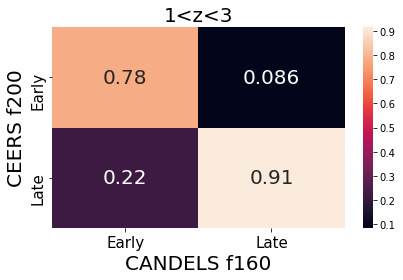

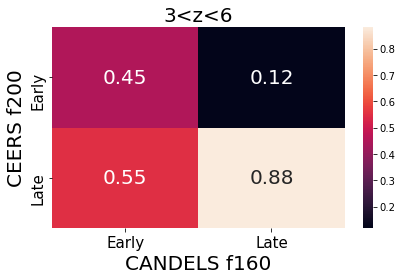

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_z_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

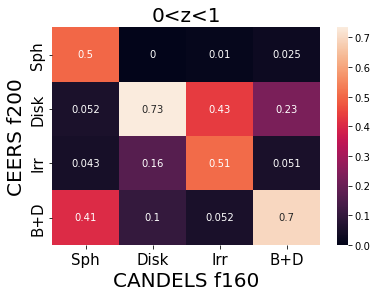

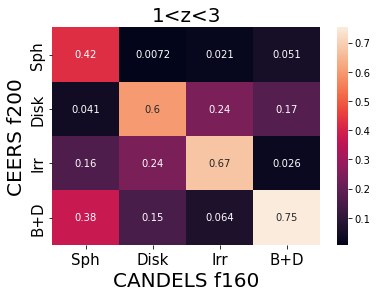

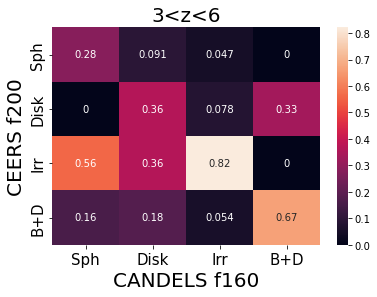

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_CANDELS,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

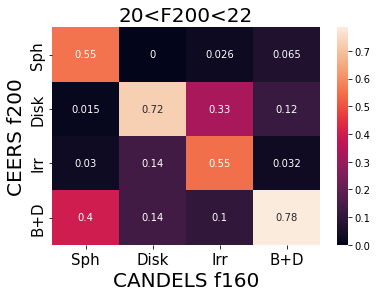

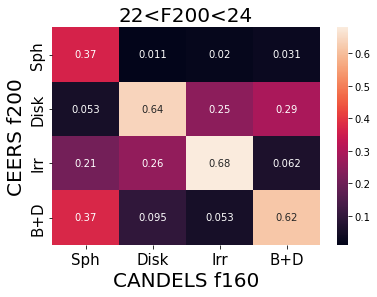

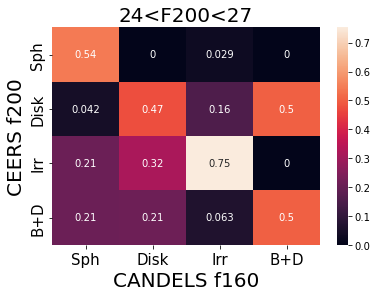

In [44]:



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_CANDELS,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

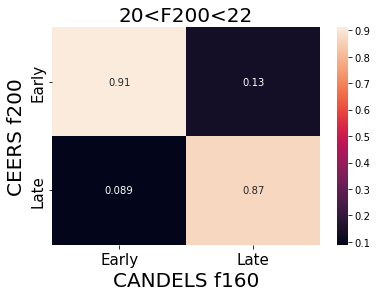

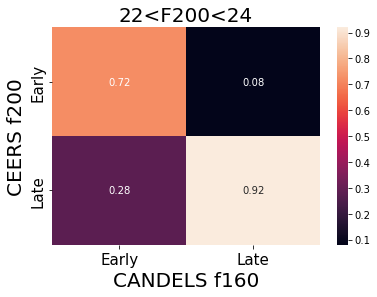

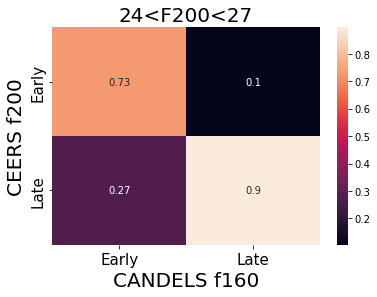

In [45]:




from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))

    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()
    

[1 0 0 ... 1 1 1]
[-0.3072359  -0.83690425 -0.31219111 ... -0.46897861 -0.43397048
 -1.0010871 ]
671.0
0.016786570743405275
0.731814548361311
[ 0.          0.         -0.1         0.          0.         -0.14285714
  0.          0.         -0.16666667  0.          0.         -0.14285714
  0.          0.         -0.10416667 -0.15384615  0.         -0.08333333
 -0.03125    -0.02830189  0.0199005   0.          0.          0.15492958
  0.05147059  0.03061224  0.          0.21052632  0.12820513  0.02298851
  0.04761905  0.          0.         -0.16666667  0.07692308  0.
  0.26666667  1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.5         0.
  0.          0.          0.2         0.25        0.          0.
 -0.4         0.          0.         -0.14285714 -0.5         0.
  0.16666667  0.05882353 -0.12       -0.06666667  0.1875      0.04444444
 -0.08888889  0.08333333  0.          0.          0.03846154  0.05625
  0.05813953  0.         

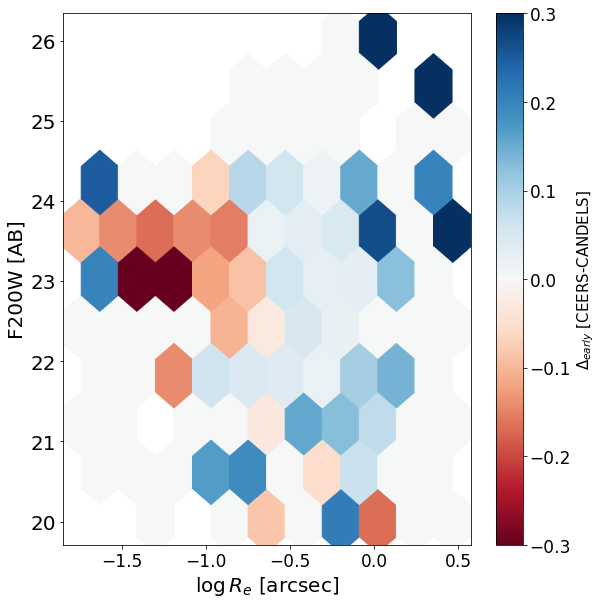

In [160]:
zbins = [20,22,24,27]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)

candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>20 and F200_AB<27 and re>0 and re<3")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_CANDELS.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=1-ceers_morph
arr[:,1]=1-candels_morph

print(ceers_morph)
#conc = np.concatenate((ceers_morph,candels_morph),axis=1)

re = np.log10(sel.re.values)
mag = sel.F200_AB.values

print(re)

print(sum(arr[:,0]))

def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)

def funct2(z):
    
    return 100

print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(re,mag,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{early}$ [CEERS-CANDELS]',size=15)
print(all.get_array())
plt.xlabel("$\log R_e$ [arcsec]",fontsize=20)
plt.ylabel("F200W [AB]",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mag_re_early.png")
#plt.legend(fontsize=20,loc='upper left')
#plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

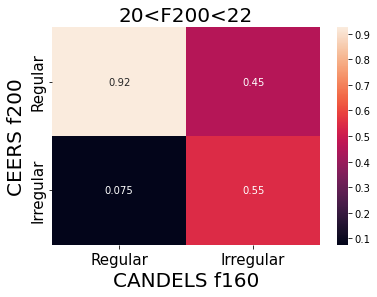

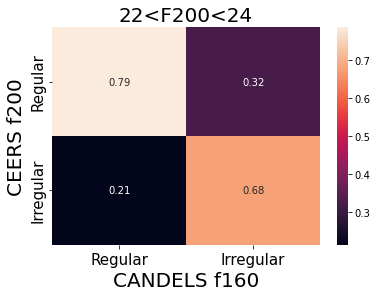

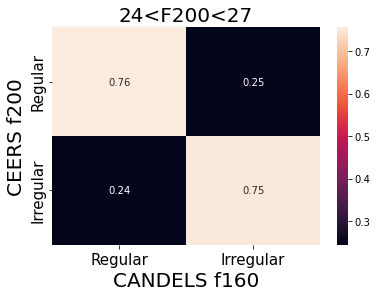

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))

    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==1]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==1]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Regular","Irregular"],fontsize=15); ax.yaxis.set_ticklabels(["Regular","Irregular"],fontsize=15)
    plt.show()

[0 0 0 ... 1 1 1]
[-0.3072359  -0.83690425 -0.31219111 ... -0.46897861 -0.43397048
 -1.0010871 ]
1132.0
-0.12070343725019984
0.4524380495603517
[ 0.         -0.5         0.1         0.         -0.14285714 -0.14285714
  0.          0.          0.5        -0.4         0.          0.0952381
  0.         -0.05263158  0.04166667  0.05769231  0.          0.
 -0.03125    -0.12264151 -0.20895522  0.         -0.07692308 -0.15492958
 -0.18382353 -0.20918367 -0.2        -0.10526316 -0.20512821 -0.12643678
 -0.14285714  0.          0.          0.33333333 -0.30769231  0.
 -0.13333333 -1.         -0.5        -0.33333333 -0.25        0.
 -1.          0.          0.          0.         -0.5         0.
 -1.          0.          0.         -0.25        0.          0.
  0.2        -0.5         0.          0.28571429  0.5         0.
  0.16666667 -0.05882353  0.04        0.1        -0.25       -0.02222222
  0.01111111 -0.10416667  0.         -0.11764706 -0.15384615 -0.15625
 -0.24418605  0.         -0.1081

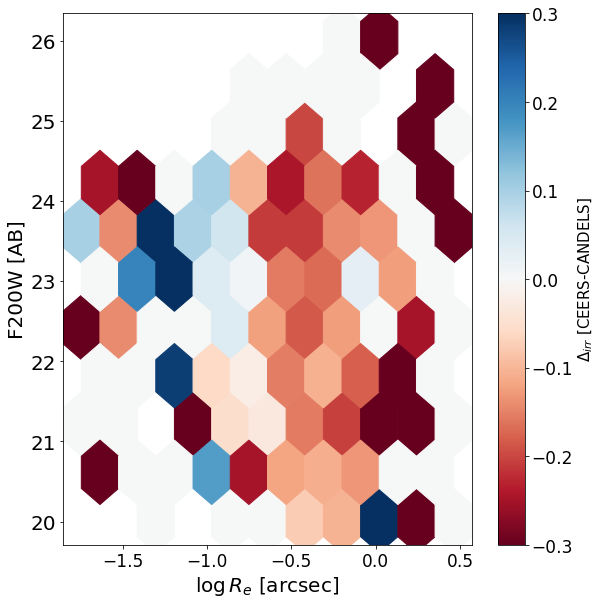

In [161]:
zbins = [20,22,24,27]


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)


candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>20 and F200_AB<27 and re>0 and re<3")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==1]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_CANDELS.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==1]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=ceers_morph
arr[:,1]=candels_morph

print(ceers_morph)
#conc = np.concatenate((ceers_morph,candels_morph),axis=1)

re = np.log10(sel.re.values)
mag = sel.F200_AB.values

print(re)

print(sum(arr[:,0]))

def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)

def funct2(z):
    
    return 100

print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(re,mag,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{irr}$ [CEERS-CANDELS]',size=15)
print(all.get_array())
plt.xlabel("$\log R_e$ [arcsec]",fontsize=20)
plt.ylabel("F200W [AB]",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mag_re_irr.png")
#print(all.get_array())
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

2502
[-0.3072359  -0.83690425 -0.31219111 ... -0.46897861 -0.43397048
 -1.0010871 ]
1132.0
1.0
0.4524380495603517
[0.00039968 0.00159872 0.0039968  0.00039968 0.00279776 0.00279776
 0.00039968 0.00079936 0.00239808 0.0019984  0.00679456 0.00839329
 0.00159872 0.00759392 0.01918465 0.04156675 0.00039968 0.00479616
 0.01278977 0.04236611 0.08033573 0.00039968 0.00519584 0.0283773
 0.05435651 0.07833733 0.0019984  0.00759392 0.01558753 0.03477218
 0.03357314 0.00079936 0.00079936 0.00239808 0.00519584 0.00319744
 0.0059952  0.00039968 0.00079936 0.00119904 0.00159872 0.00119904
 0.00039968 0.00039968 0.00039968 0.00039968 0.00079936 0.00039968
 0.00039968 0.00079936 0.0019984  0.00159872 0.00039968 0.00039968
 0.0019984  0.00079936 0.00039968 0.00279776 0.00479616 0.00159872
 0.00239808 0.00679456 0.00999201 0.01199041 0.00639488 0.01798561
 0.03597122 0.01918465 0.00039968 0.01358913 0.03117506 0.06394884
 0.0343725  0.00039968 0.01478817 0.04156675 0.06115108 0.02717826
 0.00079936 0.00

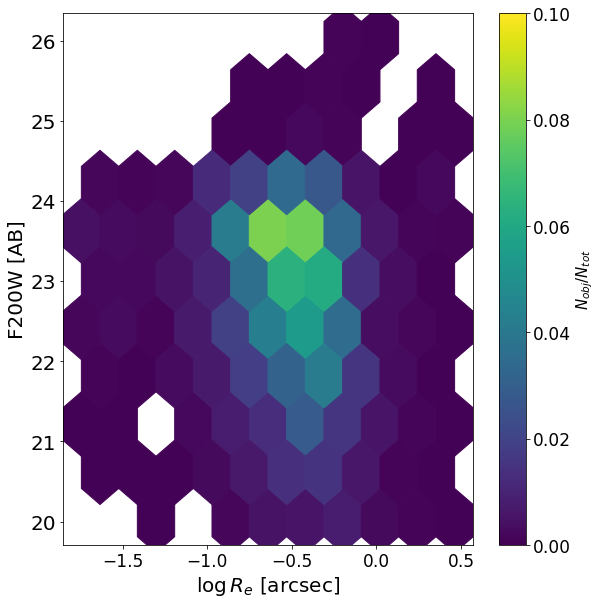

In [30]:
zbins = [20,22,24,27]


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)


candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>20 and F200_AB<27 and re>0 and re<3")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==1]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_CANDELS.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==1]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=ceers_morph
arr[:,1]=candels_morph

print(len(arr))
#conc = np.concatenate((ceers_morph,candels_morph),axis=1)

re = np.log10(sel.re.values)
mag = sel.F200_AB.values

print(re)

print(sum(arr[:,0]))

def funct(z):
    return (len(z)/2502.)

def funct2(z):
    
    return 100

print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(re,mag,C=arr,reduce_C_function=funct,gridsize=10,vmin=0,vmax=0.1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$N_{obj}/N_{tot}$',size=15)
print(all.get_array())
plt.xlabel("$\log R_e$ [arcsec]",fontsize=20)
plt.ylabel("F200W [AB]",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mag_re_nobjects.png")
#print(all.get_array())
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

[230 423 277 165 100  35]
[230 423 277 165 100  35]
[106 495 916 520 348 162]
[106 495 916 520 348 162]
[ 6 15 43 65 45 21]
[ 6 15 43 65 45 21]


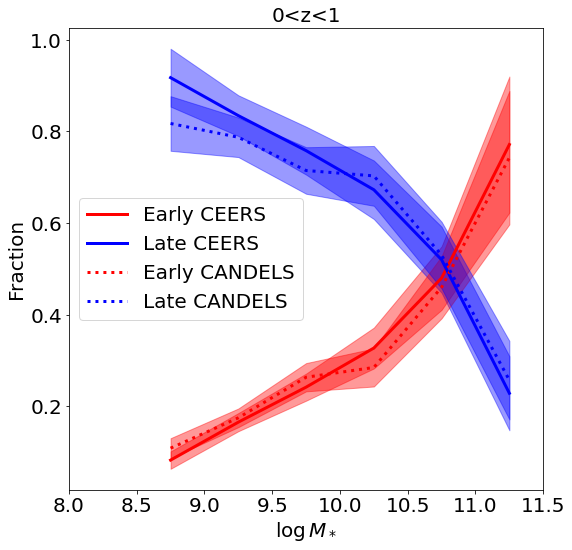

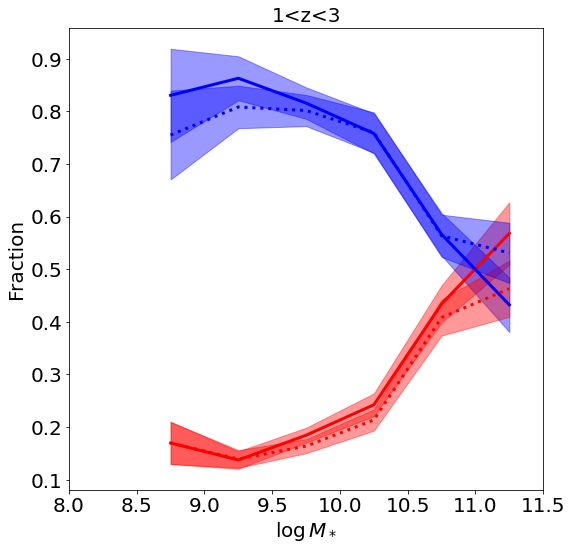

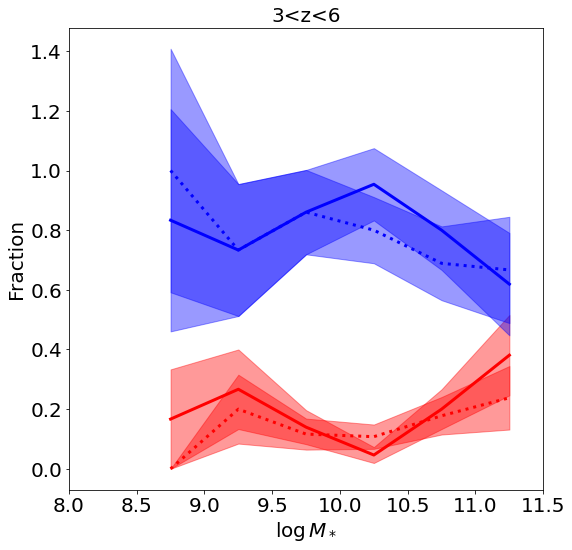

In [42]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early CEERS")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late CEERS")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)


    morph_flag = sel.morph_CANDELS

 

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early CANDELS",linestyle=':')
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late CANDELS",linestyle=':')
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='center left')
   # else:
    #     plt.legend(fontsize=20,loc='center left')    
    plt.title(str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_CANDELS-CEERS.png")

[230 423 277 165 100  35]
[230 423 277 165 100  35]
[106 495 916 520 348 162]
[106 495 916 520 348 162]
[ 6 15 43 65 45 21]
[ 6 15 43 65 45 21]


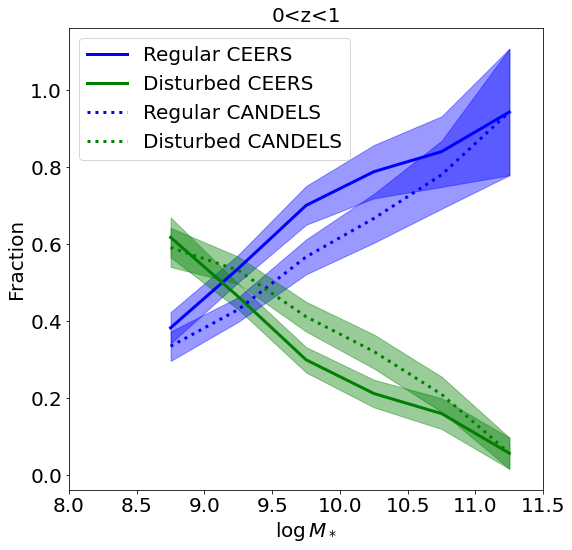

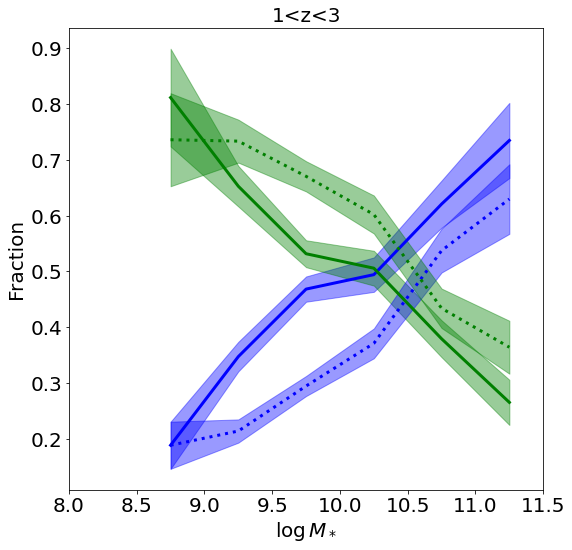

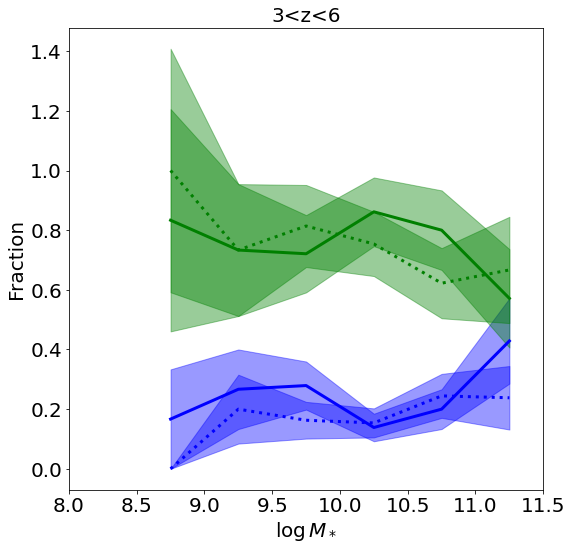

In [40]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular CEERS")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed CEERS")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)


    morph_flag = sel.morph_CANDELS

 

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)|(morph_flag==1)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==2) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='blue',linewidth=3,label="Regular CANDELS",linestyle=':')
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,dk/all,color='green',linewidth=3,label="Disturbed CANDELS",linestyle=':')
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='green',alpha=0.4)



    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    if zup==1:
        plt.legend(fontsize=20,loc='upper left')
    #else:
     #    plt.legend(fontsize=20,loc='upper left')    
    plt.title(str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_irr"+str(zlow)+"f200_CANDELS-CEERS.png")

[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.

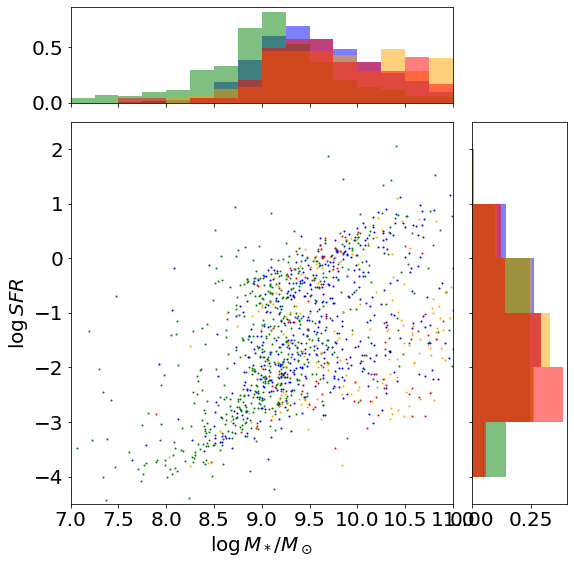

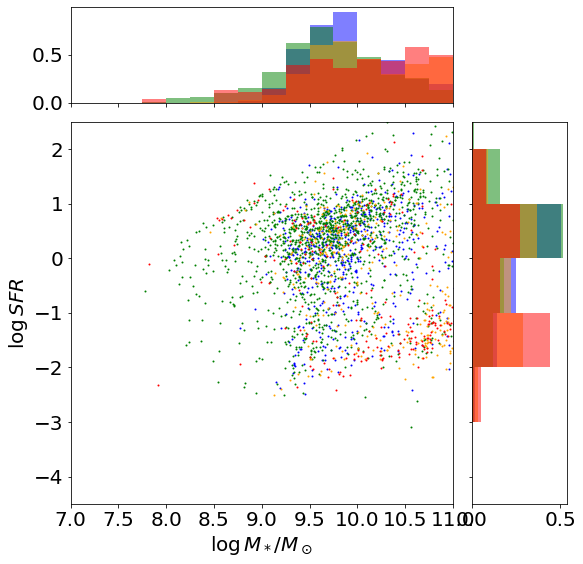

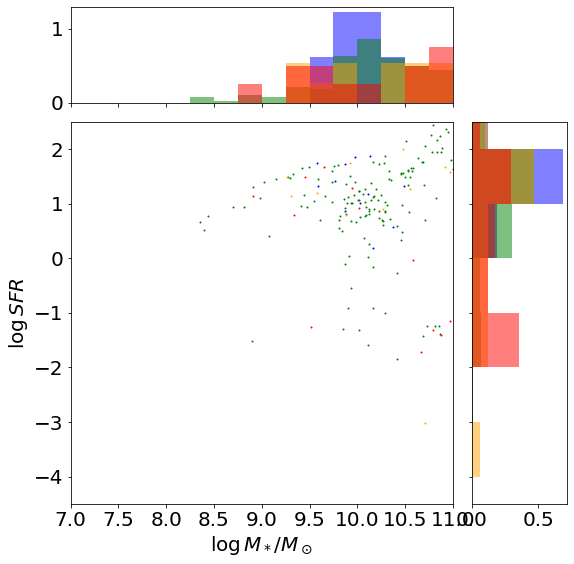

In [45]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,c='black'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color=c)

    # now determine nice limits by hand:
    binwidth_x = 0.25
    binwidth_y = 1
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(lim_x[0], lim_x[1] + binwidth_x, binwidth_x)
    bins_y= np.arange(lim_y[0], lim_y[1] + binwidth_y, binwidth_y)
    #print(bins_x)
    ax_histx.hist(x, bins=bins_x,color=c,density=True,alpha=0.5)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=c,density=True,alpha=0.5)


for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w
    fig = plt.figure()
    fig.set_size_inches(8.5, 8.5)
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    plt.xlim(7,11)
    plt.ylim(-4.5,2.5)
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.ylabel("$\log SFR$",fontsize=20)
    plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    
    
    scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

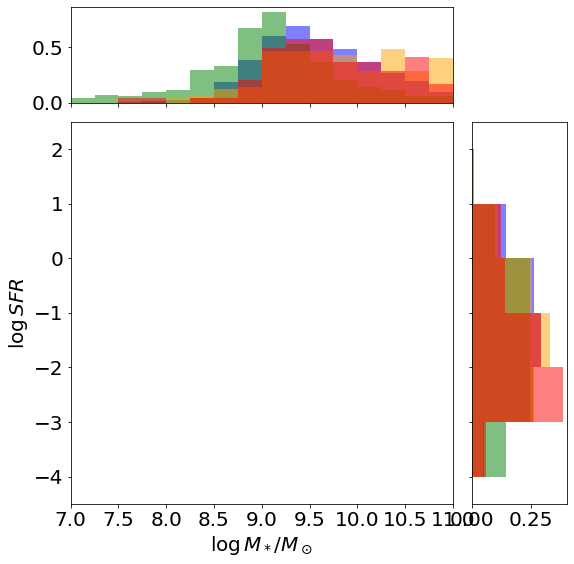

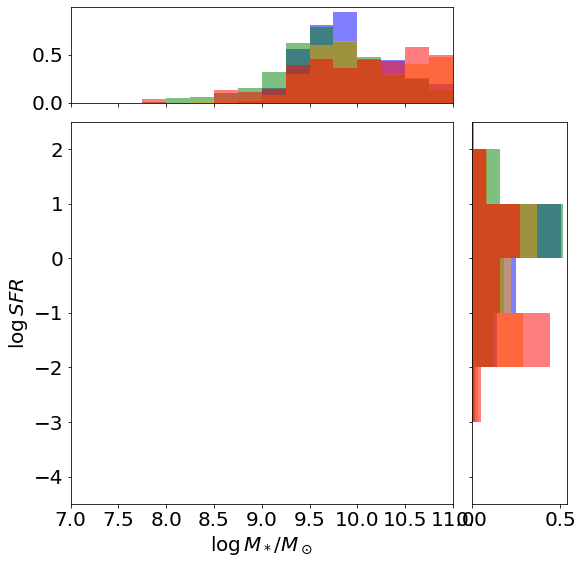

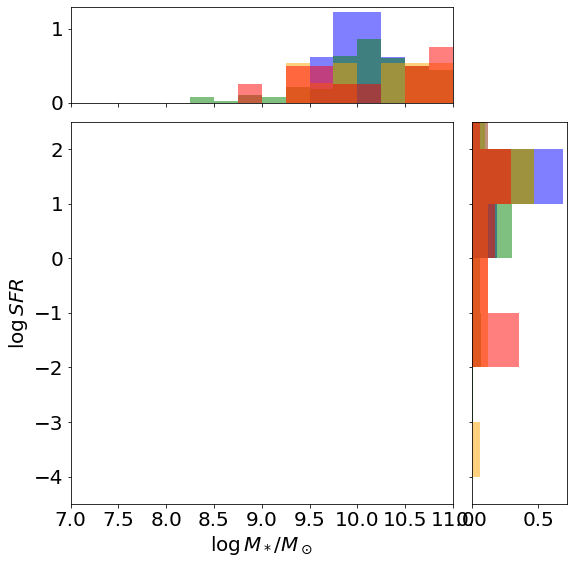

In [88]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,c='black'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    #ax.scatter(x, y,s=1,color=c)
    #ax.contour(x, y, Z, colors='black');
    #x = np.linspace(lim_x[0], lim_x[1], 50)
    #y = np.linspace(lim_y[0], lim_y[1], 40)

    #X, Y = np.meshgrid(x, y)
    # now determine nice limits by hand:
    binwidth_x = 0.25
    binwidth_y = 1
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(lim_x[0], lim_x[1] + binwidth_x, binwidth_x)
    bins_y= np.arange(lim_y[0], lim_y[1] + binwidth_y, binwidth_y)
    #print(bins_x)
    ax_histx.hist(x, bins=bins_x,color=c,density=True,alpha=0.5)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=c,density=True,alpha=0.5)


for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w
    fig = plt.figure()
    fig.set_size_inches(8.5, 8.5)
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    plt.xlim(7,11)
    plt.ylim(-4.5,2.5)
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.ylabel("$\log SFR$",fontsize=20)
    plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    
    
    scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

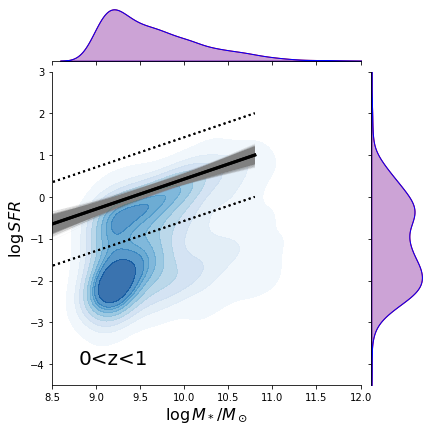

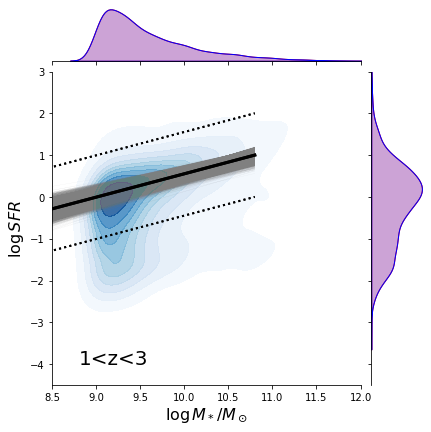

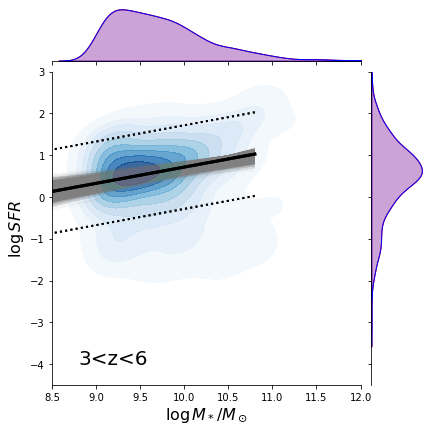

In [168]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f200w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==1)|(morph_flag==2)], y=SFR[(morph_flag==1)|(morph_flag==2)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        

    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_LT"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [ ]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f200w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==1)|(morph_flag==2)], y=SFR[(morph_flag==1)|(morph_flag==2)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        

    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_LT"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


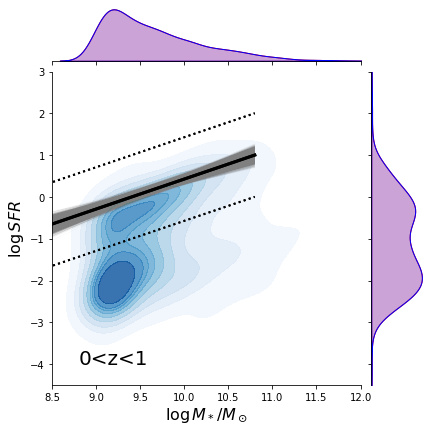

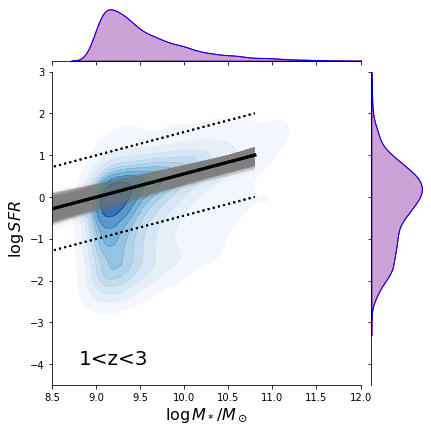

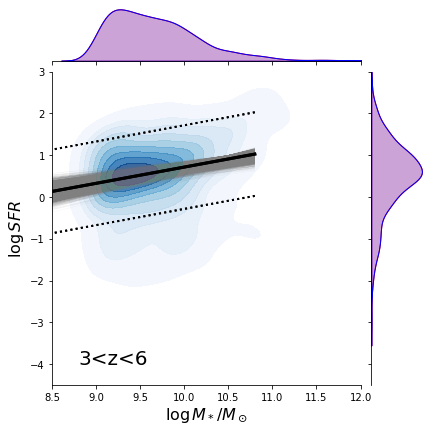

In [162]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f356w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==1)|(morph_flag==2)], y=SFR[(morph_flag==1)|(morph_flag==2)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        

    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_LT"+str(zlow)+"f356.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


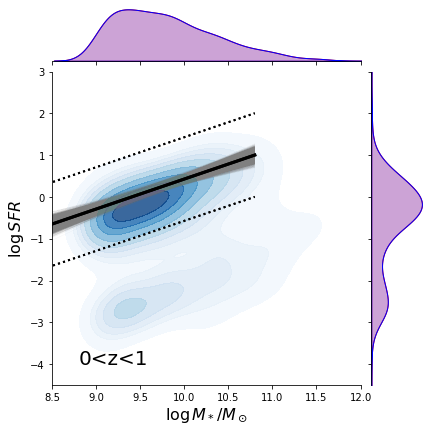

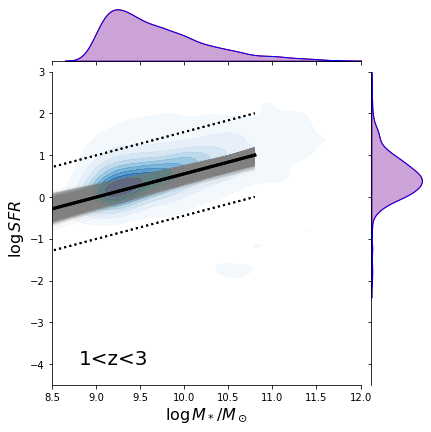

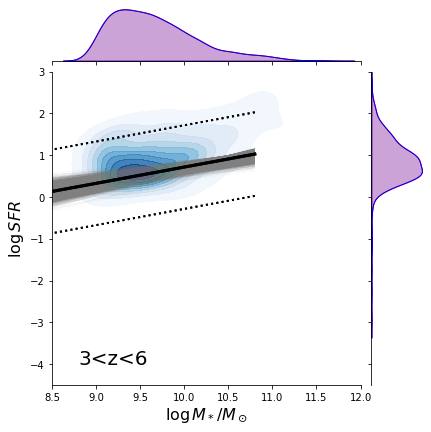

In [178]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and sigma_err<2.5")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    logSFR_84 = sel['logSFR100_84']
    logSFR_16 = sel['logSFR100_16']
    logmstar_84 = sel['logM_84']
    logmstar_16 = sel['logM_16']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    nsamples = 100
    mass_samples=[]
    SFR_samples=[]
    for i in range(nsamples):
        mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
        SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))
    
    graph = sns.jointplot(x=mass[(morph_flag==1)|(morph_flag==2)], y=SFR[(morph_flag==1)|(morph_flag==2)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        

    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_LT"+str(zlow)+"f444.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


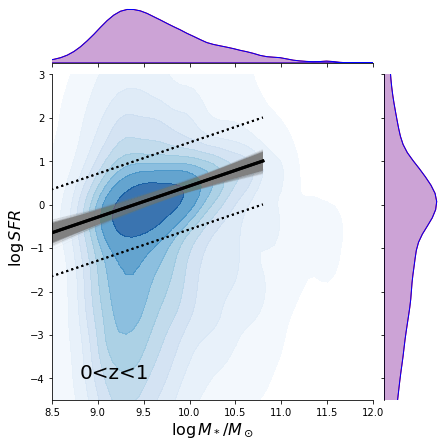

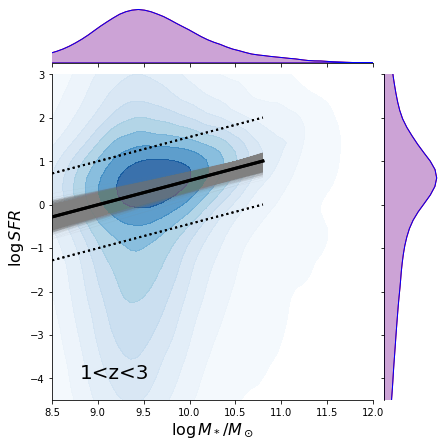

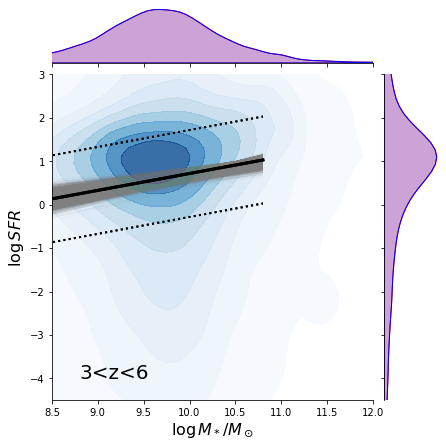

In [186]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f444w==1 or morph_flag_f444w==2)")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    logSFR_84 = sel['logSFR100_84']
    logSFR_16 = sel['logSFR100_16']
    logmstar_84 = sel['logM_84']
    logmstar_16 = sel['logM_16']
    morph_flag = sel.morph_flag_f444w

    nsamples = 100
    mass_samples=[]
    SFR_samples=[]
    for i in range(nsamples):
        mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
        SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

    flatten_mass = np.concatenate(mass_samples)
    flatten_SFR = np.concatenate(SFR_samples)
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        

    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    #plt.savefig(data_path+"SFR_mstar_LT"+str(zlow)+"f444.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


0.37253872
0.8296697
0.49064562


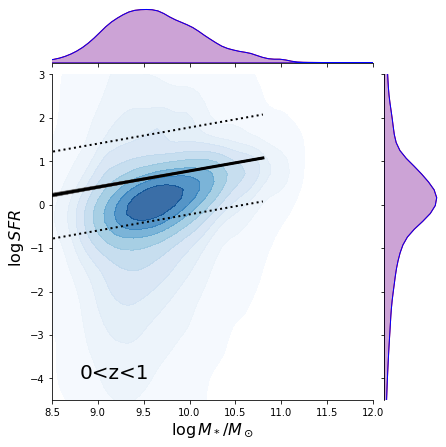

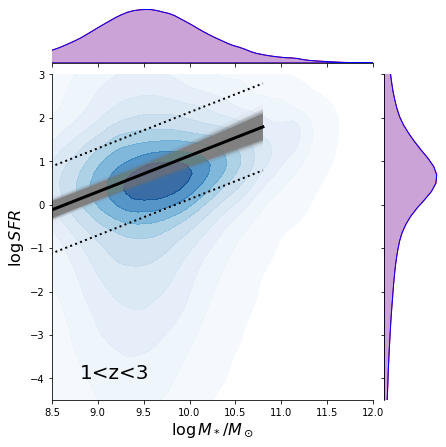

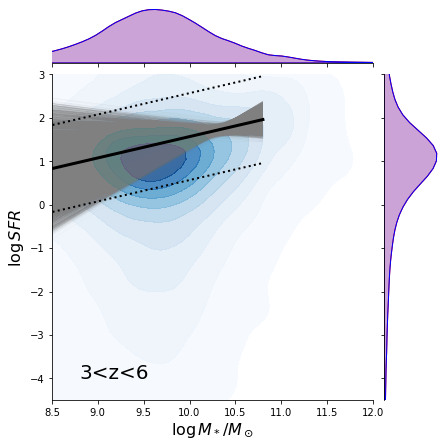

In [15]:
import seaborn as sns
zbins = [0,1,3,6]

ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-2 and logSFR100_50<3 and logM_50>9 and timescale>0.33")
    
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    logSFR_84 = sel['logSFR100_84']
    logSFR_16 = sel['logSFR100_16']
    logmstar_84 = sel['logM_84']
    logmstar_16 = sel['logM_16']
    morph_flag = sel.morph_flag_f200w

    mass_samples=[]
    SFR_samples=[]
    nsamples=100
    for i in range(nsamples):
        mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
        SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

    
    flatten_mass = np.concatenate(mass_samples)
    flatten_SFR = np.concatenate(SFR_samples)
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=flatten_mass, y=flatten_SFR,
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Blues")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_nosigma_z01_100k.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_nosigma_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_nosigma_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    print(np.mean(p_samples[:,0]))
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    #plt.savefig(data_path+"SFR_mstar_SF"+str(zlow)+".png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [76]:
import pdb
def stack_sfhs(mask, db_cat, zmin, norm=False):
    
    sfh50_all = db_cat.query(mask)['sfh_50']
    timeax_all = db_cat.query(mask)['timeax']

    tres = 1000
    common_time = np.linspace(0, cosmo.age(zmin).value, tres)
    sfh_sp = np.zeros((tres, len(sfh50_all)))

    for i in range(len(sfh50_all)):
        #pdb.set_trace()
        tempsfh = np.fromstring((db_cat.query(mask)['sfh_50'].values)[i][1:-1],sep=', ')
        temptime = np.fromstring((db_cat.query(mask)['timeax'].values)[i][1:-1],sep=', ')
        sfh_lbt = np.flip(tempsfh,0)
        if norm == True:
            sfh_sp[0:,i] = np.interp(common_time, temptime, sfh_lbt/np.sum(sfh_lbt), right=0)
        else:
            sfh_sp[0:,i] = np.interp(common_time, temptime, sfh_lbt, right=0)

    sfh_med = np.nanpercentile(sfh_sp,50,1)
    sfh_lo = np.nanpercentile(sfh_sp,16,1)
    sfh_hi = np.nanpercentile(sfh_sp,84,1)

    return common_time, sfh_med, sfh_lo, sfh_hi

0.7177984
0.5594111
0.38865227


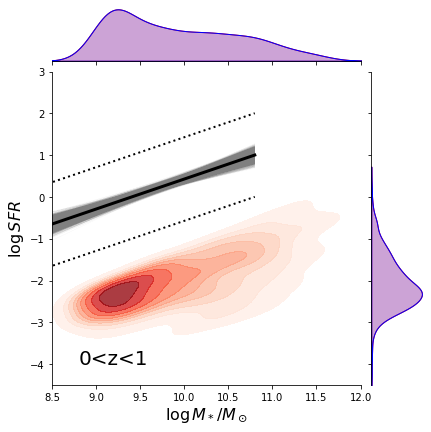

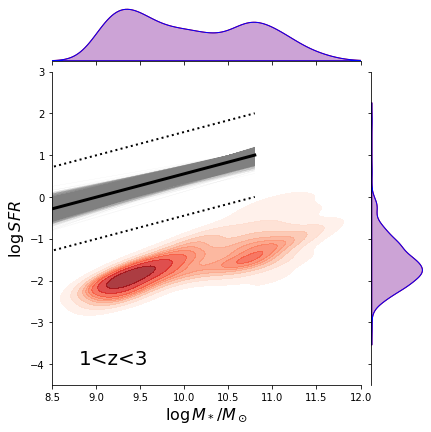

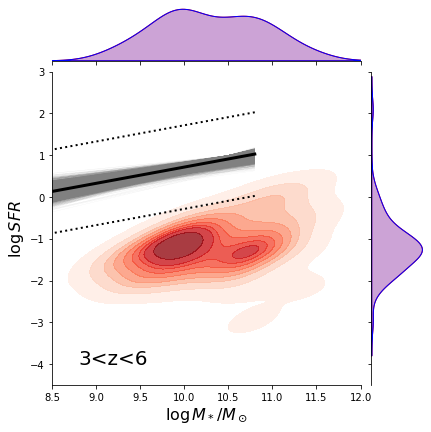

In [170]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and timescale<1/20")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f200w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass, y=SFR,
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Disk dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
    print(np.mean(p_samples[:,0]))
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_Q"+str(zlow)+".png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [139]:
p_samples = np.load(data_path+"posterior_samples_z01.npy")

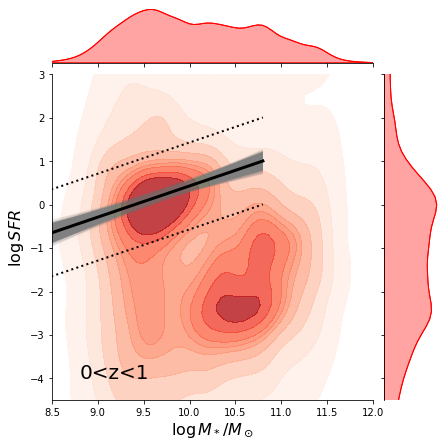

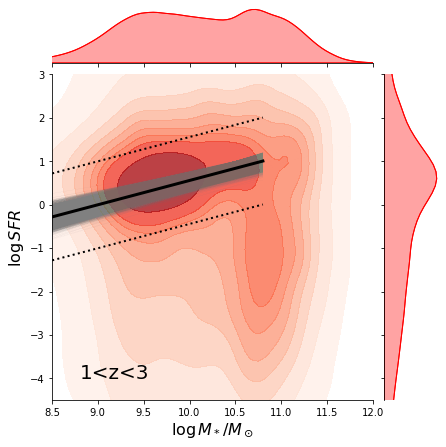

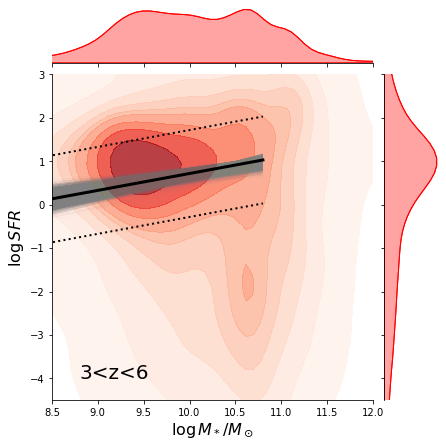

In [12]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f356w==0 or morph_flag_f356w==3)")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    logSFR_84 = sel['logSFR100_84']
    logSFR_16 = sel['logSFR100_16']
    logmstar_84 = sel['logM_84']
    logmstar_16 = sel['logM_16']
    morph_flag = sel.morph_flag_f200w

    mass_samples=[]
    SFR_samples=[]
    nsamples=100
    for i in range(nsamples):
        mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
        SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

    flatten_mass = np.concatenate(mass_samples)
    flatten_SFR = np.concatenate(SFR_samples)
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
            
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


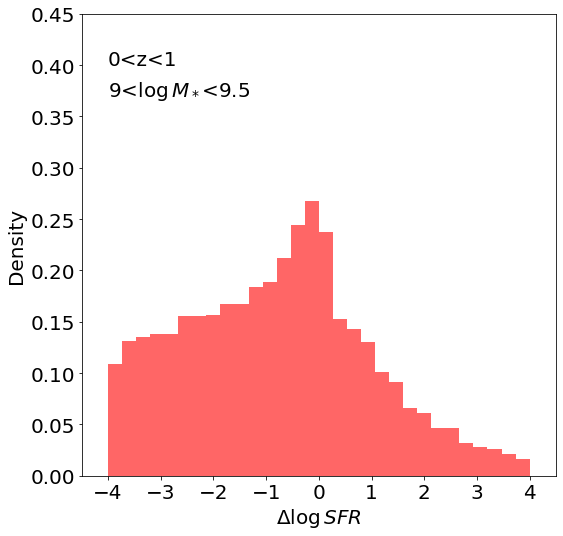

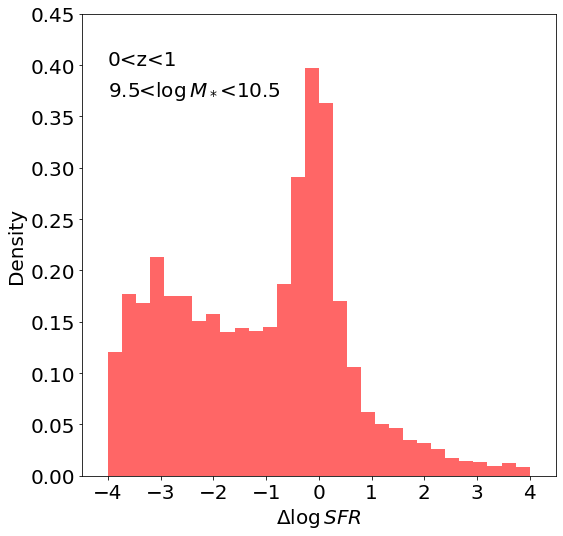

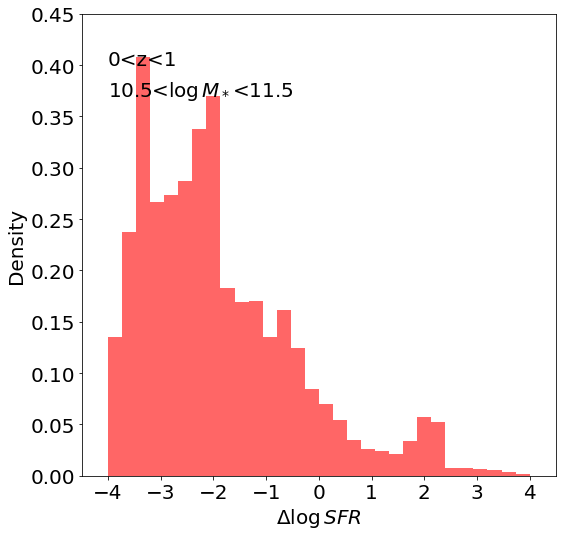

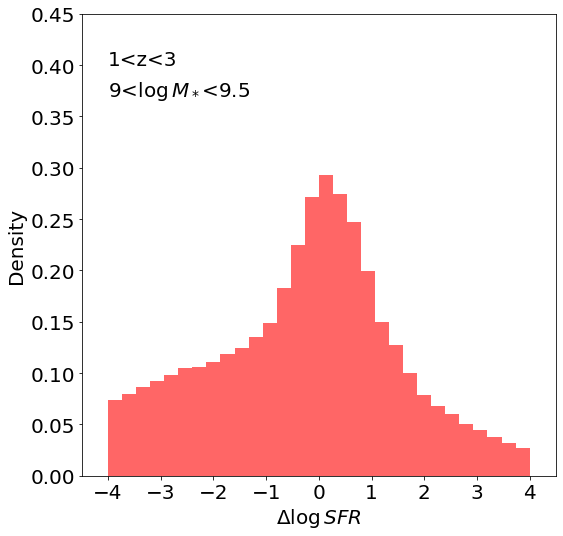

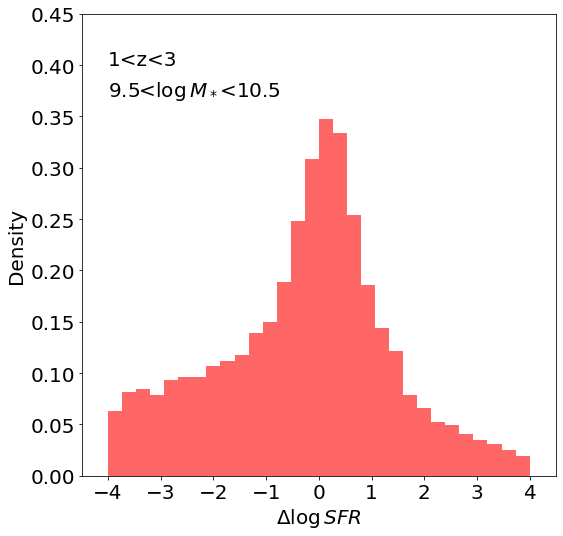

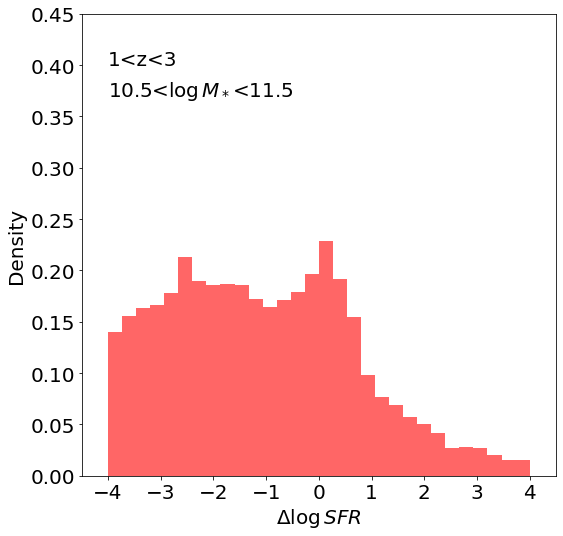

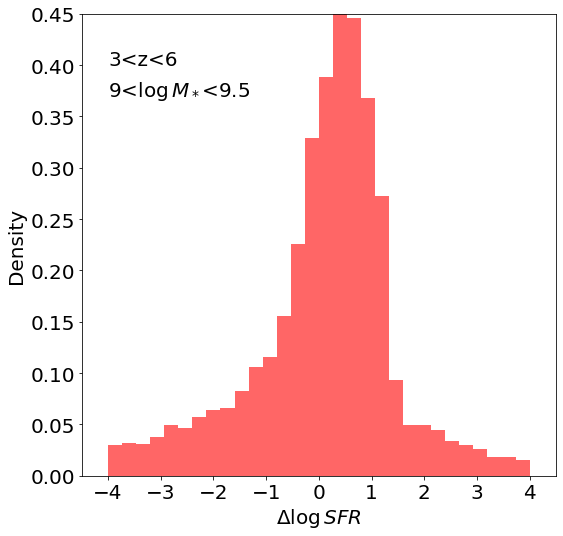

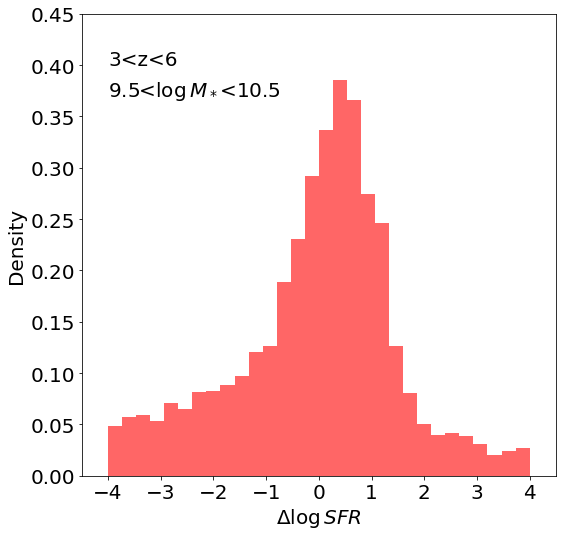

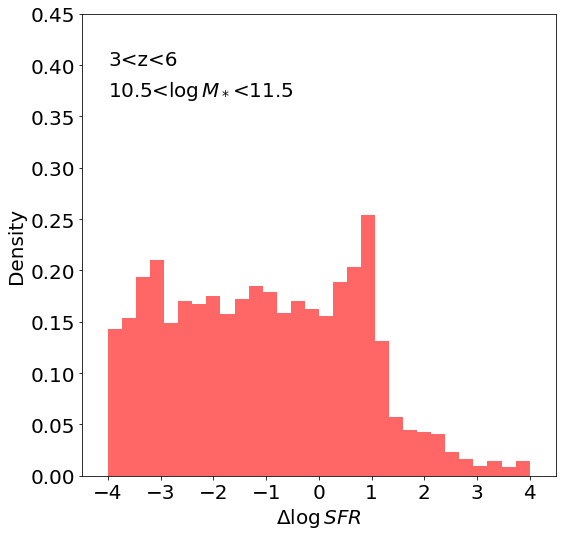

In [11]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f200w==0 or morph_flag_f200w==3)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='red',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_ET"+str(zlow)+"_"+str(mlow)+"_f200.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


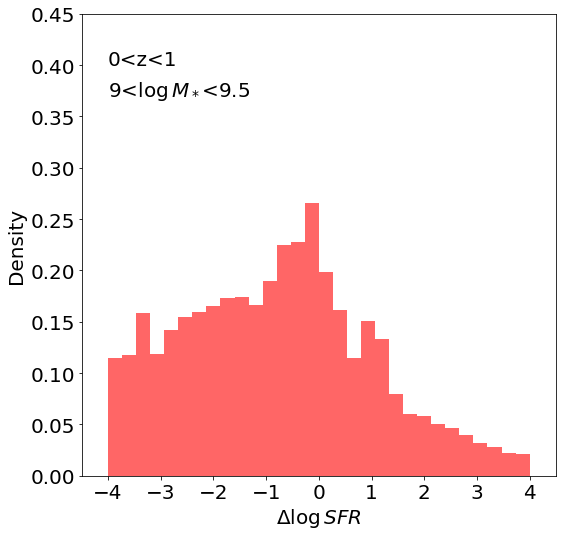

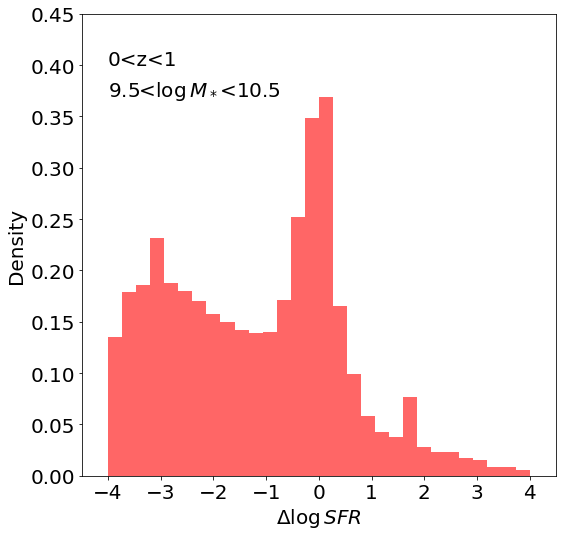

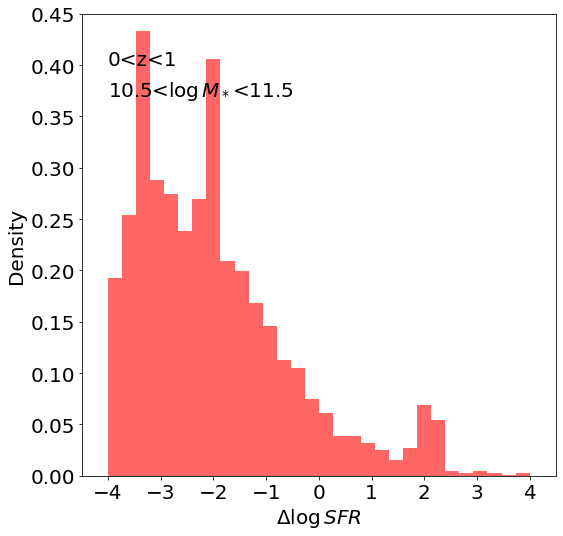

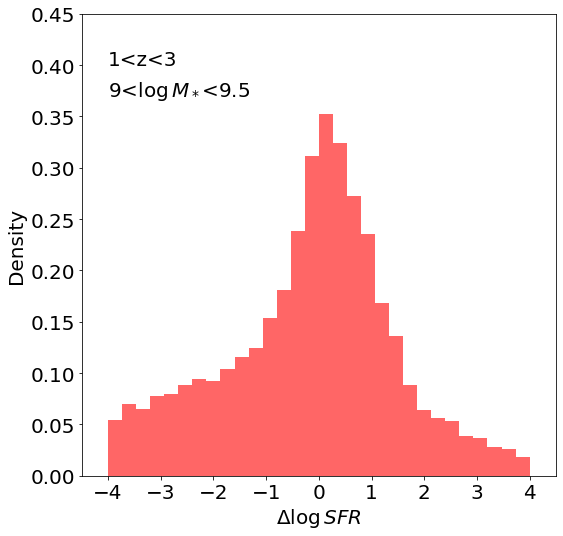

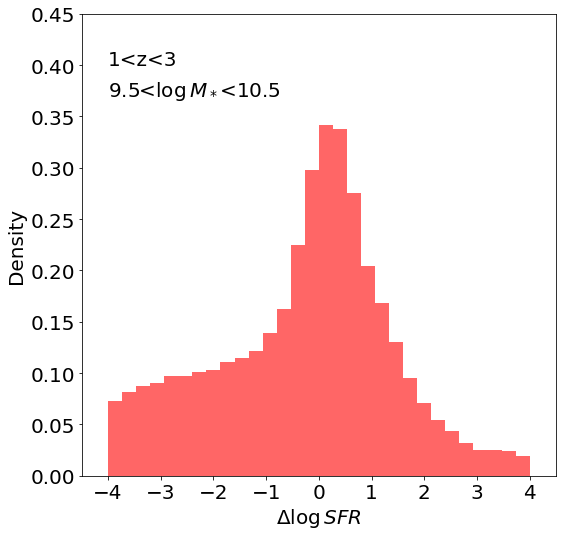

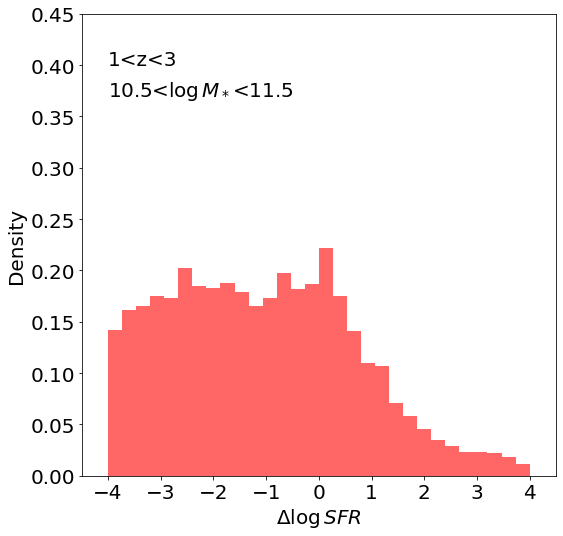

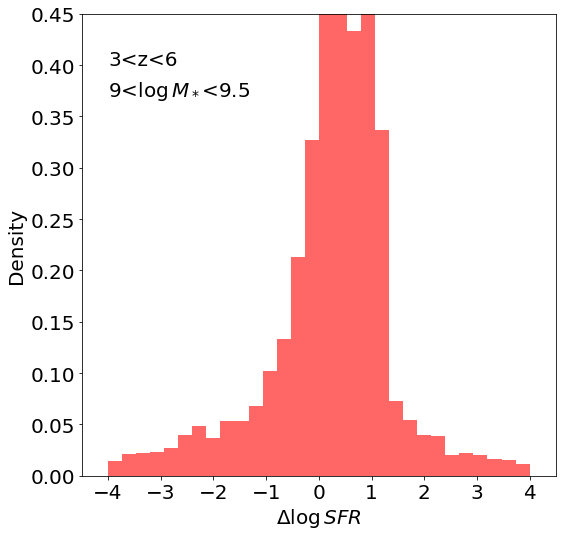

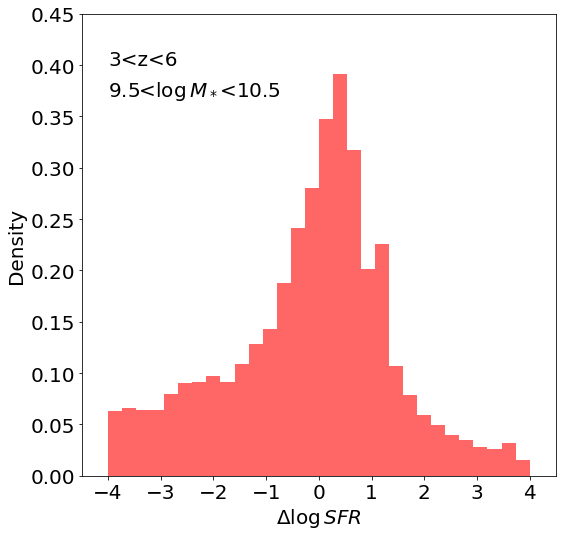

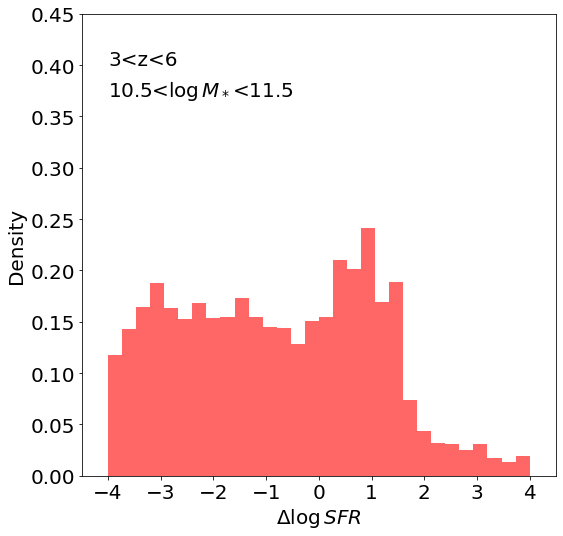

In [37]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f356w==0 or morph_flag_f356w==3)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='red',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_ET"+str(zlow)+"_"+str(mlow)+"_f356.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


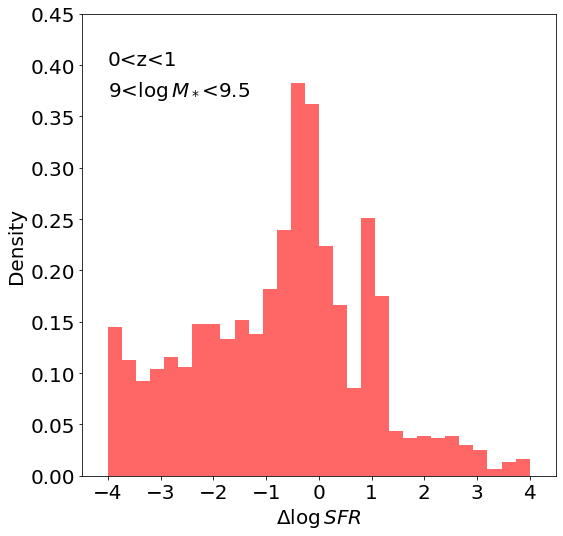

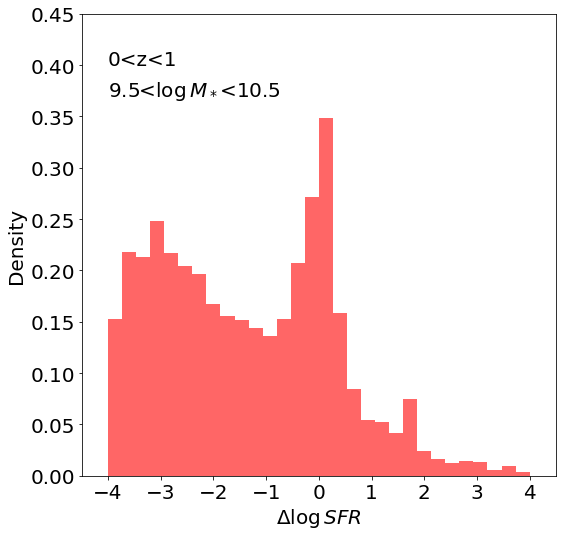

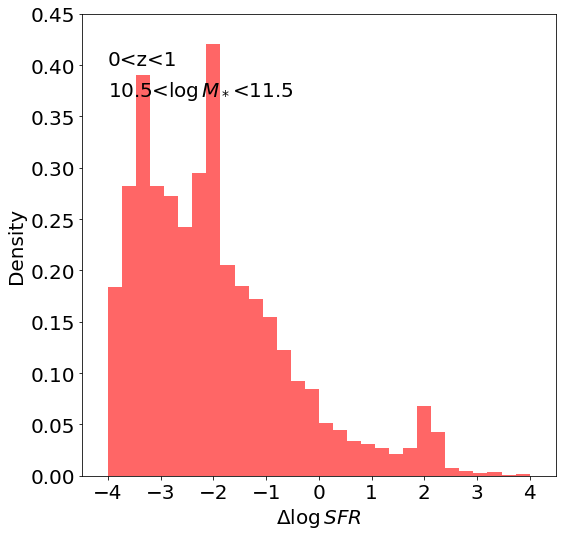

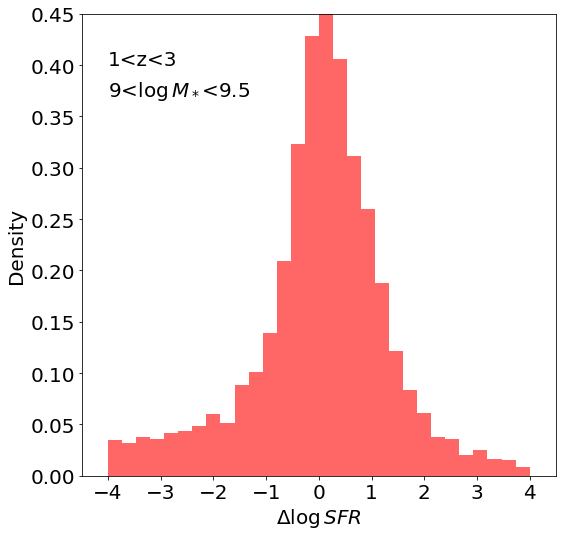

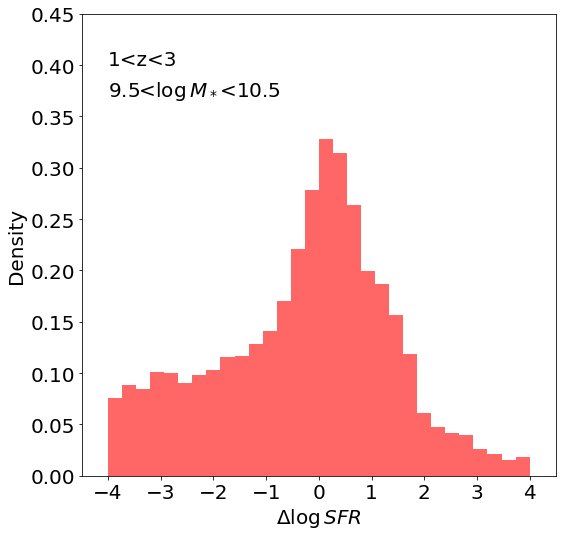

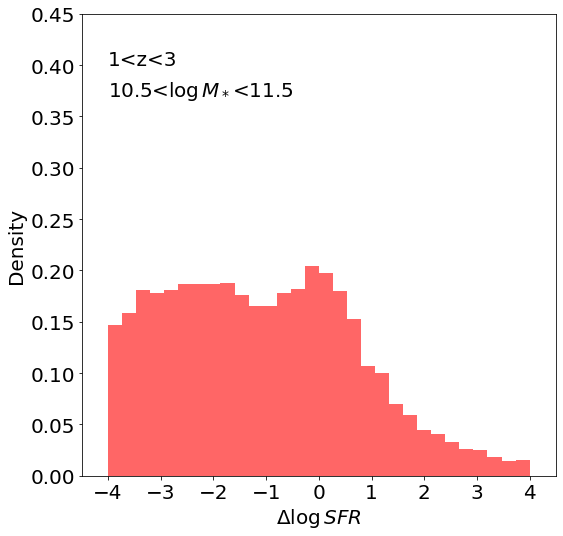

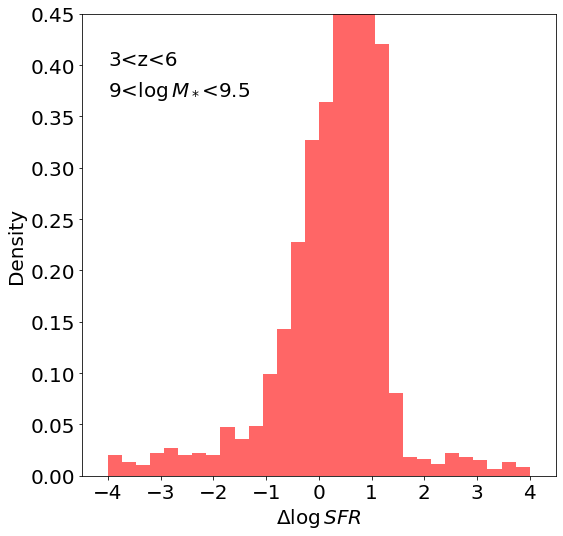

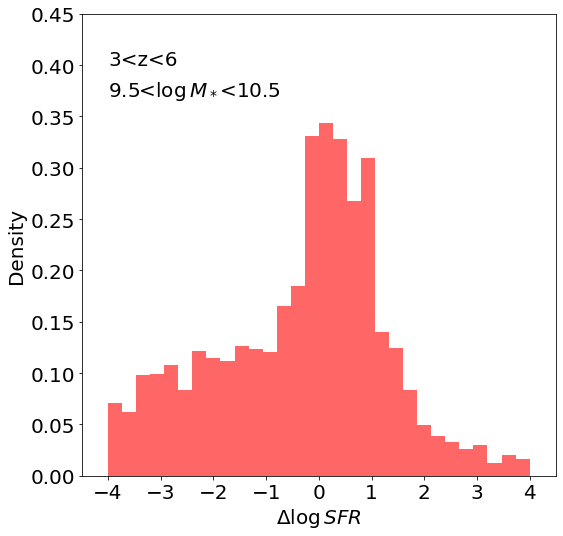

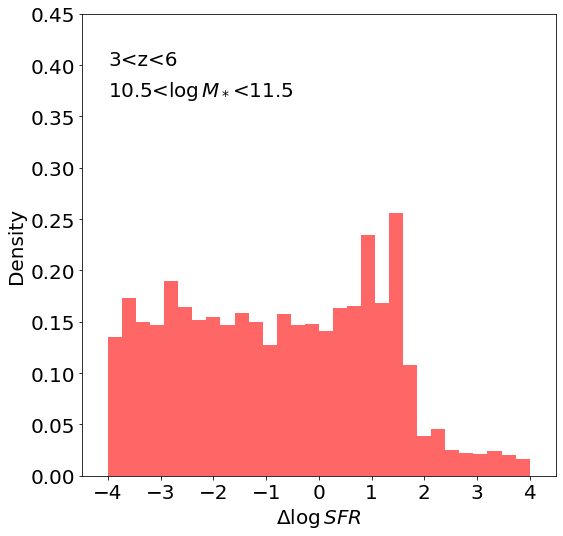

In [36]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f444w==0 or morph_flag_f444w==3)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='red',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_ET"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


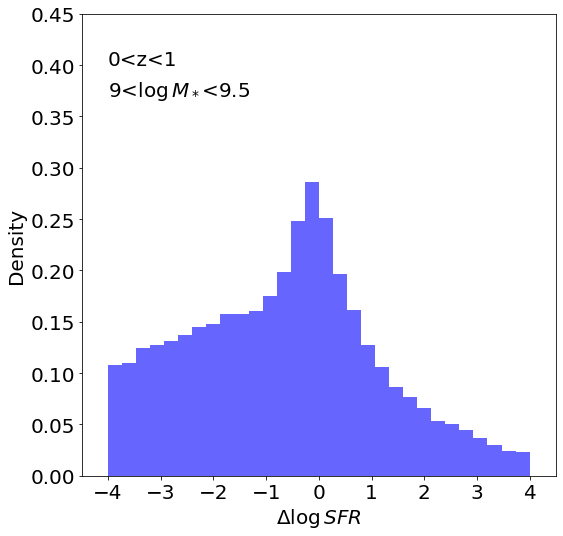

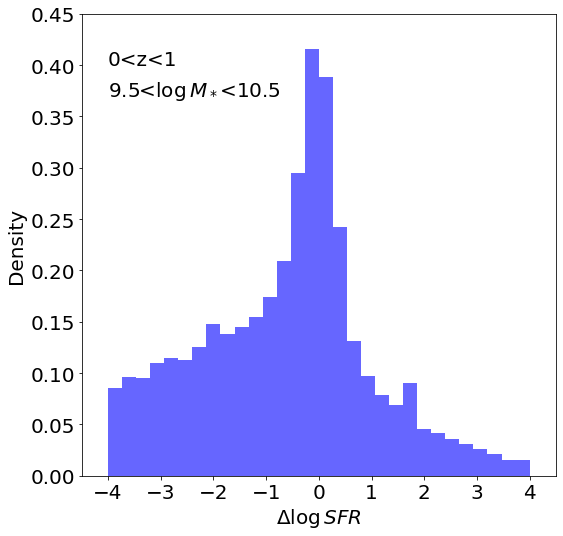

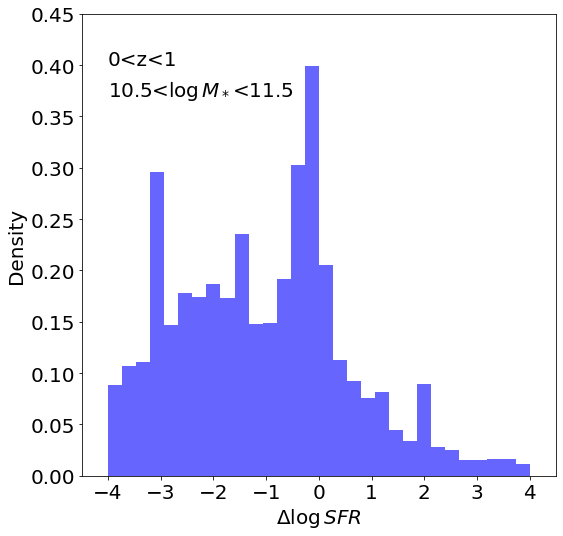

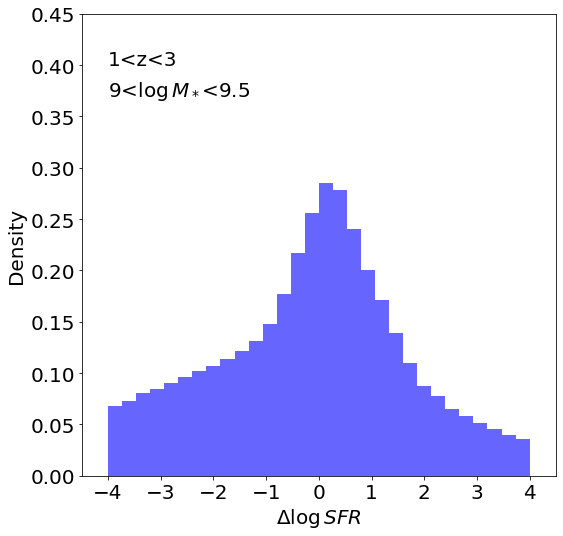

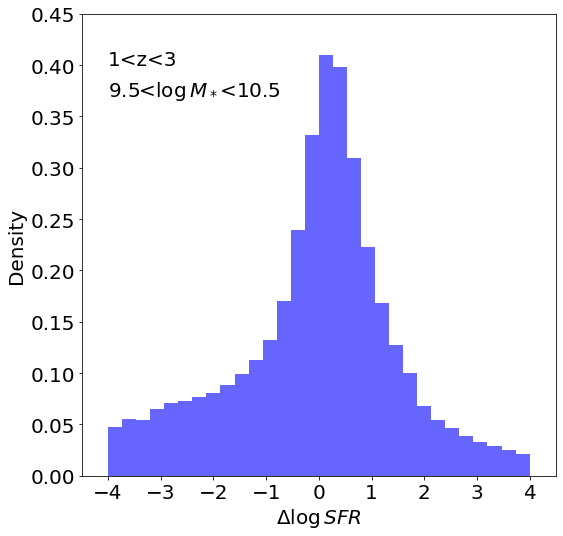

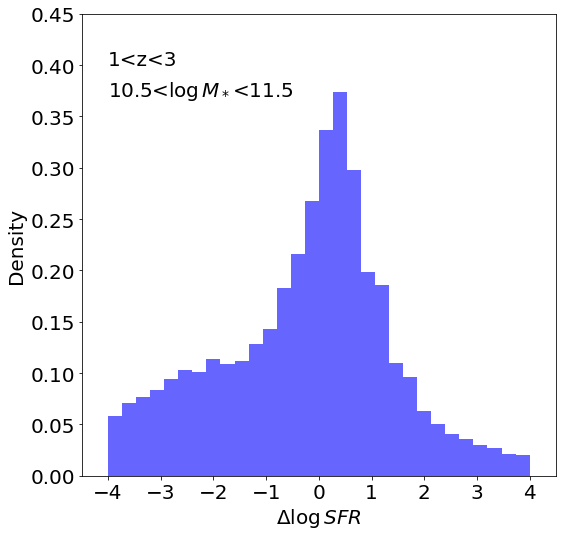

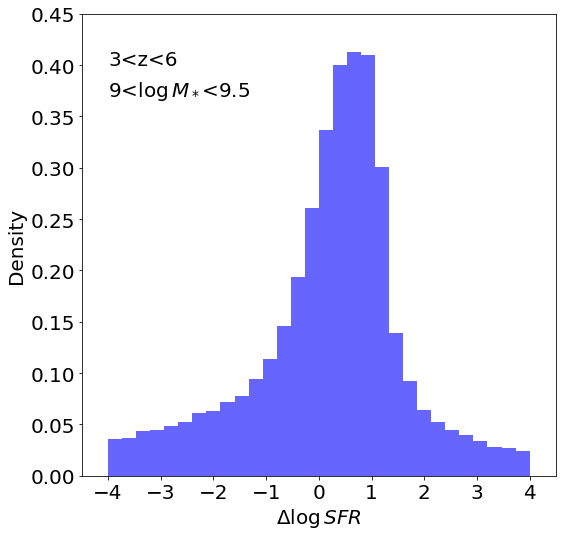

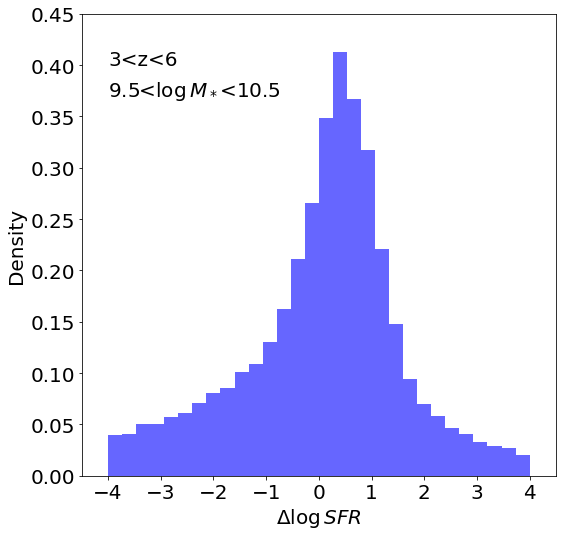

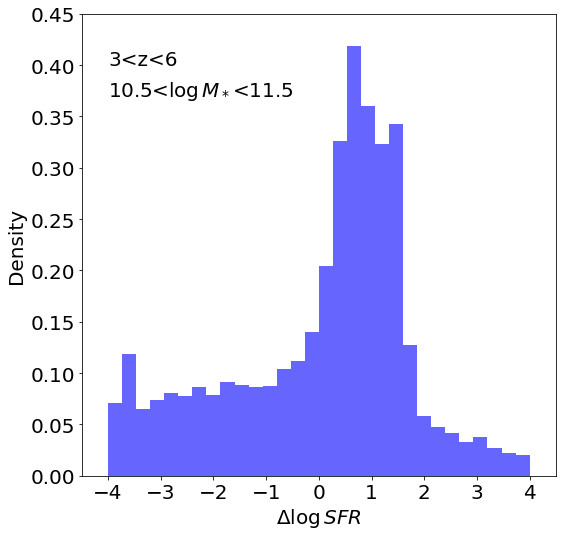

In [39]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f200w==1 or morph_flag_f200w==2)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='blue',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f200.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


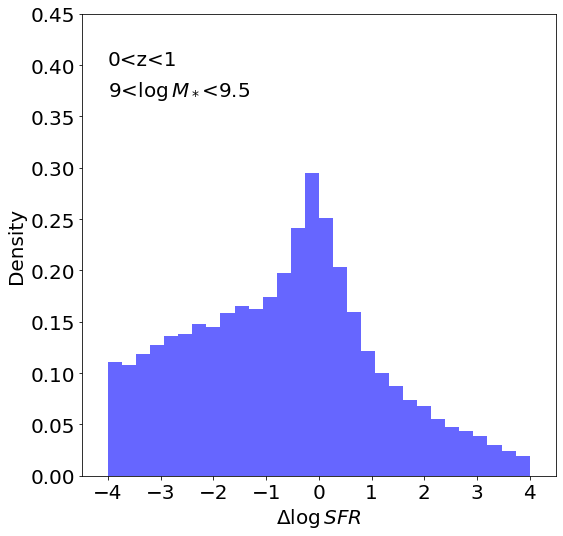

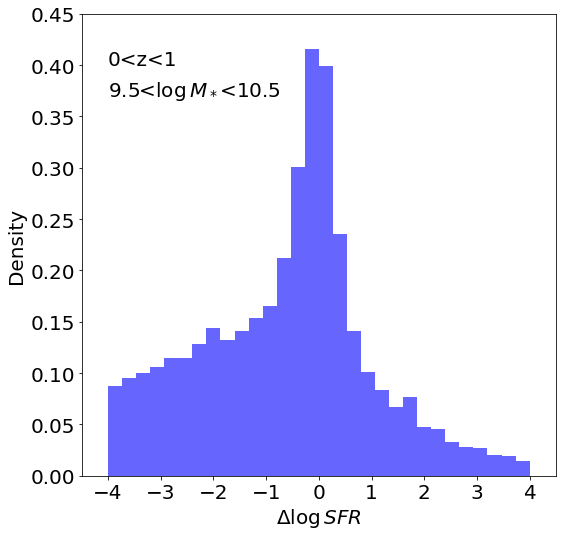

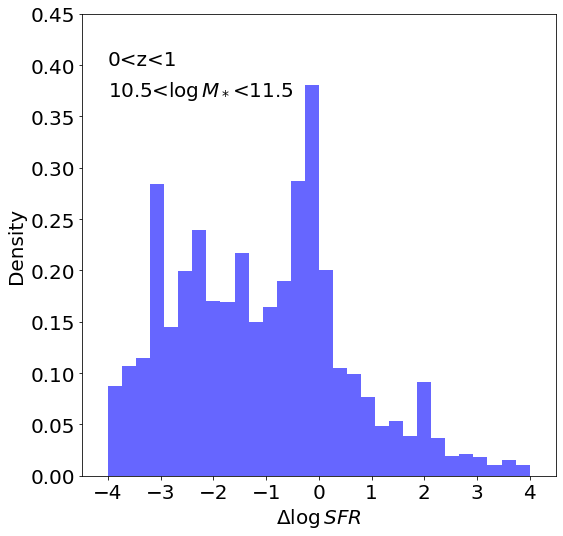

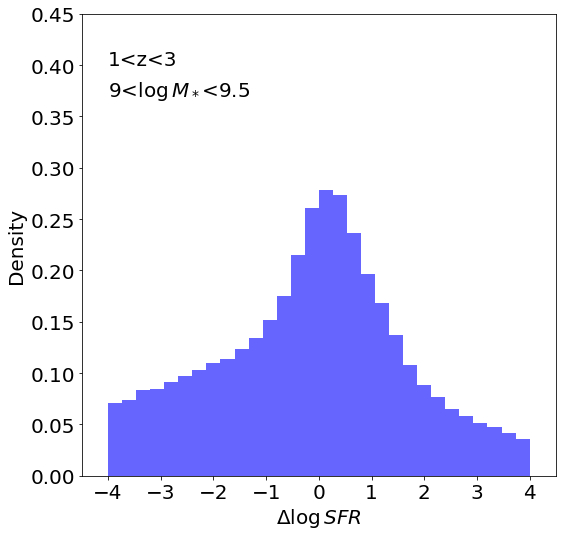

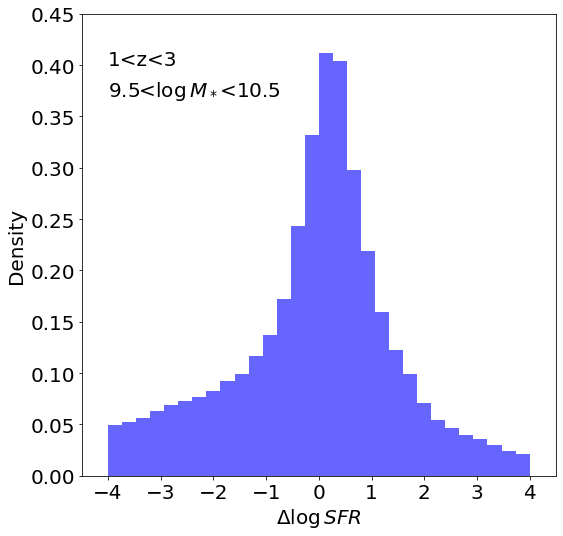

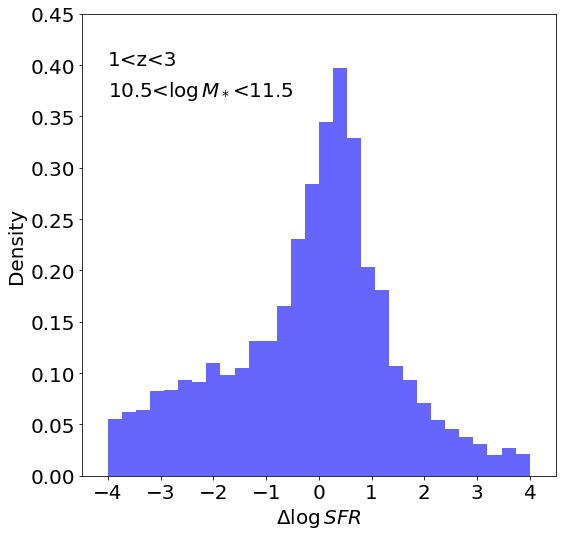

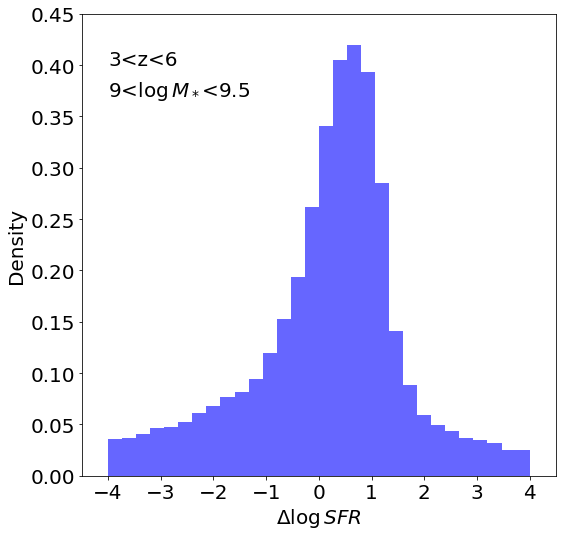

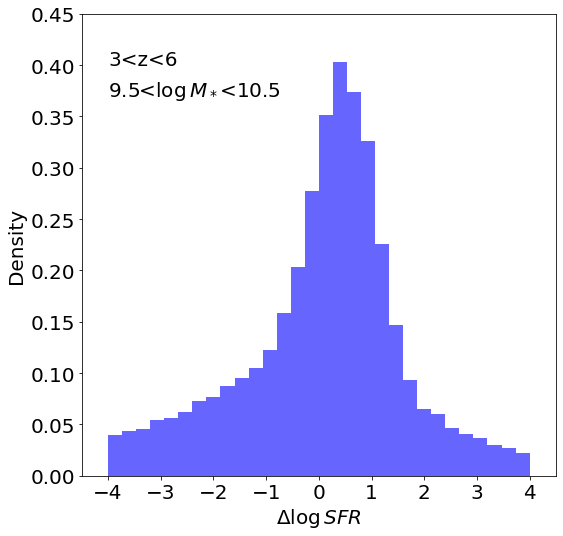

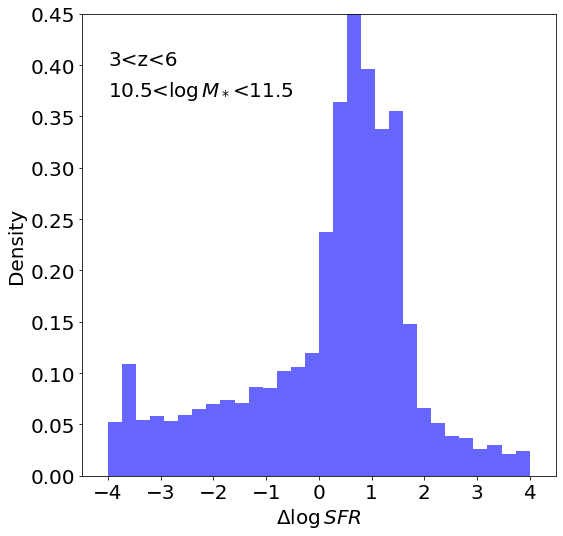

In [40]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f356w==1 or morph_flag_f356w==2)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='blue',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f356.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


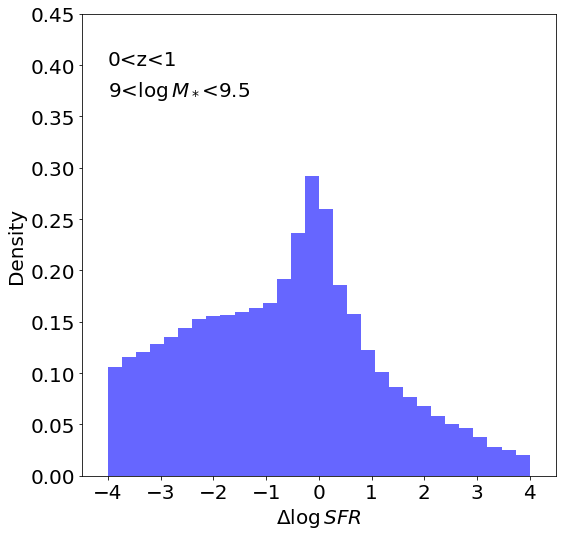

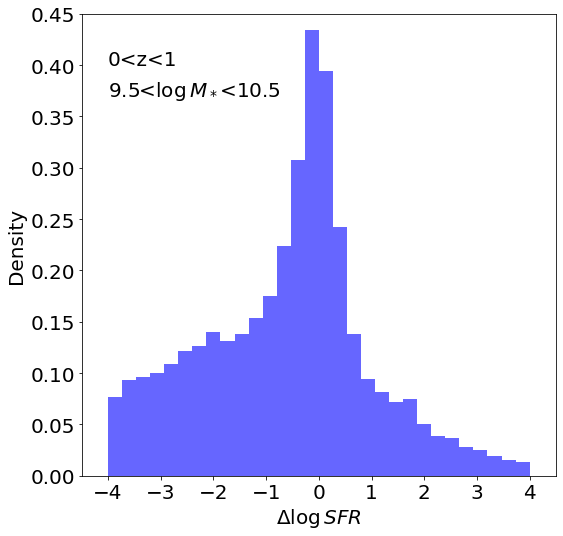

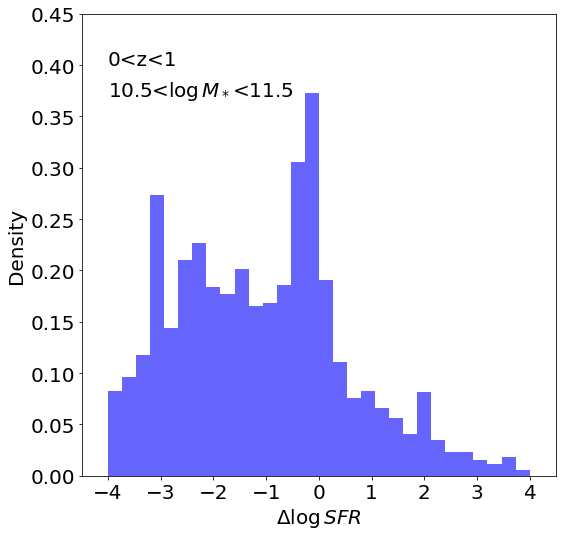

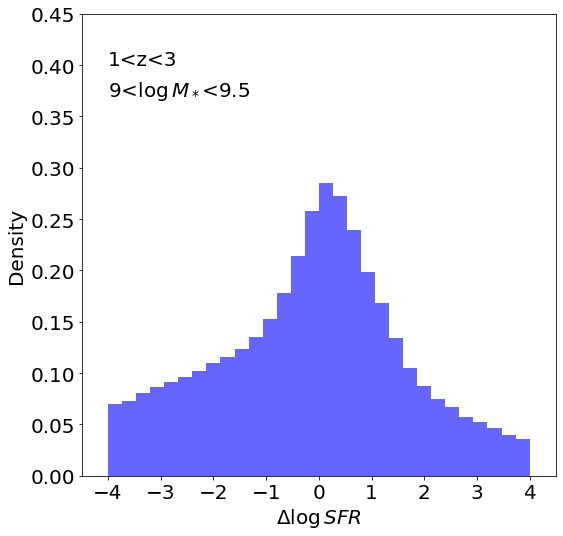

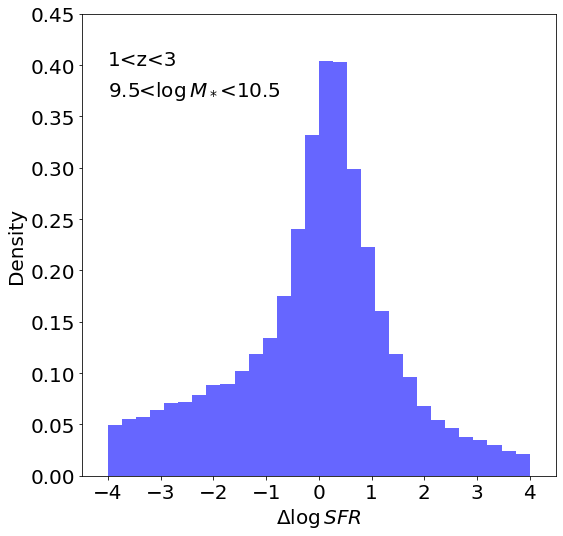

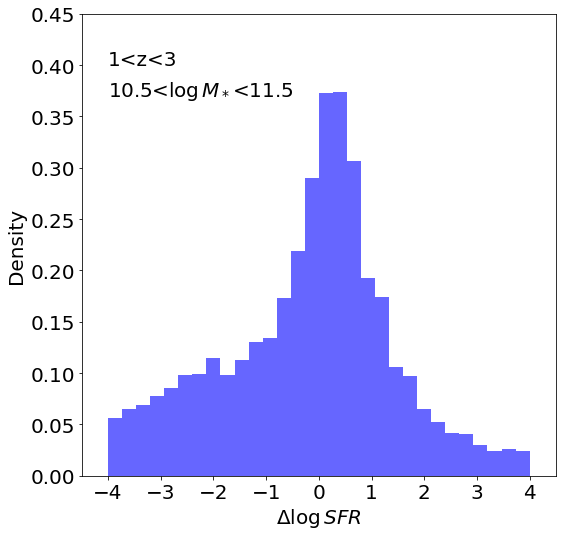

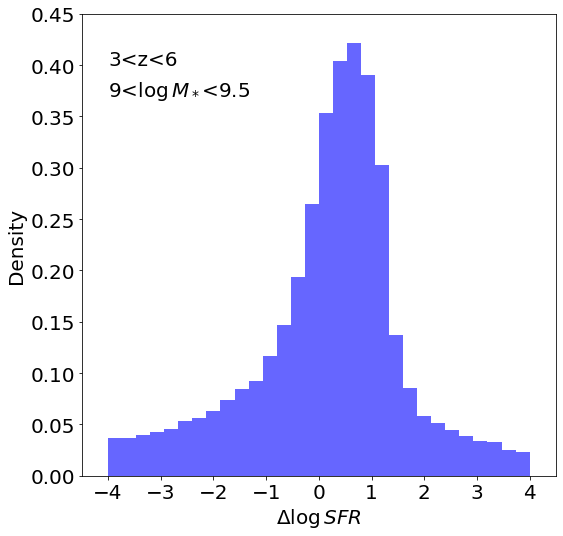

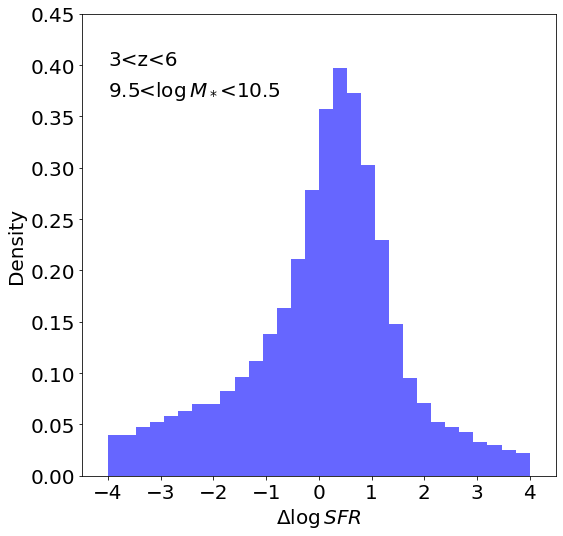

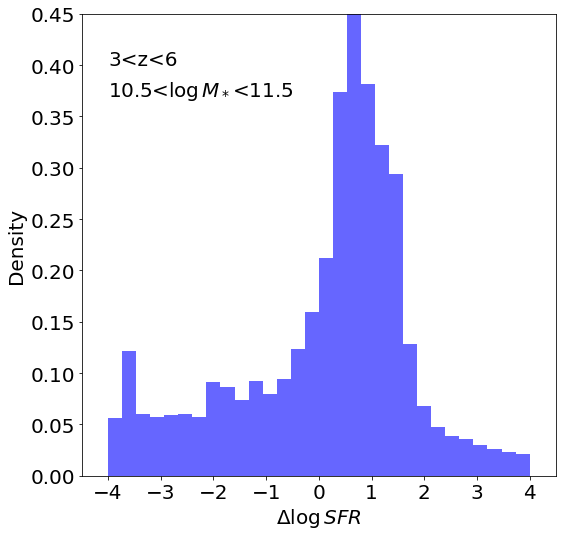

In [41]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9 and (morph_flag_f444w==1 or morph_flag_f444w==2)")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        mass_samples=[]
        SFR_samples=[]
        nsamples=100
        for i in range(nsamples):
            mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
            SFR_samples.append(SFR+np.random.normal(size=len(mass))*(logSFR_84-logSFR_16))

        flatten_mass = np.concatenate(mass_samples)
        flatten_SFR = np.concatenate(SFR_samples)

        delta_sfr =  flatten_SFR.ravel()  - (np.mean(p_samples[:,0])*(flatten_mass.ravel()-10.5)+np.mean(p_samples[:,1]))    




        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(delta_sfr,density=True,range=(-4,4),color='blue',alpha=0.6,bins=30)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.45)
        plt.xlim(-4.5,4.5)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\Delta \log SFR$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(-4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(-4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [1]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
ids_late=[]
ids_early=[]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        
        

        sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))    

        sel_delta_late = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==1 or morph_flag_f444w==2)")
        sel_delta_early = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==0 or morph_flag_f444w==3)")

            

        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(sel_delta_late.F356W_N,density=False,range=(0,5),color='blue',alpha=0.6,bins=10)
        plt.hist(sel_delta_early.F356W_N,density=False,range=(0,5),color='red',alpha=0.6,bins=10)

        np.savetxt(data_path+"SF_spheroids_id"+str(zlow)+"_"+str(mlow)+".csv",sel_delta_early.ID_2,fmt='%i')
        np.savetxt(data_path+"SF_disks_id"+str(zlow)+"_"+str(mlow)+".csv",sel_delta_late.ID_2,fmt='%i')
        #np.savetxt(data_path+"SF_disks_id.csv",np.array(ids_late))
        #ids_late.append(sel_delta_late.ID_2.values)
        #ids_early.append(sel_delta_early.ID_2.values)
        #bins.append()
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.7)
        plt.xlim(0,6)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("Sersic Index",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        #plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


NameError: name 'ceers_cat' is not defined

<ipython-input-90-0e4b53150155>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))
<ipython-input-90-0e4b53150155>:49: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10((sel_delta_late.F356W_RE).values/60*cosmo.kpc_proper_per_arcmin(sel_delta_late.zfit_50.values).value) ,density=True,range=(-1,1),color='blue',alpha=0.6,bins=10)
<ipython-input-90-0e4b53150155>:50: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10((sel_delta_early.F356W_RE).values/60*cosmo.kpc_proper_per_arcmin(sel_delta_early.zfit_50.values).value),density=True,range=(-1,1),color='red',alpha=0.6,bins=10)
<ipython-input-90-0e4b53150155>:41: SettingW

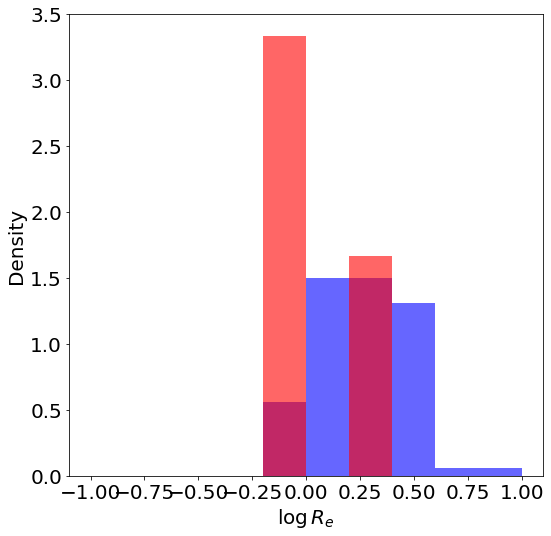

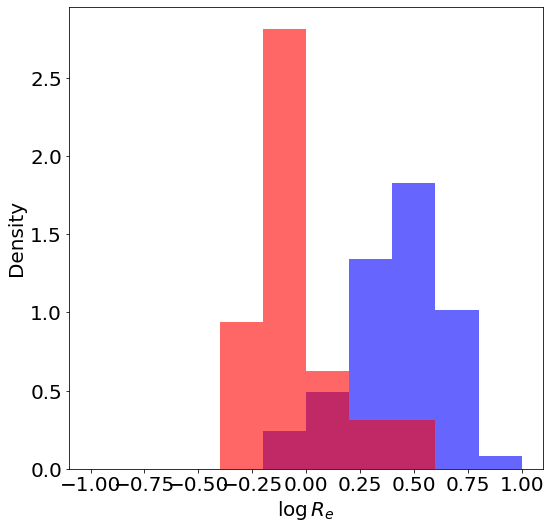

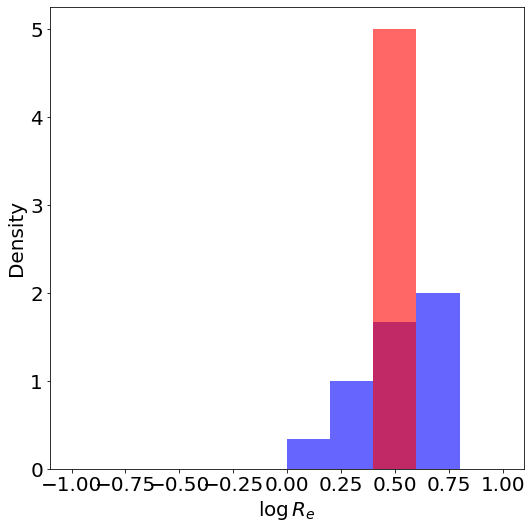

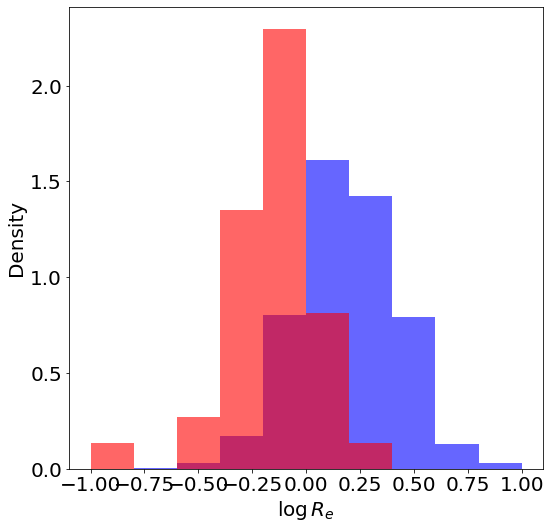

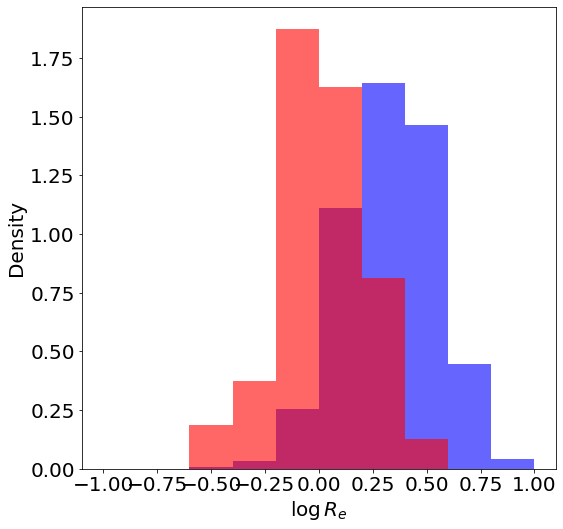

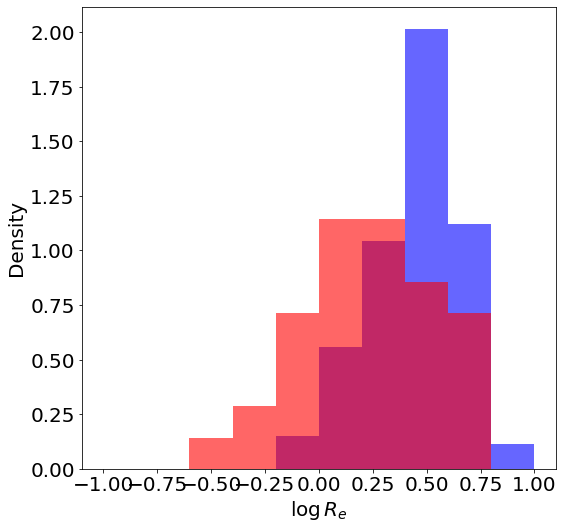

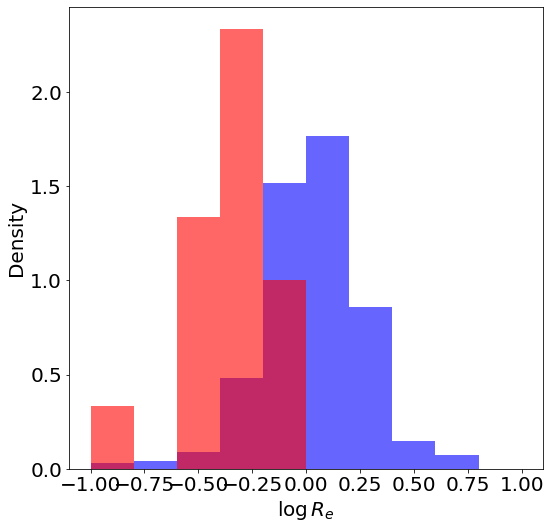

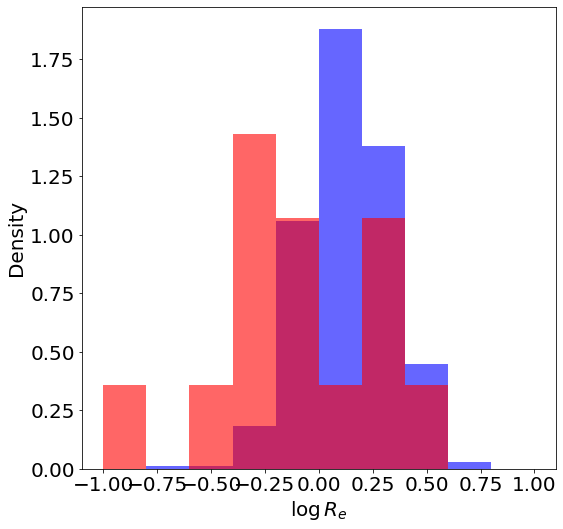

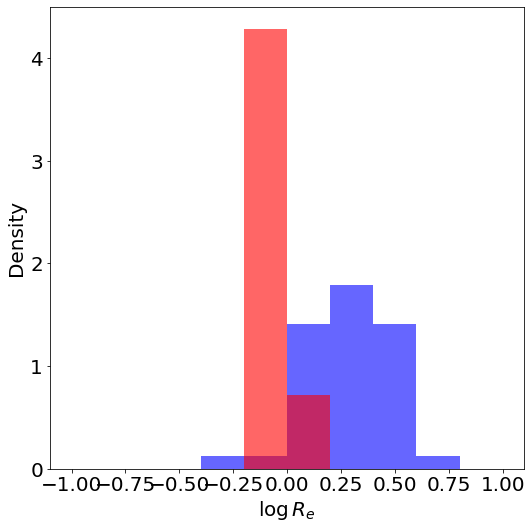

In [90]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        
        

        sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))    

        sel_delta_late = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==1 or morph_flag_f444w==2)")
        sel_delta_early = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==0 or morph_flag_f444w==3)")


        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(np.log10((sel_delta_late.F356W_RE).values/60*cosmo.kpc_proper_per_arcmin(sel_delta_late.zfit_50.values).value) ,density=True,range=(-1,1),color='blue',alpha=0.6,bins=10)
        plt.hist(np.log10((sel_delta_early.F356W_RE).values/60*cosmo.kpc_proper_per_arcmin(sel_delta_early.zfit_50.values).value),density=True,range=(-1,1),color='red',alpha=0.6,bins=10)

    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        #plt.ylim(0,0.7)
        #plt.xlim(0,6)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$\log R_e$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        #plt.text(4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        #plt.text(4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        #plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [1]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        
        

        sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))    

        
        sel_delta_early = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f200w==0 or morph_flag_f200w==3)")
        sel_delta_late = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f200w==1 or morph_flag_f200w==2)").sample(len(sel_delta_early))

        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.hist(sel_delta_late.t50_50 , range=(0.3,1),density=True,color='blue',alpha=0.6,bins=10)
        plt.hist(sel_delta_early.t50_50 ,range=(0.3,1),density=True,color='red',alpha=0.6,bins=10)

    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        #plt.ylim(0,0.7)
        #plt.xlim(0,6)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("$t_{50}$",fontsize=20)
        plt.ylabel("Density",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        #plt.text(4.,0.4,str(zlow)+"<z<"+str(zup),fontsize=20)
        #plt.text(4.,0.37,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        #plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


NameError: name 'ceers_cat' is not defined

<ipython-input-83-c5261b00141a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))
<ipython-input-83-c5261b00141a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))
<ipython-input-83-c5261b00141a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

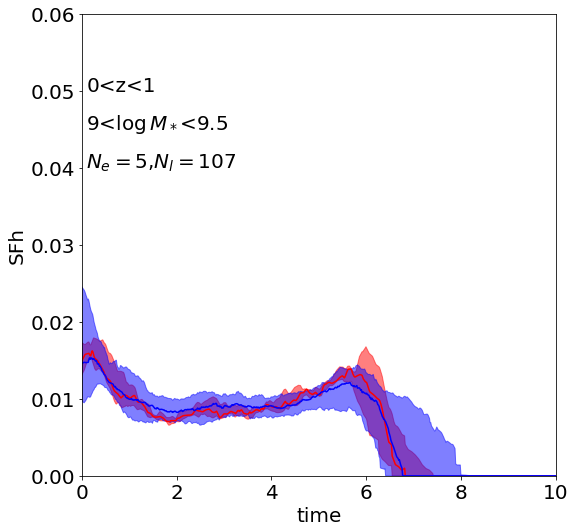

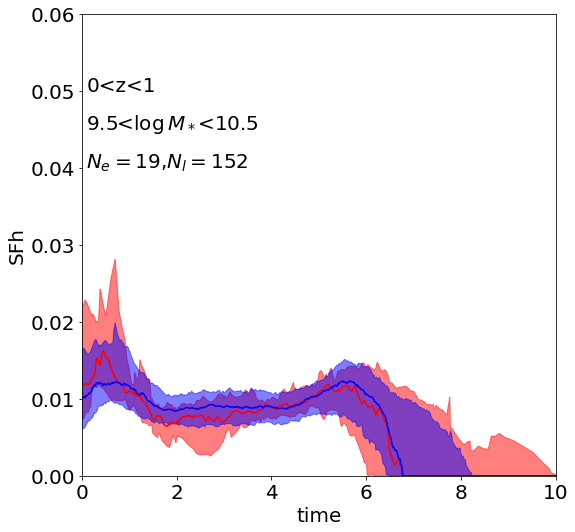

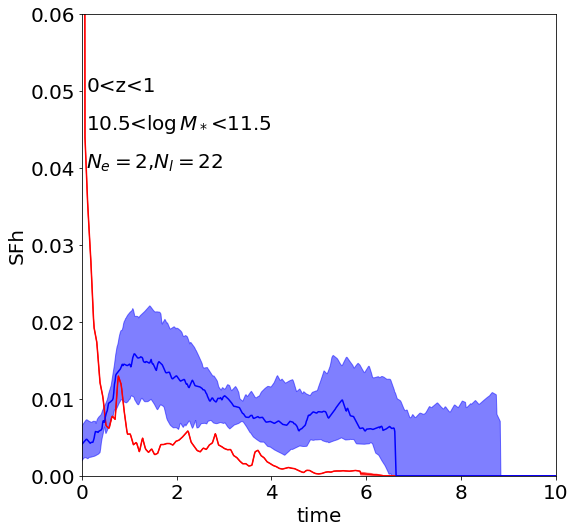

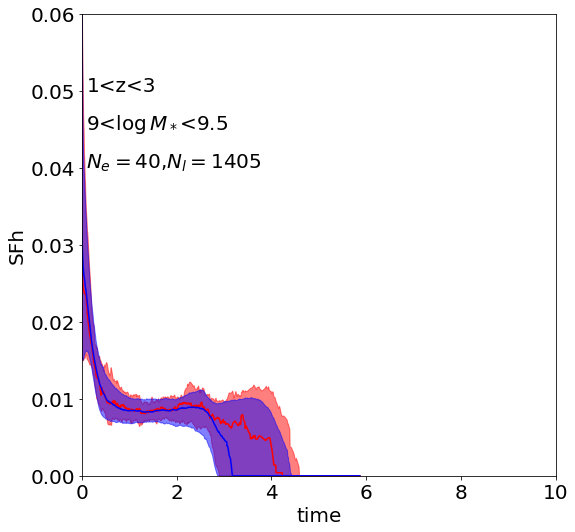

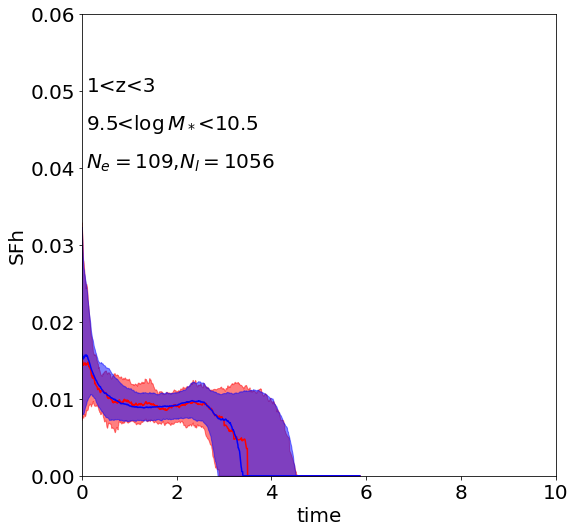

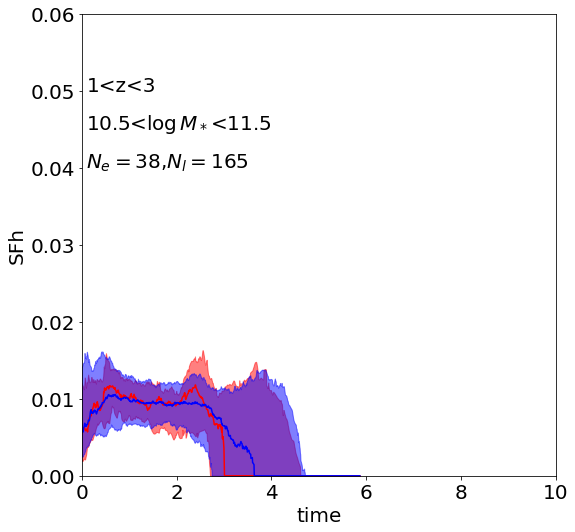

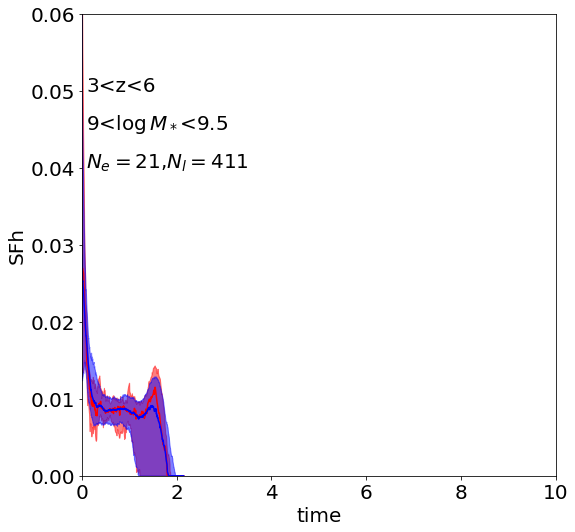

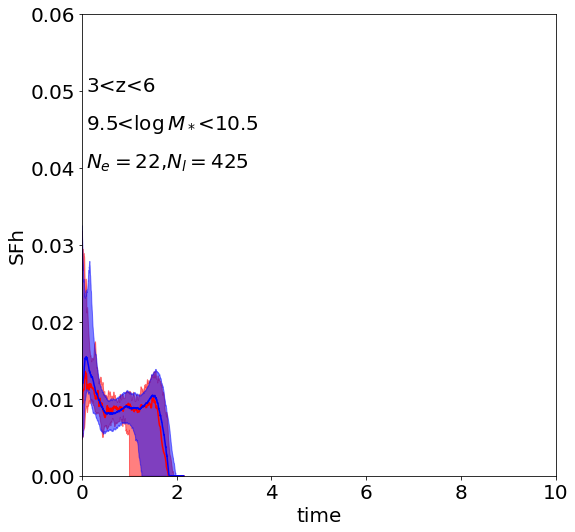

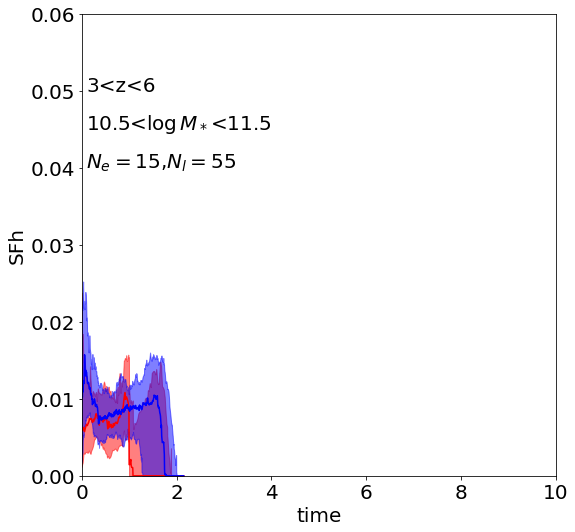

In [83]:
import seaborn as sns
zbins = [0,1,3,6]
ceers_cat["sigma_err"] = ceers_cat.logSFR100_84 - ceers_cat.logSFR100_16
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    
    morph_flag = sel.morph_flag_f200w




    


    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")     


    

    mbins = [9,9.5,10.5,11.5]

    for mlow,mup in zip(mbins[:-1],mbins[1:]):
        sel_mass = sel.query("logM_50>"+str(mlow)+"and logM_50<"+str(mup))
        mass=sel_mass['logM_50']
        zbest = sel_mass["zfit_50"]
        SFR = sel_mass['logSFR100_50']
        logSFR_84 = sel_mass['logSFR100_84']
        logSFR_16 = sel_mass['logSFR100_16']
        logmstar_84 = sel_mass['logM_84']
        logmstar_16 = sel_mass['logM_16']
        
        

        sel_mass["delta_sfr"] =  SFR  - (np.mean(p_samples[:,0])*(mass-10.5)+np.mean(p_samples[:,1]))    

        sel_delta_late = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==1 or morph_flag_f444w==2)")
        sel_delta_early = sel_mass.query("delta_sfr>-0.5 and (morph_flag_f444w==0 or morph_flag_f444w==3)")


        ct, stack_sfh_early, stack_sfh_early_lo, stack_sfh_early_hi = stack_sfhs("delta_sfr>-0.5 and (morph_flag_f444w==0 or morph_flag_f444w==3)",sel_mass, zlow,norm=True)
        ct, stack_sfh_late, stack_sfh_late_lo, stack_sfh_late_hi = stack_sfhs("delta_sfr>-0.5 and (morph_flag_f444w==1 or morph_flag_f444w==2)",sel_mass, zlow,norm=True)
        fig = plt.figure()
        fig.set_size_inches(8.5, 8.5)
        plt.plot(ct,stack_sfh_early,color='red')
        plt.plot(ct,stack_sfh_late,color='blue')
        plt.fill_between(ct,stack_sfh_early_lo,stack_sfh_early_hi,color='red',alpha=0.5)
        plt.fill_between(ct,stack_sfh_late_lo,stack_sfh_late_hi,color='blue',alpha=0.5)
        #plt.hist(sel_delta_early.F356W_N,density=True,range=(0,5),color='red',alpha=0.6,bins=10)

    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    #graph = sns.jointplot(x=flatten_mass.ravel(), y=flatten_SFR.ravel(),
              #   kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
              #   label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    #graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    #graph.ax_marg_x.set_xlim(8.5, 12)
    #graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    #graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
        plt.ylim(0,0.06)
        plt.xlim(0,10)
        plt.xticks(fontsize=20, rotation=0)
        plt.yticks(fontsize=20, rotation=0)
        plt.xlabel("time",fontsize=20)
        plt.ylabel("SFh",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
            
        plt.text(.1,0.05,str(zlow)+"<z<"+str(zup),fontsize=20)
        plt.text(.1,0.045,str(mlow)+"<$\log M_*$<"+str(mup),fontsize=20)
        plt.text(.1,0.04,"$N_e=$"+str(len(sel_delta_early))+","+"$N_l=$"+str(len(sel_delta_late)),fontsize=20)
        #plt.savefig(data_path+"deltaSFR_LT"+str(zlow)+"_"+str(mlow)+"_f444.png")
    #plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f200.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


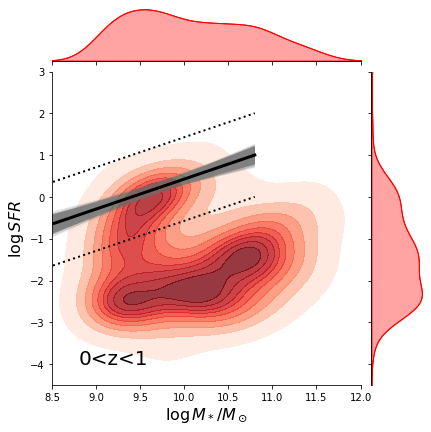

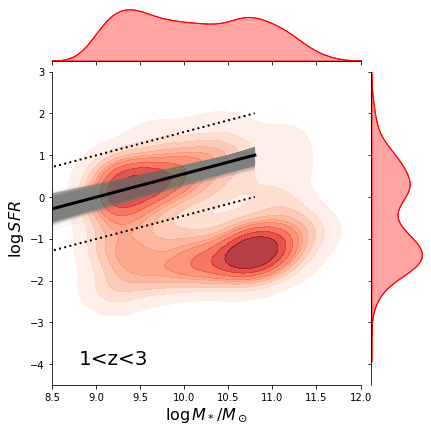

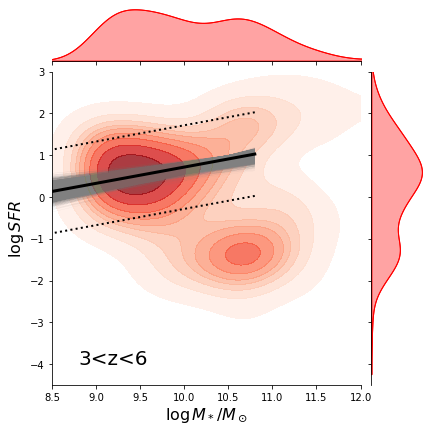

In [165]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f356w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
            
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f356.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


In [ ]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f356w


if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

if zlow==1:
    p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
    for a,b in zip(p_samples[:,0],p_samples[:,1]):
        plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

if zlow==3:
    p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
    for a,b in zip(p_samples[:,0],p_samples[:,1]):
        plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                

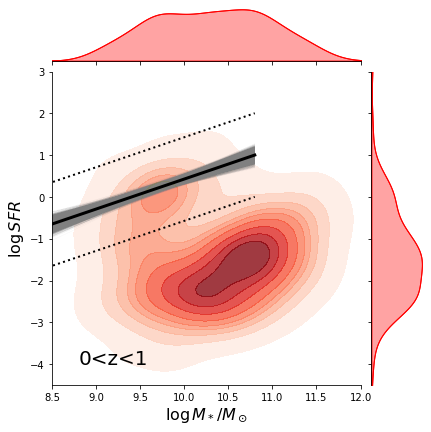

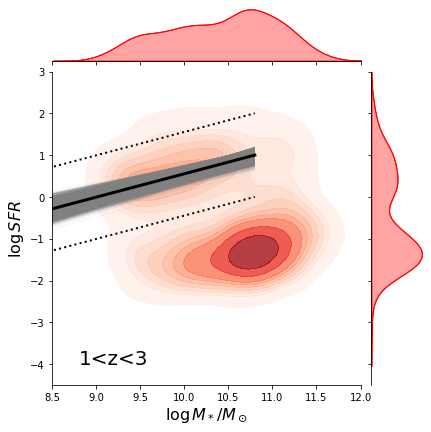

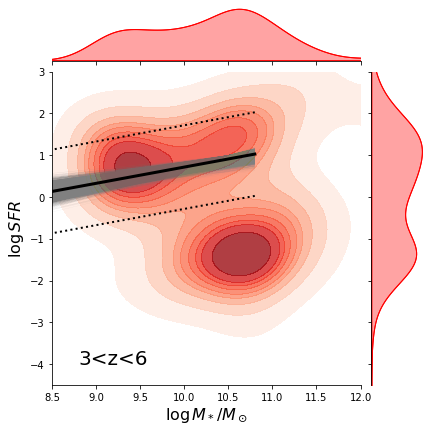

In [166]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                  kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.8,
                 label='Bulge dominated',cmap="Reds")

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    #graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    #graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    #graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.8, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='r', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        p_samples = np.load(data_path+"posterior_samples_z01.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)

    if zlow==1:
        p_samples = np.load(data_path+"posterior_samples_z13.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)   

    if zlow==3:
        p_samples = np.load(data_path+"posterior_samples_z36.npy")
        
        
        for a,b in zip(p_samples[:,0],p_samples[:,1]):
            plt.plot(np.arange(8,11,0.2),a*(np.arange(8,11,0.2)-10.5)+b,color='gray',ls='-',alpha=0.3,lw=0.1)                


    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1]),color='black',lw=3)
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])+1,color='black',lw=2,ls=':')
    plt.plot(np.arange(8,11,0.2),np.mean(p_samples[:,0])*(np.arange(8,11,0.2)-10.5)+np.mean(p_samples[:,1])-1,color='black',lw=2,ls=':')        
            
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_ET"+str(zlow)+"f444.png")
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


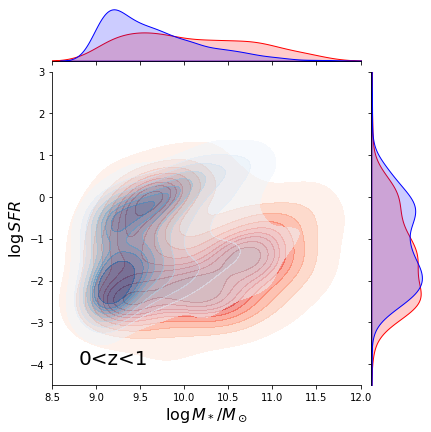

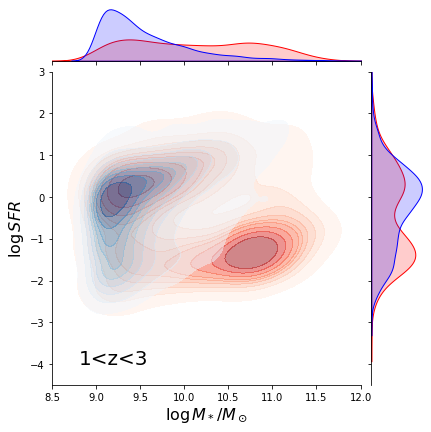

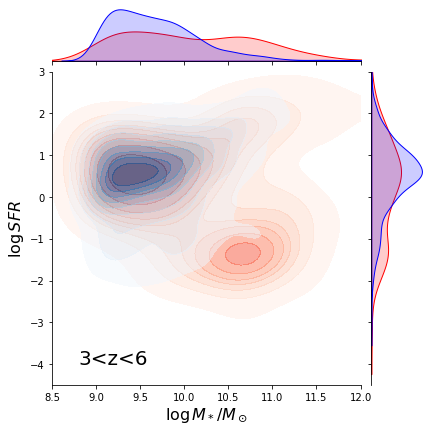

In [95]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f356w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Early-Type',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_morph"+str(zlow)+"f356.png")
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


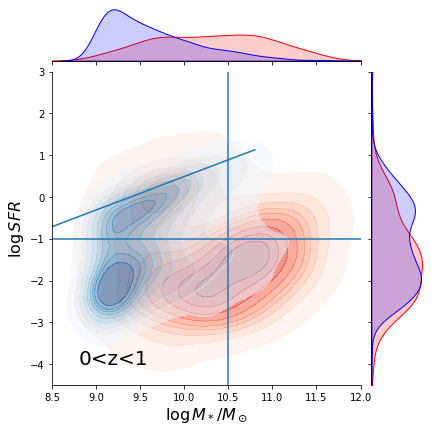

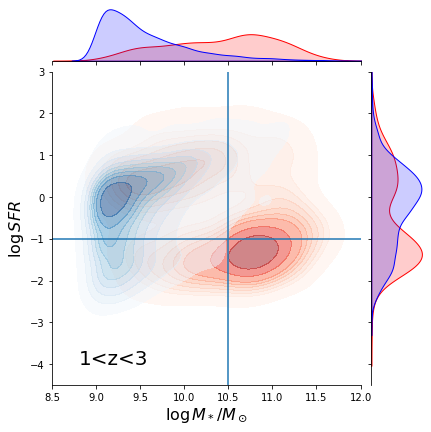

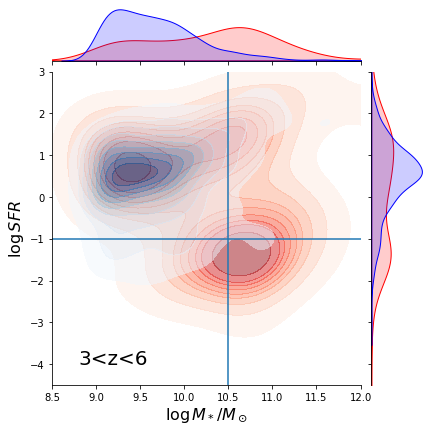

In [126]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Early-Type',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    #plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    if zlow==0:
        plt.plot(np.arange(8,11,0.2),0.8*(np.arange(8,11,0.2)-10.5)+0.89)
    
    plt.axhline(y=-1)
    plt.axvline(x=10.5)
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')
    plt.text(8.8,-4,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"SFR_mstar_morph"+str(zlow)+"f444.png")


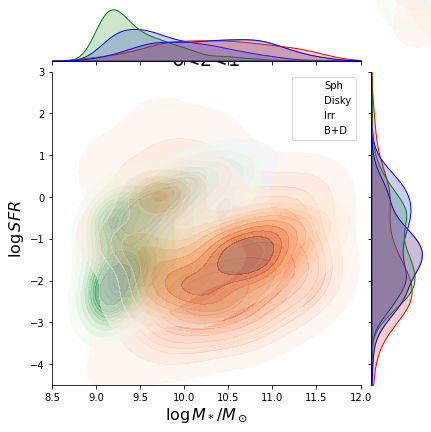

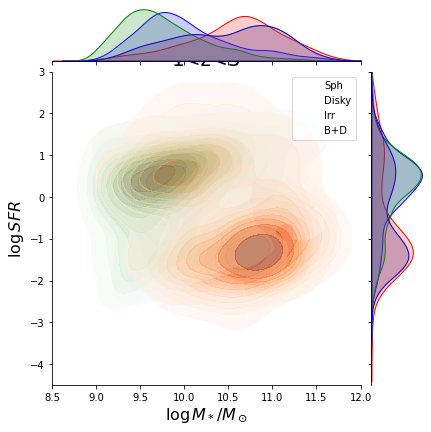

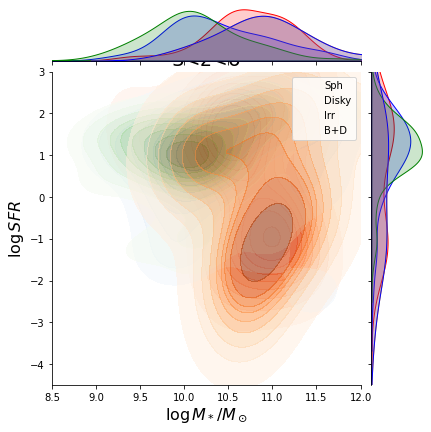

In [63]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)], y=SFR[(morph_flag==0)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Sph',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)]
    graph.y = SFR[(morph_flag==1)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Disky') 
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)

    graph.x = mass[(morph_flag==2)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==2)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Greens", fill=True, thresh=0.05, alpha=.5, label='Irr') 
    graph.plot_marginals(sns.kdeplot, color='g', fill=True, alpha=.2, legend=False)

    graph.x = mass[(morph_flag==3)|(morph_flag==3)]
    graph.y = SFR[(morph_flag==3)|(morph_flag==3)]
    graph.plot_joint(sns.kdeplot, cmap="Oranges", fill=True, thresh=0.05, alpha=.5, label='B+D') 
    graph.plot_marginals(sns.kdeplot, color='orange', fill=True, alpha=.2, legend=False)


    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
   
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')
